# Tarea 1 - Parte 1
# INF477 Redes Neuronales Artificiales I-2018

Profesor: Dr. Ricardo Ñanculef -- 
Ayudante: Francisco Mena

Alumnos:
- Jose Caimapo, jose.caimapo.12@sansano.usm.cl

- Eliana Providel Godoy, eprovide@inf.utfsm.cl

<a id="primero"></a>
## 1. Predicción del precio de una Casa

#### a) Construcción del dataframe.  La variable CHAS se convierte a un vector binario de dos componenetes de acuerdo a las dos posibilidades de su valor. 

In [255]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#para los gráficos

import matplotlib.pyplot as plt
from itertools import cycle

##
import numpy as np
import pandas as pd
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical
from sklearn.cross_validation import train_test_split
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
df.shape
df.info()
df.describe()

(506, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
CHAS_0     506 non-null uint8
CHAS_1     506 non-null uint8
dtypes: float64(9), int64(4), uint8(2)
memory usage: 52.5 KB


CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.347826   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.310593    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677082   12.000000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.795043    9.549407  408.237154   18.083004  356.674032   12.653063   
std      2.105710    8.707259  168.537116    2.280574   91.294864    7.141062   
min      1.129600    1.000000  187.000000   12.000000    0.320000    1.730000   
25%      2.100175    4.000000  279.000000   17.000000  375.377500    6.950000   
50%      3.207450    5.000000  330.000000   19.000000  391.440000   11.360000   
75%      5.188425   24.000000  666.000000   20.000000  396.225000   16.955000   
max     12.126500   24.000000  711.000000   22.000000  396.900000   37.970000   

             MEDV      CHAS_0      CHAS_1  
count  506.000000  506.000000  506.000000  
mean    22.532806    0.930830    0.069170  
std      9.197104    0.253994    0.253994  
min      5.000000    0.000000    0.000000  
25%     17.025000    1.000000    0.000000  
50%     21.200000    1.000000    0.000000  
75%     25.000000    1.000000    0.000000  
max     50.000000    1.000000    1.000000

** Conveniencia de convertir la variable CHAS a un vector binario **

La variable CHAS se convierte a un vector binario de dos componentes de acuerdo a los valores que puede tomar, esto es últil por el desempeño, dado que se evita todo tipo de comparaciones usando if y por lo tanto es más conveniente para ser tratado como un elemento de álegra líneal.
También puede ser más fácil para el aprendizaje por la representación de sus valor (es como un vector onehot).

** Descripción del data set **

*Título*: Boston Housing Data

*Fuente*: Sources: (a) Origin: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. (b) Creator: Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81\-102, 1978. (c) Date: July 7, 1993

*Número de instancias*: 506

*Número de atributos*: 13 atributos continuos (incluye el atributo de clase "MEDV") y 1 atributos binario.

*Información de los atributos:*

- CRIM Tasa de crimenes percapita por ciudad. \- tipo: Numerics
- ZN Proporción de terreno residencial zonificado para lotes sobre  25,000 sq.ft. \- tipo: Numerics
- INDUS Proporción de acres de negocios no-retail por ciudad. \- tipo: Numerics
- CHAS Variable dummy del río Charles ( 1 si esta al borde del río, 0 en otro caso) \- tipo: Nominal 0,1
- NOX Concentración de oxido nitrico  (partes por 10 millones)  \- tipo: Numerics
- RM Promedio de numero de habitaciones  por vivienda.  \- tipo: Numerics
- AGE Proporción de unidades ocupadas por el dueño y construídas antes de 1940.  \- tipo: Numerics
- DIS Distancias ponderadas a los 5 centros de empleo de Boston.  \- tipo: Numerics
- RAD Índice de accesibilidad a autopistas radiales.  \- tipo: Numerics
- TAX Valor total de la tasa de impuestos a la propiedad por cada 10.000 dolares.  \- tipo: Numerics
- PTRATIO Tasa de alumnos/profesor por ciudad.  \- tipo: Numerics

- B 1000(Bk - 0.63)^2  Coeficiente en relación a la gente negra por ciudad.  \- tipo: Numerics
- LSTAT  Estatus mas bajo de la población   \- tipo: Numerics
- MEDV Mediana de los hogares ocupados por sus dueños en miles de dolares.  \- tipo: Numerics


Variable ha predecir: MEDV

ref: http://mldata.org/repository/data/viewslug/regression-datasets-housing/

** Normalizando los datos ** (de acuerdo al enunciado)

In [256]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train), columns = df_train.columns)
y_train_scaled = X_train_scaled.pop('MEDV')

scaler =  StandardScaler().fit(df_test)
X_test_scaled = pd.DataFrame(scaler.transform(df_test), columns = df_test.columns)
y_test_scaled = X_test_scaled.pop('MEDV')

In [257]:
y_train_scaled = y_train_scaled.values.reshape(-1,1)
y_test_scaled = y_test_scaled.values.reshape(-1,1)

** Corroborando que los conjunto de datos tengan los atributos correctos **

In [258]:
X_test_scaled.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [259]:
X_train_scaled.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [260]:
len(X_test_scaled)
len(y_test_scaled)
len(X_train_scaled)
len(y_train_scaled)

127

127

379

379

### b) y c) Gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de epochs de entrenamiento.

** General para conjunto de entrenamiento y prueba:**
- red feedforward de 3 capas
- 200 unidades ocultas
- función de activación sigmoidal (punto b) y Relu (c). 
- Entrenamiento de  la red usando gradiente descendente estocástico, tasa de aprendizaje 0.01
- 300 epochs de entrenamiento

In [261]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

#se fija una semilla para poder generar una comparación
seed = 18
np.random.seed(seed)

#### Funciones que se utilizan####

## Función para crear el modelo, variando, principalmente la función de antivación para Sigmoid y Relu
def create_model(activation, optimizer = 'adam', f_loss = 'mean_squared_error'):
    # create model
    print("\nModelo con params: {0}, {1}, {2}.".format(activation,f_loss,optimizer))
    model = Sequential()  
    model.add(Dense(200, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation=activation))
    # output layer
    model.add(Dense(1, kernel_initializer='uniform', activation = 'linear'))
    model.compile(optimizer = optimizer, loss = f_loss, metrics=['accuracy']) 
    return model

## Función para gráficar
import matplotlib.pyplot as plt
def plot_data(loss,val_loss,title):
    plt.close('all')
    plt.title('MSE vs Epoch ' + title)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.xlabel('epoch')
    plt.ylabel('mse')

    plt.legend(['entrenamiento', 'prueba'], loc='upper right')
    
    plt.show()

** Utilizando la función de activación Sigmoid (punto b) y Relu (punto c) **

In [262]:
seed = 18
np.random.seed(seed)

## Fijando la tasa de aprendizaje
sgd = SGD(lr = 0.01)

#modelob 1 / FF 3 Capas I/H/O 200 neuronas en la oculta a/sigmoide
#sgd lr 0.01 epochs 300
#modeloc 2 / Igual al uno pero a/ReLu
history = []
activation = ['sigmoid','relu']

for a in activation:
    model = create_model(a,sgd)
    history.append(model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix())))
    


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7472bef0>.

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7472bef0>.


** Gráficos para la función de Activación Sigmoid y Relu **

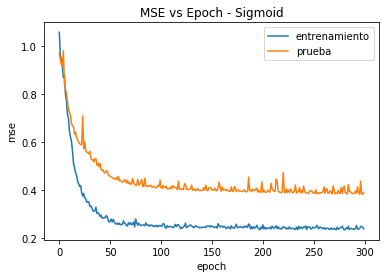

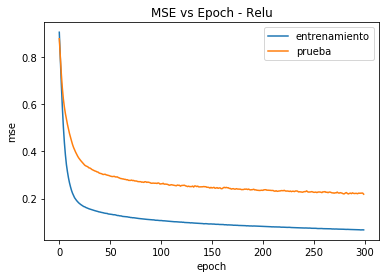

In [263]:
##Los valores de history
#print(history[0].history.keys())
#print(history[1].history.keys())

##Para graficar
for i in range(2):    
    if i == 0:
        a_title = '- Sigmoid'
       # print ('\n\t\t    Sigmoid')
    else:
        a_title = '- Relu'
       # print ('\n\t\t     Relu')
    
    plot_data(
        history[i].history['loss'],
        history[i].history['val_loss'],a_title
    )
    

** Comentarios**

**Con respecto a la divergencia**

Para MSE no se observa divergencia en el conjunto de entrenamiento, dado que rapidamente los valores de  MSE tiende a 0, tanto para la función de activación Sigmoid y Relu. Para el caso de Sigmoid esto ocurre cerca de los 50 epochs. Para el caso de Relu es mucho más rápido, produciendose en los primeros epochs.
Para el conjunto de prueba, en los 300 epoch no llega a cero para ninguna de las dos funciones de activación. Para el caso de Sigmoid llega a valor mse 0.4 en los 300 epochs y para Relu 0.2 en la misma cantidad de epochs.


** Describiendo comportamiento para Sigmoid y Relu, de acuerdo a valores de MSE, finalizando con la comparación**

En el caso de la función de activación Sigmoid, los valores de MSE para el conjunto de entrenamiento comienzan cercano pasado 1.0, y para el conjunto de prueba parten  llegando a 1.0.  Junto con esto, en los primeros epochs los dos conjuntos de prueba tienen el comportamiento similar, pero luego el conjunto de entrenamiento se mantiene por debajo de los resultados del conjunto de prueba.

Para el caso de la función de activación Relu, los valores de MSE para el conjunto de entrenamiento y prueba  parten pasado los 0.8 en el eje y.
Para los casos de prueba y de entrenamiento, el comportamiento es muy similar en los primeros epochs, sin embargo luego el conjunto de entrenamiento desciende más rápido  que los valores del conjunto de prueba, manteniendo para el resto de los epochs por debajo del conjunto de prueba.

A modo general:
* se observa que la función de activación Relu tiene valores más pequeños en menor cantidad de número de Epochs que la función de activación Sigmoidal. 
* La función Sigmoidal presenta pequeñas oscilaciones, no así la función relu.


### d)  Variando la tasa de aprendizaje en un rango sensible, se repite para los puntos b) y c)

array([ 0.        ,  0.05263158,  0.10526316,  0.15789474,  0.21052632,
        0.26315789,  0.31578947,  0.36842105,  0.42105263,  0.47368421,
        0.52631579,  0.57894737,  0.63157895,  0.68421053,  0.73684211,
        0.78947368,  0.84210526,  0.89473684,  0.94736842,  1.        ])



 Modelos con lr de, 0.0

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a6ebdcbe0>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 23s 62ms/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 283us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 304us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 294us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 286us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 299us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0

Epoch 57/300
379/379 [==============================] - 0s 280us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 272us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 293us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 282us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 290us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 286us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 286us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 298us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 290us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 292us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 282us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 277us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 282us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 287us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_a

379/379 [==============================] - 0s 303us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 388us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 335us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 287us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 352us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 325us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 327us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 360us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 379us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 326us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 310us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 334us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 316us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 326us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 290us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 291us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 286us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 288us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 287us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 280us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 283us/step - loss: 1.0005 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a776a0198>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 21s 54ms/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 294us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 296us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 295us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 298us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 291us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 287us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 284us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 289us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 299us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 290us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 293us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 289us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 297us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 293us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 291us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 287us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 288us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 291us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 288us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_a

379/379 [==============================] - 0s 280us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 290us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 335us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 305us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 284us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 286us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 281us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 289us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 294us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 305us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 292us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 289us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 277us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 293us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 286us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 279us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 284us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 290us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 288us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 284us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 285us/step - loss: 0.9587 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00



 Modelos con lr de, 0.05263157894736842

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a778d9d68>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 16s 43ms/step - loss: 7122669250269.7207 - acc: 0.0000e+00 - val_loss: 874864522175560.6250 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 300us/step - loss: 63325039999024216049451008.0000 - acc: 0.0000e+00 - val_loss: 10698502210147304132979982336.0000 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 295us/step - loss: inf - acc: 0.0000e+00 - val_loss: inf - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 288us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [===================

379/379 [==============================] - 0s 277us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 288us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 282us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 287us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 284us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 287us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 306us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [=========================

379/379 [==============================] - 0s 287us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 281us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 280us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 289us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 278us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 286us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 289us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==================

379/379 [==============================] - 0s 282us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 177/300
379/379 [==============================] - 0s 292us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 282us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 290us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 285us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 285us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 284us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==================

379/379 [==============================] - 0s 281us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 236/300
379/379 [==============================] - 0s 289us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 285us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 290us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 287us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 288us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 285us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==================

379/379 [==============================] - 0s 286us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 295/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 285us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 286us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 284us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 291us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 283us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a718404e0>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 16s 42ms/step - loss: 0.7585 - acc: 0.0000e+00 - val_loss: 0.6481 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 279us/step - loss: 0.3970 - acc: 0.0000e+00 - val_loss: 0.5142 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 283us/step - loss: 0.2585 - acc: 0.0000e+00 - val_loss: 0.4412 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 286us/step - loss: 0.2062 - acc: 0.0000e+00 - val_loss: 0.3759 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 278us/step - loss: 0.1811 - acc: 0.0000e+00 - val_loss: 0.3579 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 278us/step - loss: 0.1709 - acc: 0.0000e+00 - val_loss: 0.3407 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 289us/step - loss: 0.0716 - acc: 0.0000e+00 - val_loss: 0.2253 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 288us/step - loss: 0.0700 - acc: 0.0000e+00 - val_loss: 0.2218 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 276us/step - loss: 0.0689 - acc: 0.0000e+00 - val_loss: 0.2087 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 298us/step - loss: 0.0688 - acc: 0.0000e+00 - val_loss: 0.2175 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 286us/step - loss: 0.0686 - acc: 0.0000e+00 - val_loss: 0.2298 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 292us/step - loss: 0.0683 - acc: 0.0000e+00 - val_loss: 0.2308 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 288us/step - loss: 0.0661 - acc: 0.0000e+00 - val_loss: 0.2141 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 278us/step - loss: 0.0454 - acc: 0.0000e+00 - val_loss: 0.2278 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 290us/step - loss: 0.0465 - acc: 0.0000e+00 - val_loss: 0.2000 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 301us/step - loss: 0.0454 - acc: 0.0000e+00 - val_loss: 0.2033 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 295us/step - loss: 0.0450 - acc: 0.0000e+00 - val_loss: 0.2223 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 288us/step - loss: 0.0439 - acc: 0.0000e+00 - val_loss: 0.2184 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 289us/step - loss: 0.0438 - acc: 0.0000e+00 - val_loss: 0.1973 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 293us/step - loss: 0.0452 - acc: 0.0000e+00 - val_loss: 0.2103 - val_a

379/379 [==============================] - 0s 297us/step - loss: 0.0344 - acc: 0.0000e+00 - val_loss: 0.2105 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 305us/step - loss: 0.0347 - acc: 0.0000e+00 - val_loss: 0.2003 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 290us/step - loss: 0.0343 - acc: 0.0000e+00 - val_loss: 0.2117 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 288us/step - loss: 0.0325 - acc: 0.0000e+00 - val_loss: 0.2444 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 289us/step - loss: 0.0348 - acc: 0.0000e+00 - val_loss: 0.2168 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 285us/step - loss: 0.0339 - acc: 0.0000e+00 - val_loss: 0.2196 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 284us/step - loss: 0.0335 - acc: 0.0000e+00 - val_loss: 0.2202 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 276us/step - loss: 0.0291 - acc: 0.0000e+00 - val_loss: 0.2129 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 296us/step - loss: 0.0274 - acc: 0.0000e+00 - val_loss: 0.2158 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 281us/step - loss: 0.0270 - acc: 0.0000e+00 - val_loss: 0.2080 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 288us/step - loss: 0.0278 - acc: 0.0000e+00 - val_loss: 0.2175 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 276us/step - loss: 0.0269 - acc: 0.0000e+00 - val_loss: 0.2064 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 285us/step - loss: 0.0280 - acc: 0.0000e+00 - val_loss: 0.2041 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 285us/step - loss: 0.0285 - acc: 0.0000e+00 - val_loss: 0.2015 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 288us/step - loss: 0.0240 - acc: 0.0000e+00 - val_loss: 0.2267 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 308us/step - loss: 0.0251 - acc: 0.0000e+00 - val_loss: 0.2204 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 301us/step - loss: 0.0250 - acc: 0.0000e+00 - val_loss: 0.2166 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 288us/step - loss: 0.0230 - acc: 0.0000e+00 - val_loss: 0.2124 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 284us/step - loss: 0.0244 - acc: 0.0000e+00 - val_loss: 0.2086 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 284us/step - loss: 0.0264 - acc: 0.0000e+00 - val_loss: 0.2112 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 288us/step - loss: 0.0235 - acc: 0.0000e+00 - val_loss: 0.2046 - val_acc: 0.0000e+00



 Modelos con lr de, 0.10526315789473684

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a719489b0>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 14s 38ms/step - loss: 5565241840786045140992.0000 - acc: 0.0000e+00 - val_loss: 6846902254580981265596416.0000 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 300us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 313us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 292us/step - loss: nan

Epoch 59/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 306us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 290us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 296us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [============

379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 445us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 436us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 339us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 294us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 317us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 309us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 343us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 327us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 319us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 314us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 322us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 327us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a71df3198>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 23s 62ms/step - loss: 0.5791 - acc: 0.0000e+00 - val_loss: 0.5037 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 287us/step - loss: 0.2356 - acc: 0.0000e+00 - val_loss: 0.3865 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 302us/step - loss: 0.1828 - acc: 0.0000e+00 - val_loss: 0.3653 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 300us/step - loss: 0.1642 - acc: 0.0000e+00 - val_loss: 0.3283 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 298us/step - loss: 0.1569 - acc: 0.0000e+00 - val_loss: 0.3270 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 299us/step - loss: 0.1438 - acc: 0.0000e+00 - val_loss: 0.3063 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 334us/step - loss: 0.0536 - acc: 0.0000e+00 - val_loss: 0.2079 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 309us/step - loss: 0.0537 - acc: 0.0000e+00 - val_loss: 0.2036 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 318us/step - loss: 0.0503 - acc: 0.0000e+00 - val_loss: 0.2214 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 325us/step - loss: 0.0524 - acc: 0.0000e+00 - val_loss: 0.2141 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 298us/step - loss: 0.0514 - acc: 0.0000e+00 - val_loss: 0.2116 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 318us/step - loss: 0.0526 - acc: 0.0000e+00 - val_loss: 0.1820 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 317us/step - loss: 0.0565 - acc: 0.0000e+00 - val_loss: 0.2571 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 299us/step - loss: 0.0357 - acc: 0.0000e+00 - val_loss: 0.2088 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 291us/step - loss: 0.0365 - acc: 0.0000e+00 - val_loss: 0.2101 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 282us/step - loss: 0.0354 - acc: 0.0000e+00 - val_loss: 0.1978 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 296us/step - loss: 0.0370 - acc: 0.0000e+00 - val_loss: 0.1935 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 287us/step - loss: 0.0358 - acc: 0.0000e+00 - val_loss: 0.1901 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 316us/step - loss: 0.0323 - acc: 0.0000e+00 - val_loss: 0.2137 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 322us/step - loss: 0.0343 - acc: 0.0000e+00 - val_loss: 0.2049 - val_a

379/379 [==============================] - 0s 312us/step - loss: 0.0291 - acc: 0.0000e+00 - val_loss: 0.1973 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 352us/step - loss: 0.0257 - acc: 0.0000e+00 - val_loss: 0.1951 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 337us/step - loss: 0.0298 - acc: 0.0000e+00 - val_loss: 0.1983 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 306us/step - loss: 0.0270 - acc: 0.0000e+00 - val_loss: 0.2069 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 323us/step - loss: 0.0268 - acc: 0.0000e+00 - val_loss: 0.2230 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 322us/step - loss: 0.0278 - acc: 0.0000e+00 - val_loss: 0.2045 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 300us/step - loss: 0.0264 - acc: 0.0000e+00 - val_loss: 0.2626 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 290us/step - loss: 0.0355 - acc: 0.0000e+00 - val_loss: 0.2907 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 293us/step - loss: 0.0236 - acc: 0.0000e+00 - val_loss: 0.1934 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 308us/step - loss: 0.0237 - acc: 0.0000e+00 - val_loss: 0.1889 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 325us/step - loss: 0.0260 - acc: 0.0000e+00 - val_loss: 0.2010 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 323us/step - loss: 0.0229 - acc: 0.0000e+00 - val_loss: 0.1925 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 304us/step - loss: 0.0217 - acc: 0.0000e+00 - val_loss: 0.1996 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 302us/step - loss: 0.0229 - acc: 0.0000e+00 - val_loss: 0.2380 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 315us/step - loss: 0.0201 - acc: 0.0000e+00 - val_loss: 0.1921 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 290us/step - loss: 0.0209 - acc: 0.0000e+00 - val_loss: 0.2150 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 294us/step - loss: 0.0247 - acc: 0.0000e+00 - val_loss: 0.2015 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 295us/step - loss: 0.0214 - acc: 0.0000e+00 - val_loss: 0.2146 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 354us/step - loss: 0.0204 - acc: 0.0000e+00 - val_loss: 0.2013 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 459us/step - loss: 0.0207 - acc: 0.0000e+00 - val_loss: 0.2306 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 327us/step - loss: 0.0268 - acc: 0.0000e+00 - val_loss: 0.2126 - val_acc: 0.0000e+00



 Modelos con lr de, 0.15789473684210525

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a754639b0>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 15s 40ms/step - loss: 4299417199070511936569344.0000 - acc: 0.0000e+00 - val_loss: 8735614424762151457068679168.0000 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 306us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 294us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 291us/step - los

Epoch 59/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 313us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 364us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 383us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 440us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 393us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [============

379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 336us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 330us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 336us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 351us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 328us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 480us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 794us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 458us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 304us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 296us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 286us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 360us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a71d66438>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 20s 52ms/step - loss: 0.5053 - acc: 0.0000e+00 - val_loss: 0.4071 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 342us/step - loss: 0.1944 - acc: 0.0000e+00 - val_loss: 0.3344 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 316us/step - loss: 0.1679 - acc: 0.0000e+00 - val_loss: 0.3144 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 312us/step - loss: 0.1508 - acc: 0.0000e+00 - val_loss: 0.2826 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 293us/step - loss: 0.1623 - acc: 0.0000e+00 - val_loss: 0.2714 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 294us/step - loss: 0.1479 - acc: 0.0000e+00 - val_loss: 0.2895 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 325us/step - loss: 0.0554 - acc: 0.0000e+00 - val_loss: 0.2058 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 344us/step - loss: 0.0691 - acc: 0.0000e+00 - val_loss: 0.1891 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 332us/step - loss: 0.0550 - acc: 0.0000e+00 - val_loss: 0.2434 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 360us/step - loss: 0.0497 - acc: 0.0000e+00 - val_loss: 0.2532 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 337us/step - loss: 0.0437 - acc: 0.0000e+00 - val_loss: 0.2156 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 313us/step - loss: 0.0492 - acc: 0.0000e+00 - val_loss: 0.2205 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 339us/step - loss: 0.0442 - acc: 0.0000e+00 - val_loss: 0.2246 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 302us/step - loss: 0.0327 - acc: 0.0000e+00 - val_loss: 0.2111 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 284us/step - loss: 0.0374 - acc: 0.0000e+00 - val_loss: 0.2236 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 288us/step - loss: 0.0369 - acc: 0.0000e+00 - val_loss: 0.2033 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 298us/step - loss: 0.0318 - acc: 0.0000e+00 - val_loss: 0.2159 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 286us/step - loss: 0.0360 - acc: 0.0000e+00 - val_loss: 0.1960 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 294us/step - loss: 0.0393 - acc: 0.0000e+00 - val_loss: 0.1917 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 287us/step - loss: 0.0326 - acc: 0.0000e+00 - val_loss: 0.2058 - val_a

379/379 [==============================] - 0s 288us/step - loss: 0.0275 - acc: 0.0000e+00 - val_loss: 0.2185 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 296us/step - loss: 0.0277 - acc: 0.0000e+00 - val_loss: 0.2387 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 291us/step - loss: 0.0254 - acc: 0.0000e+00 - val_loss: 0.2239 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 293us/step - loss: 0.0273 - acc: 0.0000e+00 - val_loss: 0.2254 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 290us/step - loss: 0.0260 - acc: 0.0000e+00 - val_loss: 0.2479 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 294us/step - loss: 0.0401 - acc: 0.0000e+00 - val_loss: 0.2218 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 277us/step - loss: 0.0261 - acc: 0.0000e+00 - val_loss: 0.2078 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 298us/step - loss: 0.0251 - acc: 0.0000e+00 - val_loss: 0.2340 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 348us/step - loss: 0.0243 - acc: 0.0000e+00 - val_loss: 0.2659 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 331us/step - loss: 0.0266 - acc: 0.0000e+00 - val_loss: 0.2116 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 328us/step - loss: 0.0302 - acc: 0.0000e+00 - val_loss: 0.2048 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 293us/step - loss: 0.0219 - acc: 0.0000e+00 - val_loss: 0.2057 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 303us/step - loss: 0.0211 - acc: 0.0000e+00 - val_loss: 0.2109 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 306us/step - loss: 0.0297 - acc: 0.0000e+00 - val_loss: 0.2690 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 319us/step - loss: 0.0196 - acc: 0.0000e+00 - val_loss: 0.2089 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 334us/step - loss: 0.0210 - acc: 0.0000e+00 - val_loss: 0.2493 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 334us/step - loss: 0.0222 - acc: 0.0000e+00 - val_loss: 0.2112 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 405us/step - loss: 0.0237 - acc: 0.0000e+00 - val_loss: 0.2224 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 335us/step - loss: 0.0188 - acc: 0.0000e+00 - val_loss: 0.2450 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 327us/step - loss: 0.0188 - acc: 0.0000e+00 - val_loss: 0.2023 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 338us/step - loss: 0.0178 - acc: 0.0000e+00 - val_loss: 0.2004 - val_acc: 0.0000e+00



 Modelos con lr de, 0.21052631578947367

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7b9c5940>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 15s 41ms/step - loss: 199910191355547636685239236952064.0000 - acc: 0.0000e+00 - val_loss: 4217027925351960800082563708030550016.0000 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 291us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 290us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s

379/379 [==============================] - 0s 314us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 296us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 300us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 323us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 354us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [=========================

379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 352us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 333us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==================

379/379 [==============================] - 0s 521us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 177/300
379/379 [==============================] - 0s 362us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 417us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 397us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 390us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==================

379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 236/300
379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 312us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 330us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 322us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==================

379/379 [==============================] - 0s 371us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 295/300
379/379 [==============================] - 0s 387us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 323us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 322us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 348us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7b8b8160>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 18s 48ms/step - loss: 0.4710 - acc: 0.0000e+00 - val_loss: 0.3821 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 299us/step - loss: 0.1911 - acc: 0.0000e+00 - val_loss: 0.3652 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 300us/step - loss: 0.1973 - acc: 0.0000e+00 - val_loss: 0.3223 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 291us/step - loss: 0.1522 - acc: 0.0000e+00 - val_loss: 0.2833 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 294us/step - loss: 0.1629 - acc: 0.0000e+00 - val_loss: 0.2621 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 301us/step - loss: 0.1509 - acc: 0.0000e+00 - val_loss: 0.2677 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 302us/step - loss: 0.0441 - acc: 0.0000e+00 - val_loss: 0.2135 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 287us/step - loss: 0.0494 - acc: 0.0000e+00 - val_loss: 0.2331 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 294us/step - loss: 0.0541 - acc: 0.0000e+00 - val_loss: 0.1978 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 330us/step - loss: 0.0537 - acc: 0.0000e+00 - val_loss: 0.2158 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 327us/step - loss: 0.0521 - acc: 0.0000e+00 - val_loss: 0.2283 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 340us/step - loss: 0.0457 - acc: 0.0000e+00 - val_loss: 0.2023 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 335us/step - loss: 0.0397 - acc: 0.0000e+00 - val_loss: 0.2102 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 350us/step - loss: 0.0321 - acc: 0.0000e+00 - val_loss: 0.2029 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 369us/step - loss: 0.0298 - acc: 0.0000e+00 - val_loss: 0.2250 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 369us/step - loss: 0.0456 - acc: 0.0000e+00 - val_loss: 0.1985 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 319us/step - loss: 0.0312 - acc: 0.0000e+00 - val_loss: 0.2094 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 339us/step - loss: 0.0384 - acc: 0.0000e+00 - val_loss: 0.2247 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 354us/step - loss: 0.0294 - acc: 0.0000e+00 - val_loss: 0.2454 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 370us/step - loss: 0.0384 - acc: 0.0000e+00 - val_loss: 0.2296 - val_a

379/379 [==============================] - 0s 334us/step - loss: 0.0242 - acc: 0.0000e+00 - val_loss: 0.2429 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 318us/step - loss: 0.0335 - acc: 0.0000e+00 - val_loss: 0.2504 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 315us/step - loss: 0.0638 - acc: 0.0000e+00 - val_loss: 0.1971 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 317us/step - loss: 0.0374 - acc: 0.0000e+00 - val_loss: 0.2468 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 319us/step - loss: 0.0238 - acc: 0.0000e+00 - val_loss: 0.1802 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 319us/step - loss: 0.0280 - acc: 0.0000e+00 - val_loss: 0.1883 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 313us/step - loss: 0.0245 - acc: 0.0000e+00 - val_loss: 0.2127 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 320us/step - loss: 0.0316 - acc: 0.0000e+00 - val_loss: 0.2123 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 310us/step - loss: 0.0228 - acc: 0.0000e+00 - val_loss: 0.1909 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 321us/step - loss: 0.0179 - acc: 0.0000e+00 - val_loss: 0.2139 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 320us/step - loss: 0.0228 - acc: 0.0000e+00 - val_loss: 0.2112 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 334us/step - loss: 0.0203 - acc: 0.0000e+00 - val_loss: 0.2351 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 328us/step - loss: 0.0230 - acc: 0.0000e+00 - val_loss: 0.2169 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 323us/step - loss: 0.0226 - acc: 0.0000e+00 - val_loss: 0.2073 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 313us/step - loss: 0.0206 - acc: 0.0000e+00 - val_loss: 0.2088 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 295us/step - loss: 0.0197 - acc: 0.0000e+00 - val_loss: 0.2337 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 307us/step - loss: 0.0214 - acc: 0.0000e+00 - val_loss: 0.1971 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 300us/step - loss: 0.0176 - acc: 0.0000e+00 - val_loss: 0.2401 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 326us/step - loss: 0.0194 - acc: 0.0000e+00 - val_loss: 0.2015 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 314us/step - loss: 0.0172 - acc: 0.0000e+00 - val_loss: 0.1951 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 322us/step - loss: 0.0139 - acc: 0.0000e+00 - val_loss: 0.2117 - val_acc: 0.0000e+00



 Modelos con lr de, 0.2631578947368421

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7c8928d0>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 15s 40ms/step - loss: 923466499279669125392953392496640.0000 - acc: 0.0000e+00 - val_loss: inf - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 343us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 314us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+0

Epoch 59/300
379/379 [==============================] - 0s 304us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 319us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 328us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 345us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [============

379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 300us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 341us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 355us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 330us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 306us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 341us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 330us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 330us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 341us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 328us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 356us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 439us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 355us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7bd7a0b8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 18s 47ms/step - loss: 0.4456 - acc: 0.0000e+00 - val_loss: 0.4344 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 317us/step - loss: 0.2165 - acc: 0.0000e+00 - val_loss: 0.4481 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 349us/step - loss: 0.1932 - acc: 0.0000e+00 - val_loss: 0.4900 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 296us/step - loss: 0.2091 - acc: 0.0000e+00 - val_loss: 0.3725 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 309us/step - loss: 0.1903 - acc: 0.0000e+00 - val_loss: 0.3296 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 304us/step - loss: 0.1546 - acc: 0.0000e+00 - val_loss: 0.3669 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 319us/step - loss: 0.0430 - acc: 0.0000e+00 - val_loss: 0.2254 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 330us/step - loss: 0.0471 - acc: 0.0000e+00 - val_loss: 0.1774 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 394us/step - loss: 0.0830 - acc: 0.0000e+00 - val_loss: 0.1991 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 468us/step - loss: 0.0452 - acc: 0.0000e+00 - val_loss: 0.1948 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 344us/step - loss: 0.0476 - acc: 0.0000e+00 - val_loss: 0.2489 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 333us/step - loss: 0.0547 - acc: 0.0000e+00 - val_loss: 0.2192 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 324us/step - loss: 0.0547 - acc: 0.0000e+00 - val_loss: 0.2443 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 326us/step - loss: 0.0353 - acc: 0.0000e+00 - val_loss: 0.1867 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 298us/step - loss: 0.0455 - acc: 0.0000e+00 - val_loss: 0.2062 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 301us/step - loss: 0.0309 - acc: 0.0000e+00 - val_loss: 0.2185 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 320us/step - loss: 0.0393 - acc: 0.0000e+00 - val_loss: 0.1998 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 328us/step - loss: 0.0330 - acc: 0.0000e+00 - val_loss: 0.1879 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 329us/step - loss: 0.0312 - acc: 0.0000e+00 - val_loss: 0.2109 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 316us/step - loss: 0.0355 - acc: 0.0000e+00 - val_loss: 0.2113 - val_a

379/379 [==============================] - 0s 316us/step - loss: 0.0220 - acc: 0.0000e+00 - val_loss: 0.1910 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 335us/step - loss: 0.0193 - acc: 0.0000e+00 - val_loss: 0.1956 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 348us/step - loss: 0.0207 - acc: 0.0000e+00 - val_loss: 0.2000 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 310us/step - loss: 0.0435 - acc: 0.0000e+00 - val_loss: 0.2248 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 297us/step - loss: 0.0237 - acc: 0.0000e+00 - val_loss: 0.1999 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 298us/step - loss: 0.0288 - acc: 0.0000e+00 - val_loss: 0.2155 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 297us/step - loss: 0.0247 - acc: 0.0000e+00 - val_loss: 0.2020 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 302us/step - loss: 0.0215 - acc: 0.0000e+00 - val_loss: 0.2101 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 346us/step - loss: 0.0190 - acc: 0.0000e+00 - val_loss: 0.1953 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 333us/step - loss: 0.0231 - acc: 0.0000e+00 - val_loss: 0.2103 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 344us/step - loss: 0.0342 - acc: 0.0000e+00 - val_loss: 0.2456 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 312us/step - loss: 0.0308 - acc: 0.0000e+00 - val_loss: 0.1906 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 305us/step - loss: 0.0215 - acc: 0.0000e+00 - val_loss: 0.2064 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 314us/step - loss: 0.0191 - acc: 0.0000e+00 - val_loss: 0.1900 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 340us/step - loss: 0.0222 - acc: 0.0000e+00 - val_loss: 0.1928 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 323us/step - loss: 0.0236 - acc: 0.0000e+00 - val_loss: 0.1960 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 308us/step - loss: 0.0180 - acc: 0.0000e+00 - val_loss: 0.1920 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 310us/step - loss: 0.0159 - acc: 0.0000e+00 - val_loss: 0.2014 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 327us/step - loss: 0.0162 - acc: 0.0000e+00 - val_loss: 0.1916 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 332us/step - loss: 0.0156 - acc: 0.0000e+00 - val_loss: 0.2024 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 345us/step - loss: 0.0160 - acc: 0.0000e+00 - val_loss: 0.2283 - val_acc: 0.0000e+00



 Modelos con lr de, 0.3157894736842105

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7c5a3828>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 19s 49ms/step - loss: 5935538959605742024733214577262592.0000 - acc: 0.0000e+00 - val_loss: inf - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 311us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+

Epoch 59/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 304us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 341us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 348us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 339us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [============

379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 328us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 343us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 295us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 345us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 343us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 351us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 349us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 309us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 356us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 343us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 340us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7c5f1f98>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 15s 40ms/step - loss: 0.4432 - acc: 0.0000e+00 - val_loss: 0.7078 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 299us/step - loss: 0.4024 - acc: 0.0000e+00 - val_loss: 0.4715 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 310us/step - loss: 0.2411 - acc: 0.0000e+00 - val_loss: 0.3793 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 287us/step - loss: 0.2552 - acc: 0.0000e+00 - val_loss: 0.4299 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 282us/step - loss: 0.1647 - acc: 0.0000e+00 - val_loss: 0.2612 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 308us/step - loss: 0.1665 - acc: 0.0000e+00 - val_loss: 0.2798 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 325us/step - loss: 0.0578 - acc: 0.0000e+00 - val_loss: 0.2426 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 330us/step - loss: 0.0806 - acc: 0.0000e+00 - val_loss: 0.2044 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 321us/step - loss: 0.0710 - acc: 0.0000e+00 - val_loss: 0.1762 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 346us/step - loss: 0.0608 - acc: 0.0000e+00 - val_loss: 0.1951 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 340us/step - loss: 0.0596 - acc: 0.0000e+00 - val_loss: 0.2285 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 345us/step - loss: 0.0668 - acc: 0.0000e+00 - val_loss: 0.2168 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 300us/step - loss: 0.0714 - acc: 0.0000e+00 - val_loss: 0.2257 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 325us/step - loss: 0.0277 - acc: 0.0000e+00 - val_loss: 0.2138 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 316us/step - loss: 0.0526 - acc: 0.0000e+00 - val_loss: 0.2132 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 314us/step - loss: 0.0437 - acc: 0.0000e+00 - val_loss: 0.2837 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 334us/step - loss: 0.0597 - acc: 0.0000e+00 - val_loss: 0.2122 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 340us/step - loss: 0.0440 - acc: 0.0000e+00 - val_loss: 0.1846 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 306us/step - loss: 0.0398 - acc: 0.0000e+00 - val_loss: 0.2158 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 297us/step - loss: 0.0427 - acc: 0.0000e+00 - val_loss: 0.2179 - val_a

379/379 [==============================] - 0s 313us/step - loss: 0.0286 - acc: 0.0000e+00 - val_loss: 0.2255 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 300us/step - loss: 0.0428 - acc: 0.0000e+00 - val_loss: 0.2051 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 331us/step - loss: 0.0241 - acc: 0.0000e+00 - val_loss: 0.2309 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 355us/step - loss: 0.0789 - acc: 0.0000e+00 - val_loss: 0.2032 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 312us/step - loss: 0.0422 - acc: 0.0000e+00 - val_loss: 0.1930 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 312us/step - loss: 0.0228 - acc: 0.0000e+00 - val_loss: 0.2268 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 302us/step - loss: 0.0252 - acc: 0.0000e+00 - val_loss: 0.1930 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 328us/step - loss: 0.0430 - acc: 0.0000e+00 - val_loss: 0.2125 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 323us/step - loss: 0.0272 - acc: 0.0000e+00 - val_loss: 0.2237 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 317us/step - loss: 0.0396 - acc: 0.0000e+00 - val_loss: 0.2443 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 296us/step - loss: 0.0716 - acc: 0.0000e+00 - val_loss: 0.2087 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 312us/step - loss: 0.0254 - acc: 0.0000e+00 - val_loss: 0.2220 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 339us/step - loss: 0.0243 - acc: 0.0000e+00 - val_loss: 0.2060 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 331us/step - loss: 0.1759 - acc: 0.0000e+00 - val_loss: 0.2316 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 302us/step - loss: 0.0185 - acc: 0.0000e+00 - val_loss: 0.2140 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 291us/step - loss: 0.0151 - acc: 0.0000e+00 - val_loss: 0.1899 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 333us/step - loss: 0.0441 - acc: 0.0000e+00 - val_loss: 0.2293 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 323us/step - loss: 0.0232 - acc: 0.0000e+00 - val_loss: 0.2308 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 392us/step - loss: 0.0297 - acc: 0.0000e+00 - val_loss: 0.2207 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 311us/step - loss: 0.0202 - acc: 0.0000e+00 - val_loss: 0.1987 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 302us/step - loss: 0.0720 - acc: 0.0000e+00 - val_loss: 0.2031 - val_acc: 0.0000e+00



 Modelos con lr de, 0.3684210526315789

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7c7db7f0>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 16s 43ms/step - loss: 21853411173931702819783821597081600.0000 - acc: 0.0000e+00 - val_loss: inf - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 304us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 306us/step - loss: nan - acc: 0.0000e

Epoch 59/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 293us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 345us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [============

379/379 [==============================] - 0s 306us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 333us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 296us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 528us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 416us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 377us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 503us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 360us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 420us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 458us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 346us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 319us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 311us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 360us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 340us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 350us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 349us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 388us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 362us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 430us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7c979240>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 18s 49ms/step - loss: 5.1201 - acc: 0.0000e+00 - val_loss: 87059.4331 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 314us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 344us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 330us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/300
379/379 [========

379/379 [==============================] - 0s 366us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 473us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 593us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 368us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 281us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 296us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 293us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 292us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 288us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 330us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 311us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 291us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 328us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 295us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 330us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 349us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 319us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 327us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 333us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00




 Modelos con lr de, 0.42105263157894735

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7cd7b710>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 17s 46ms/step - loss: 43594779670961451615843332755816448.0000 - acc: 0.0000e+00 - val_loss: inf - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 292us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 291us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 292us/step - loss: nan - acc: 0.0000

Epoch 59/300
379/379 [==============================] - 0s 347us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 341us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 339us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 314us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [============

379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 327us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 341us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 418us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 370us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 478us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 456us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 349us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 320us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 340us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 333us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 339us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 309us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 322us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 339us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7ca89f28>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 17s 45ms/step - loss: 0.6408 - acc: 0.0000e+00 - val_loss: 0.6322 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 311us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 341us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/300
379/379 [============

379/379 [==============================] - 0s 328us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 313us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 357us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 358us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 371us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 359us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 300us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 287us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 327us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 346us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 344us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00




 Modelos con lr de, 0.47368421052631576

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7d6906d8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 17s 45ms/step - loss: inf - acc: 0.0000e+00 - val_loss: inf - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 320us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 291us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 317us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 358us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.000

379/379 [==============================] - 0s 345us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 340us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 345us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 356us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 340us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 343us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 348us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 353us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 330us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 507us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 379us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 383us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 379us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 425us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 333us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 359us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 333us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 333us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7d6dfeb8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 18s 47ms/step - loss: 1.2949 - acc: 0.0000e+00 - val_loss: 0.7971 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 907us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 415us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 522us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 424us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 360us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/300
379/379 [============

379/379 [==============================] - 0s 359us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 349us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 320us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 312us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 313us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 365us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 344us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 361us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 350us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 330us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 350us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 341us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 376us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 312us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 300us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 328us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 323us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 417us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 358us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00




 Modelos con lr de, 0.5263157894736842

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7d0ca6a0>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 24s 63ms/step - loss: inf - acc: 0.0000e+00 - val_loss: inf - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 344us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 323us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 327us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 330us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000

379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 300us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 291us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 290us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 320us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 313us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 330us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 327us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 314us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 347us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 320us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 320us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 391us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 516us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 371us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 341us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 330us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7d053e10>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 17s 44ms/step - loss: 1.0103 - acc: 0.0000e+00 - val_loss: 1.3034 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 294us/step - loss: 1.2411 - acc: 0.0000e+00 - val_loss: 2.9499 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 317us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 304us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 312us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/300
379/379 [======

379/379 [==============================] - 0s 319us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 317us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 292us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 295us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 288us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 347us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 350us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 328us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 352us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 343us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 330us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 351us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 348us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 319us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 371us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 406us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 375us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 320us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 354us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 365us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 311us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 311us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 322us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00




 Modelos con lr de, 0.5789473684210527

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7d781668>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 18s 48ms/step - loss: 134005443930146913909341159424.0000 - acc: 0.0000e+00 - val_loss: 5120136748791320818104125918019584.0000 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 341us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 317us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 327us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 338us/

379/379 [==============================] - 0s 612us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 518us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 746us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 377us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 389us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 336us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 340us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [=========================

379/379 [==============================] - 0s 314us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 392us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 314us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==================

379/379 [==============================] - 0s 358us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 177/300
379/379 [==============================] - 0s 357us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 362us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 377us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 347us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 349us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 387us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==================

379/379 [==============================] - 0s 352us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 236/300
379/379 [==============================] - 0s 368us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 371us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 356us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 354us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 352us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==================

379/379 [==============================] - 0s 351us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 295/300
379/379 [==============================] - 0s 354us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 351us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 345us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 350us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 336us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7dec1da0>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 20s 52ms/step - loss: 0.8655 - acc: 0.0000e+00 - val_loss: 1.4586 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 304us/step - loss: 1.1489 - acc: 0.0000e+00 - val_loss: 413.0710 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 322us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 322us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/300
379/379 [====

379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 322us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 288us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 309us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 309us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 320us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 312us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 319us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 314us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 379us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 347us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 344us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 347us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 343us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 401us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 339us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 366us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 415us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 406us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 443us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 320us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 322us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 333us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 317us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 341us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 349us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00




 Modelos con lr de, 0.631578947368421

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7dfeb860>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 23s 60ms/step - loss: inf - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 440us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 418us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 447us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 423us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 409us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e

379/379 [==============================] - 0s 385us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 702us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 446us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 333us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 314us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 361us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 371us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 313us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 341us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 352us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 333us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 336us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 336us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 346us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 349us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 319us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7cf48fd0>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 19s 50ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 341us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/300
379/379 [==================

379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 327us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 323us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 311us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 317us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 309us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 311us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 306us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 343us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 333us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 365us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 350us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 387us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 345us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 330us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 317us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 327us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 344us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 366us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00




 Modelos con lr de, 0.6842105263157894

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7e126828>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 19s 51ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 312us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000

379/379 [==============================] - 0s 304us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 317us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 323us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 313us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 313us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 306us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 328us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 319us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 340us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 346us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 399us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 408us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 447us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 359us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 377us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 421us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 320us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 328us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 416us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 311us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 309us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7ec37f98>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 20s 53ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 393us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 366us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 374us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 411us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 362us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/300
379/379 [==================

379/379 [==============================] - 0s 292us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 293us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 292us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 294us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 290us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 369us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 311us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 322us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 288us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 280us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 296us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 277us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 378us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 409us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 407us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 410us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 498us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 475us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 380us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 350us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 349us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 356us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 343us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 345us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00




 Modelos con lr de, 0.7368421052631579

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7eae04a8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 27s 70ms/step - loss: inf - acc: 0.0000e+00 - val_loss: inf - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 347us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 357us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 333us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000

379/379 [==============================] - 0s 313us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 312us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 295us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 293us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 369us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 286us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 300us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 304us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 317us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 290us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 309us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 292us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 300us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 295us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 293us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 296us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 294us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 304us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7ededc50>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 17s 44ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 309us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 304us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 300us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/300
379/379 [==================

379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 295us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 300us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 290us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 353us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 322us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 304us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 306us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 294us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 258us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 284us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 258us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 245us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 361us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 293us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00




 Modelos con lr de, 0.7894736842105263

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a802b5400>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 18s 48ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 293us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 293us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 295us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000

379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 291us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 300us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 295us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 290us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 295us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 295us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 288us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 294us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 311us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 350us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 350us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 349us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 343us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 320us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7f243e80>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 21s 54ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 328us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 340us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 361us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 362us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/300
379/379 [==================

379/379 [==============================] - 0s 353us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 347us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 362us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 344us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 389us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 370us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 313us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 343us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 345us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 352us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 346us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 336us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 348us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 426us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 395us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 387us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 408us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 488us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 451us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 355us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 343us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 346us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 357us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 363us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 393us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00




 Modelos con lr de, 0.8421052631578947

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a807f03c8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 19s 51ms/step - loss: inf - acc: 0.0000e+00 - val_loss: inf - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 312us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 320us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000

379/379 [==============================] - 0s 312us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 304us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 291us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 317us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 300us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 290us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 312us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 293us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 299us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 317us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 309us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 287us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 306us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 317us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 293us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 295us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 313us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 296us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 309us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 294us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 304us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 296us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 291us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 306us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a80027ba8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 25s 66ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 312us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 309us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 312us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/300
379/379 [==================

379/379 [==============================] - 0s 312us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 319us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 328us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 356us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 333us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 445us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 576us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 336us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 473us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 814us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 516us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 411us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 287us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 294us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 291us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 283us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 295us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 346us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 343us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 336us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 459us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 336us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 422us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 450us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 628us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 347us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 300us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00




 Modelos con lr de, 0.894736842105263

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7f9b9358>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 24s 62ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 346us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 361us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 354us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 319us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e

379/379 [==============================] - 0s 349us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 367us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 344us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 353us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 349us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 349us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 340us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 313us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 339us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 361us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 368us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 347us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 354us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 399us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 361us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 357us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 358us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 322us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 379us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 353us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 356us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 364us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 358us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 313us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 345us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 415us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 580us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7fac4ac8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 21s 57ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 314us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/300
379/379 [==================

379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 341us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 348us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 350us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 354us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 358us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 333us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 385us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 420us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 400us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 387us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 432us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 344us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 347us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 322us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 306us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 297us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 452us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 481us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 383us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 335us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 269us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 404us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 323us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00




 Modelos con lr de, 0.9473684210526315

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a800d25f8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 18s 47ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 311us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 306us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 309us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000

379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 339us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 336us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 359us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 328us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 333us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 344us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 336us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 324us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 340us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 353us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 354us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 350us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 359us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 333us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 345us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 354us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 346us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 340us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 323us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 348us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 320us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7fca1d68>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 20s 51ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 322us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 319us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 322us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/300
379/379 [==================

379/379 [==============================] - 0s 343us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 338us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 327us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 331us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 327us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 371us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 428us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 348us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 383us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 356us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 314us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 330us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 311us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 387us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 317us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 319us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 319us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 403us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 480us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 306us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 322us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00




 Modelos con lr de, 1.0

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a80521588>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 19s 50ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 342us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 314us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 343us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 329us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/30

379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 290us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 353us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 314us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 313us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 384us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 317us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 370us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 339us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 327us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 364us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 320us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 300us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 309us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 320us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 320us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 304us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 351us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 326us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 306us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 318us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 293us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 292us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a8082ba20>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 18s 48ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 332us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/300
379/379 [==================

379/379 [==============================] - 0s 309us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 311us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 300us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 64/300
379/379 [==============================] - 0s 308us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 65/300
379/379 [==============================] - 0s 328us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 66/300
379/379 [=========================

379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 334us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 307us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 121/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 122/300
379/379 [==============================] - 0s 336us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 123/300
379/379 [==============================] - 0s 316us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 124/300
379/379 [==============================] - 0s 325us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 125/300
379/379 [==================

379/379 [==============================] - 0s 296us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 178/300
379/379 [==============================] - 0s 321us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 179/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 180/300
379/379 [==============================] - 0s 303us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 181/300
379/379 [==============================] - 0s 312us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 182/300
379/379 [==============================] - 0s 310us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 183/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 184/300
379/379 [==================

379/379 [==============================] - 0s 296us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 237/300
379/379 [==============================] - 0s 305us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 238/300
379/379 [==============================] - 0s 298us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 239/300
379/379 [==============================] - 0s 302us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 240/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 241/300
379/379 [==============================] - 0s 304us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 242/300
379/379 [==============================] - 0s 294us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 243/300
379/379 [==================

379/379 [==============================] - 0s 349us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 296/300
379/379 [==============================] - 0s 359us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 297/300
379/379 [==============================] - 0s 356us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 298/300
379/379 [==============================] - 0s 301us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 299/300
379/379 [==============================] - 0s 315us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 300/300
379/379 [==============================] - 0s 337us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00





E: Conjunto de Entrenamiento, P: Conjunto de Prueba



Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal')

Text(0.5,1,'ReLu')

(0, 2)

(0, 2)

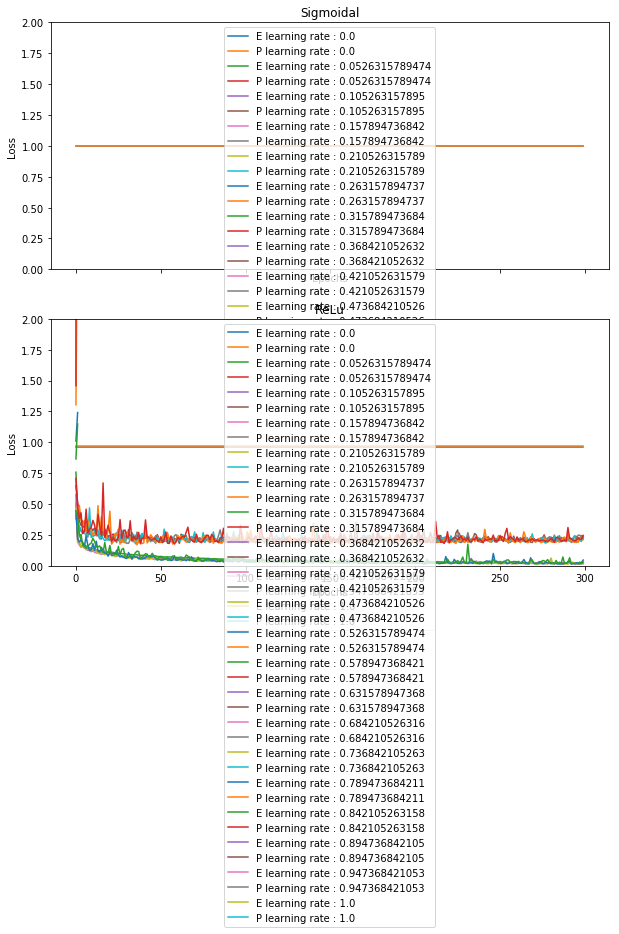

In [264]:
#n_lr = 20
#lear_rate = np.linspace(0,1,n_lr)
#lear_rate

#se fija una semilla para poder generar una comparación
seed = 18
np.random.seed(seed)

plt.close('all')

f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(10,10))

history = []
activation = ['sigmoid','relu']
n_lr = 20
lear_rate = np.linspace(0,1,n_lr)
lear_rate
for l_r in lear_rate:
    print("\n\n Modelos con lr de, {0}".format(l_r))
    for a in activation:
        sgd = SGD(lr = l_r)
        model = create_model(a,sgd)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], label = "E learning rate : "+str(l_r))
            axarr[0].plot(hisx.history['val_loss'], label = "P learning rate : "+str(l_r))
        else:
            axarr[1].plot(hisx.history['loss'], label = "E learning rate : "+str(l_r))
            axarr[1].plot(hisx.history['val_loss'], label = "P learning rate : "+str(l_r))
            
print("\n\n\nE: Conjunto de Entrenamiento, P: Conjunto de Prueba\n")            
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal')
axarr[1].set_title('ReLu')
axarr[0].set_ylim(0,2)
axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper center')
axarr[1].legend(loc='upper center')
plt.show()

De acuerdo al enunciado, los valores para learning rate son:

[0.00,  0.05263158,  0.10526316,  0.15789474,  0.21052632
        0.26315789,  0.31578947,  0.36842105,  0.42105263,  0.47368421,   
        0.52631579,  0.57894737,  0.63157895,  0.68421053,  0.73684211,
        0.78947368,  0.84210526,  0.89473684,  0.94736842,  1.        ]

Sin embargo para el caso de Sigmoid entregaban como resultados valores nan (not a number), desde el segundo valor que es l_r = 0.05263158. En el caso de l_r = 0, las variables loss y val_loss se mantienen con el mismo valor durante toda la ejecución.  Para el caso de la función Relu, entrega valores nan desde el valor 0.368.

Considerando esto es que se probó con otros conjunto de valores mas pequeños para learning rate . Se utilizarán 5 valores, lo que también facilitará la comprensión de los gráficos.

Los valores utilizados son:

[ 0.001  ,  0.00325,  0.0055 ,  0.00775,  0.01   ]

array([ 0.001  ,  0.00325,  0.0055 ,  0.00775,  0.01   ])



 Modelos con lr de, 0.001

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a80988400>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 22s 59ms/step - loss: 0.9965 - acc: 0.0000e+00 - val_loss: 0.9884 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 326us/step - loss: 0.9853 - acc: 0.0000e+00 - val_loss: 0.9851 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 356us/step - loss: 0.9832 - acc: 0.0000e+00 - val_loss: 0.9828 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 350us/step - loss: 0.9809 - acc: 0.0000e+00 - val_loss: 0.9805 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 342us/step - loss: 0.9786 - acc: 0.0000e+00 - val_loss: 0.9778 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 331us/step - loss: 0.9761 - acc: 0.0000e+00 - val_loss: 0

Epoch 57/300
379/379 [==============================] - 0s 312us/step - loss: 0.8142 - acc: 0.0000e+00 - val_loss: 0.8528 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 317us/step - loss: 0.8116 - acc: 0.0000e+00 - val_loss: 0.8503 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 309us/step - loss: 0.8063 - acc: 0.0000e+00 - val_loss: 0.8475 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 340us/step - loss: 0.8060 - acc: 0.0000e+00 - val_loss: 0.8450 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 322us/step - loss: 0.8001 - acc: 0.0000e+00 - val_loss: 0.8423 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 310us/step - loss: 0.7967 - acc: 0.0000e+00 - val_loss: 0.8397 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 325us/step - loss: 0.7944 - acc: 0.0000e+00 - val_loss: 0.8370 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 427us/step - loss: 0.6053 - acc: 0.0000e+00 - val_loss: 0.7061 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 386us/step - loss: 0.6028 - acc: 0.0000e+00 - val_loss: 0.7040 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 397us/step - loss: 0.5999 - acc: 0.0000e+00 - val_loss: 0.7019 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 441us/step - loss: 0.5947 - acc: 0.0000e+00 - val_loss: 0.6995 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 353us/step - loss: 0.5927 - acc: 0.0000e+00 - val_loss: 0.6974 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 338us/step - loss: 0.5885 - acc: 0.0000e+00 - val_loss: 0.6953 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 331us/step - loss: 0.5843 - acc: 0.0000e+00 - val_loss: 0.6936 - val_a

379/379 [==============================] - 0s 320us/step - loss: 0.4550 - acc: 0.0000e+00 - val_loss: 0.6204 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 306us/step - loss: 0.4532 - acc: 0.0000e+00 - val_loss: 0.6194 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 307us/step - loss: 0.4513 - acc: 0.0000e+00 - val_loss: 0.6184 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 302us/step - loss: 0.4498 - acc: 0.0000e+00 - val_loss: 0.6175 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 303us/step - loss: 0.4473 - acc: 0.0000e+00 - val_loss: 0.6167 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 308us/step - loss: 0.4467 - acc: 0.0000e+00 - val_loss: 0.6158 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 302us/step - loss: 0.4444 - acc: 0.0000e+00 - val_loss: 0.6149 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 300us/step - loss: 0.3813 - acc: 0.0000e+00 - val_loss: 0.5832 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 314us/step - loss: 0.3805 - acc: 0.0000e+00 - val_loss: 0.5821 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 301us/step - loss: 0.3792 - acc: 0.0000e+00 - val_loss: 0.5818 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 309us/step - loss: 0.3792 - acc: 0.0000e+00 - val_loss: 0.5811 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 310us/step - loss: 0.3774 - acc: 0.0000e+00 - val_loss: 0.5805 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 320us/step - loss: 0.3771 - acc: 0.0000e+00 - val_loss: 0.5801 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 301us/step - loss: 0.3760 - acc: 0.0000e+00 - val_loss: 0.5796 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 321us/step - loss: 0.3392 - acc: 0.0000e+00 - val_loss: 0.5514 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 342us/step - loss: 0.3386 - acc: 0.0000e+00 - val_loss: 0.5508 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 313us/step - loss: 0.3377 - acc: 0.0000e+00 - val_loss: 0.5502 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 307us/step - loss: 0.3376 - acc: 0.0000e+00 - val_loss: 0.5498 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 308us/step - loss: 0.3360 - acc: 0.0000e+00 - val_loss: 0.5493 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 320us/step - loss: 0.3360 - acc: 0.0000e+00 - val_loss: 0.5486 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 322us/step - loss: 0.3355 - acc: 0.0000e+00 - val_loss: 0.5481 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a81f32c18>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 27s 70ms/step - loss: 0.9532 - acc: 0.0000e+00 - val_loss: 0.9586 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 316us/step - loss: 0.9408 - acc: 0.0000e+00 - val_loss: 0.9491 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 317us/step - loss: 0.9286 - acc: 0.0000e+00 - val_loss: 0.9398 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 318us/step - loss: 0.9165 - acc: 0.0000e+00 - val_loss: 0.9307 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 314us/step - loss: 0.9045 - acc: 0.0000e+00 - val_loss: 0.9216 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 328us/step - loss: 0.8928 - acc: 0.0000e+00 - val_loss: 0.9127 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 322us/step - loss: 0.4233 - acc: 0.0000e+00 - val_loss: 0.5964 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 300us/step - loss: 0.4178 - acc: 0.0000e+00 - val_loss: 0.5931 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 293us/step - loss: 0.4125 - acc: 0.0000e+00 - val_loss: 0.5899 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 300us/step - loss: 0.4073 - acc: 0.0000e+00 - val_loss: 0.5868 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 310us/step - loss: 0.4021 - acc: 0.0000e+00 - val_loss: 0.5838 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 304us/step - loss: 0.3972 - acc: 0.0000e+00 - val_loss: 0.5808 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 300us/step - loss: 0.3922 - acc: 0.0000e+00 - val_loss: 0.5779 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 307us/step - loss: 0.2489 - acc: 0.0000e+00 - val_loss: 0.4681 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 302us/step - loss: 0.2473 - acc: 0.0000e+00 - val_loss: 0.4664 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 301us/step - loss: 0.2457 - acc: 0.0000e+00 - val_loss: 0.4646 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 293us/step - loss: 0.2441 - acc: 0.0000e+00 - val_loss: 0.4630 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 304us/step - loss: 0.2427 - acc: 0.0000e+00 - val_loss: 0.4613 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 295us/step - loss: 0.2412 - acc: 0.0000e+00 - val_loss: 0.4596 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 301us/step - loss: 0.2397 - acc: 0.0000e+00 - val_loss: 0.4579 - val_a

379/379 [==============================] - 0s 303us/step - loss: 0.1924 - acc: 0.0000e+00 - val_loss: 0.3960 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 304us/step - loss: 0.1918 - acc: 0.0000e+00 - val_loss: 0.3951 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 309us/step - loss: 0.1911 - acc: 0.0000e+00 - val_loss: 0.3942 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 298us/step - loss: 0.1906 - acc: 0.0000e+00 - val_loss: 0.3933 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 314us/step - loss: 0.1901 - acc: 0.0000e+00 - val_loss: 0.3924 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 303us/step - loss: 0.1895 - acc: 0.0000e+00 - val_loss: 0.3916 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 290us/step - loss: 0.1890 - acc: 0.0000e+00 - val_loss: 0.3907 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 364us/step - loss: 0.1700 - acc: 0.0000e+00 - val_loss: 0.3583 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 324us/step - loss: 0.1697 - acc: 0.0000e+00 - val_loss: 0.3578 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 312us/step - loss: 0.1694 - acc: 0.0000e+00 - val_loss: 0.3574 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 356us/step - loss: 0.1692 - acc: 0.0000e+00 - val_loss: 0.3568 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 362us/step - loss: 0.1689 - acc: 0.0000e+00 - val_loss: 0.3564 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 352us/step - loss: 0.1687 - acc: 0.0000e+00 - val_loss: 0.3559 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 366us/step - loss: 0.1684 - acc: 0.0000e+00 - val_loss: 0.3554 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 334us/step - loss: 0.1578 - acc: 0.0000e+00 - val_loss: 0.3363 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 305us/step - loss: 0.1576 - acc: 0.0000e+00 - val_loss: 0.3360 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 308us/step - loss: 0.1574 - acc: 0.0000e+00 - val_loss: 0.3356 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 324us/step - loss: 0.1572 - acc: 0.0000e+00 - val_loss: 0.3353 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 341us/step - loss: 0.1571 - acc: 0.0000e+00 - val_loss: 0.3350 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 344us/step - loss: 0.1569 - acc: 0.0000e+00 - val_loss: 0.3347 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 393us/step - loss: 0.1567 - acc: 0.0000e+00 - val_loss: 0.3343 - val_acc: 0.0000e+00



 Modelos con lr de, 0.0032500000000000003

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7f498470>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 20s 53ms/step - loss: 1.0002 - acc: 0.0000e+00 - val_loss: 0.9902 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 286us/step - loss: 0.9842 - acc: 0.0000e+00 - val_loss: 0.9867 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 295us/step - loss: 0.9789 - acc: 0.0000e+00 - val_loss: 0.9813 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 323us/step - loss: 0.9738 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 301us/step - loss: 0.9591 - acc: 0.0000e+00 - val_loss: 0.9687 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 292us/step - loss: 0.9586 - acc: 0.0000e+

379/379 [==============================] - 0s 311us/step - loss: 0.4564 - acc: 0.0000e+00 - val_loss: 0.6217 - val_acc: 0.0000e+00
Epoch 57/300
379/379 [==============================] - 0s 380us/step - loss: 0.4506 - acc: 0.0000e+00 - val_loss: 0.6207 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 340us/step - loss: 0.4421 - acc: 0.0000e+00 - val_loss: 0.6231 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 328us/step - loss: 0.4420 - acc: 0.0000e+00 - val_loss: 0.6131 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 339us/step - loss: 0.4364 - acc: 0.0000e+00 - val_loss: 0.6100 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 368us/step - loss: 0.4277 - acc: 0.0000e+00 - val_loss: 0.6112 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 315us/step - loss: 0.4277 - acc: 0.0000e+00 - val_loss: 0.6093 - val_acc: 0.0000e+00
Epoch

Epoch 113/300
379/379 [==============================] - 0s 329us/step - loss: 0.3005 - acc: 0.0000e+00 - val_loss: 0.5070 - val_acc: 0.0000e+00
Epoch 114/300
379/379 [==============================] - 0s 315us/step - loss: 0.3006 - acc: 0.0000e+00 - val_loss: 0.5054 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 329us/step - loss: 0.2994 - acc: 0.0000e+00 - val_loss: 0.5049 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 359us/step - loss: 0.2991 - acc: 0.0000e+00 - val_loss: 0.5018 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 351us/step - loss: 0.2966 - acc: 0.0000e+00 - val_loss: 0.5016 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 329us/step - loss: 0.2959 - acc: 0.0000e+00 - val_loss: 0.4989 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 353us/step - loss: 0.2948 - acc: 0.0000e+00 - val_loss: 0.4970 - val_a

379/379 [==============================] - 0s 376us/step - loss: 0.2581 - acc: 0.0000e+00 - val_loss: 0.4455 - val_acc: 0.0000e+00
Epoch 170/300
379/379 [==============================] - 0s 335us/step - loss: 0.2598 - acc: 0.0000e+00 - val_loss: 0.4433 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 318us/step - loss: 0.2598 - acc: 0.0000e+00 - val_loss: 0.4420 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 327us/step - loss: 0.2564 - acc: 0.0000e+00 - val_loss: 0.4436 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 352us/step - loss: 0.2598 - acc: 0.0000e+00 - val_loss: 0.4411 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 339us/step - loss: 0.2573 - acc: 0.0000e+00 - val_loss: 0.4404 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 328us/step - loss: 0.2563 - acc: 0.0000e+00 - val_loss: 0.4394 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 347us/step - loss: 0.2475 - acc: 0.0000e+00 - val_loss: 0.4188 - val_acc: 0.0000e+00
Epoch 226/300
379/379 [==============================] - 0s 342us/step - loss: 0.2473 - acc: 0.0000e+00 - val_loss: 0.4210 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 360us/step - loss: 0.2479 - acc: 0.0000e+00 - val_loss: 0.4201 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 348us/step - loss: 0.2474 - acc: 0.0000e+00 - val_loss: 0.4184 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 333us/step - loss: 0.2476 - acc: 0.0000e+00 - val_loss: 0.4181 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 383us/step - loss: 0.2475 - acc: 0.0000e+00 - val_loss: 0.4199 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 352us/step - loss: 0.2475 - acc: 0.0000e+00 - val_loss: 0.4172 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 358us/step - loss: 0.2443 - acc: 0.0000e+00 - val_loss: 0.4078 - val_acc: 0.0000e+00
Epoch 282/300
379/379 [==============================] - 0s 353us/step - loss: 0.2445 - acc: 0.0000e+00 - val_loss: 0.4083 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 338us/step - loss: 0.2438 - acc: 0.0000e+00 - val_loss: 0.4077 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 360us/step - loss: 0.2457 - acc: 0.0000e+00 - val_loss: 0.4074 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 367us/step - loss: 0.2427 - acc: 0.0000e+00 - val_loss: 0.4093 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 337us/step - loss: 0.2435 - acc: 0.0000e+00 - val_loss: 0.4084 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 351us/step - loss: 0.2434 - acc: 0.0000e+00 - val_loss: 0.4077 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a8321ff98>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 27s 71ms/step - loss: 1.0011 - acc: 0.0000e+00 - val_loss: 0.9865 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 355us/step - loss: 0.9559 - acc: 0.0000e+00 - val_loss: 0.9526 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 318us/step - loss: 0.9139 - acc: 0.0000e+00 - val_loss: 0.9212 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 322us/step - loss: 0.8745 - acc: 0.0000e+00 - val_loss: 0.8917 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 323us/step - loss: 0.8368 - acc: 0.0000e+00 - val_loss: 0.8641 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 326us/step - loss: 0.8003 - acc: 0.0000e+00 - val_loss: 0.8377 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 323us/step - loss: 0.1946 - acc: 0.0000e+00 - val_loss: 0.3953 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 323us/step - loss: 0.1927 - acc: 0.0000e+00 - val_loss: 0.3925 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 331us/step - loss: 0.1910 - acc: 0.0000e+00 - val_loss: 0.3898 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 333us/step - loss: 0.1892 - acc: 0.0000e+00 - val_loss: 0.3871 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 347us/step - loss: 0.1877 - acc: 0.0000e+00 - val_loss: 0.3848 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 339us/step - loss: 0.1864 - acc: 0.0000e+00 - val_loss: 0.3823 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 352us/step - loss: 0.1847 - acc: 0.0000e+00 - val_loss: 0.3800 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 330us/step - loss: 0.1489 - acc: 0.0000e+00 - val_loss: 0.3206 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 342us/step - loss: 0.1485 - acc: 0.0000e+00 - val_loss: 0.3198 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 345us/step - loss: 0.1481 - acc: 0.0000e+00 - val_loss: 0.3188 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 339us/step - loss: 0.1477 - acc: 0.0000e+00 - val_loss: 0.3184 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 326us/step - loss: 0.1471 - acc: 0.0000e+00 - val_loss: 0.3181 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 335us/step - loss: 0.1468 - acc: 0.0000e+00 - val_loss: 0.3173 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 335us/step - loss: 0.1464 - acc: 0.0000e+00 - val_loss: 0.3166 - val_a

379/379 [==============================] - 0s 321us/step - loss: 0.1303 - acc: 0.0000e+00 - val_loss: 0.2939 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 321us/step - loss: 0.1300 - acc: 0.0000e+00 - val_loss: 0.2931 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 340us/step - loss: 0.1296 - acc: 0.0000e+00 - val_loss: 0.2928 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 335us/step - loss: 0.1295 - acc: 0.0000e+00 - val_loss: 0.2926 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 332us/step - loss: 0.1292 - acc: 0.0000e+00 - val_loss: 0.2923 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 325us/step - loss: 0.1290 - acc: 0.0000e+00 - val_loss: 0.2918 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 325us/step - loss: 0.1287 - acc: 0.0000e+00 - val_loss: 0.2915 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 417us/step - loss: 0.1179 - acc: 0.0000e+00 - val_loss: 0.2764 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 341us/step - loss: 0.1178 - acc: 0.0000e+00 - val_loss: 0.2762 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 316us/step - loss: 0.1177 - acc: 0.0000e+00 - val_loss: 0.2760 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 312us/step - loss: 0.1175 - acc: 0.0000e+00 - val_loss: 0.2758 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 435us/step - loss: 0.1172 - acc: 0.0000e+00 - val_loss: 0.2755 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 437us/step - loss: 0.1171 - acc: 0.0000e+00 - val_loss: 0.2756 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 457us/step - loss: 0.1169 - acc: 0.0000e+00 - val_loss: 0.2751 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 328us/step - loss: 0.1090 - acc: 0.0000e+00 - val_loss: 0.2649 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 337us/step - loss: 0.1089 - acc: 0.0000e+00 - val_loss: 0.2647 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 332us/step - loss: 0.1086 - acc: 0.0000e+00 - val_loss: 0.2645 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 339us/step - loss: 0.1086 - acc: 0.0000e+00 - val_loss: 0.2640 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 334us/step - loss: 0.1082 - acc: 0.0000e+00 - val_loss: 0.2642 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 332us/step - loss: 0.1083 - acc: 0.0000e+00 - val_loss: 0.2638 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 357us/step - loss: 0.1079 - acc: 0.0000e+00 - val_loss: 0.2640 - val_acc: 0.0000e+00



 Modelos con lr de, 0.0055000000000000005

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a8334a4e0>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 24s 63ms/step - loss: 1.0108 - acc: 0.0000e+00 - val_loss: 1.0051 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 361us/step - loss: 1.0003 - acc: 0.0000e+00 - val_loss: 0.9857 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 328us/step - loss: 0.9731 - acc: 0.0000e+00 - val_loss: 0.9631 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 445us/step - loss: 0.9683 - acc: 0.0000e+00 - val_loss: 0.9837 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 332us/step - loss: 0.9645 - acc: 0.0000e+00 - val_loss: 0.9468 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 334us/step - loss: 0.9310 - acc: 0.0000e+

379/379 [==============================] - 0s 305us/step - loss: 0.3328 - acc: 0.0000e+00 - val_loss: 0.5381 - val_acc: 0.0000e+00
Epoch 57/300
379/379 [==============================] - 0s 305us/step - loss: 0.3300 - acc: 0.0000e+00 - val_loss: 0.5422 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 317us/step - loss: 0.3276 - acc: 0.0000e+00 - val_loss: 0.5330 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 306us/step - loss: 0.3223 - acc: 0.0000e+00 - val_loss: 0.5297 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 310us/step - loss: 0.3197 - acc: 0.0000e+00 - val_loss: 0.5272 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 308us/step - loss: 0.3184 - acc: 0.0000e+00 - val_loss: 0.5251 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 335us/step - loss: 0.3136 - acc: 0.0000e+00 - val_loss: 0.5230 - val_acc: 0.0000e+00
Epoch

Epoch 113/300
379/379 [==============================] - 0s 297us/step - loss: 0.2604 - acc: 0.0000e+00 - val_loss: 0.4343 - val_acc: 0.0000e+00
Epoch 114/300
379/379 [==============================] - 0s 313us/step - loss: 0.2575 - acc: 0.0000e+00 - val_loss: 0.4404 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 317us/step - loss: 0.2538 - acc: 0.0000e+00 - val_loss: 0.4336 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 317us/step - loss: 0.2563 - acc: 0.0000e+00 - val_loss: 0.4334 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 314us/step - loss: 0.2541 - acc: 0.0000e+00 - val_loss: 0.4383 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 375us/step - loss: 0.2557 - acc: 0.0000e+00 - val_loss: 0.4304 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 481us/step - loss: 0.2559 - acc: 0.0000e+00 - val_loss: 0.4304 - val_a

379/379 [==============================] - 0s 316us/step - loss: 0.2453 - acc: 0.0000e+00 - val_loss: 0.4108 - val_acc: 0.0000e+00
Epoch 170/300
379/379 [==============================] - 0s 296us/step - loss: 0.2499 - acc: 0.0000e+00 - val_loss: 0.4109 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 313us/step - loss: 0.2466 - acc: 0.0000e+00 - val_loss: 0.4140 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 312us/step - loss: 0.2452 - acc: 0.0000e+00 - val_loss: 0.4155 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 304us/step - loss: 0.2513 - acc: 0.0000e+00 - val_loss: 0.4083 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 309us/step - loss: 0.2445 - acc: 0.0000e+00 - val_loss: 0.4079 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 306us/step - loss: 0.2479 - acc: 0.0000e+00 - val_loss: 0.4149 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 358us/step - loss: 0.2415 - acc: 0.0000e+00 - val_loss: 0.4003 - val_acc: 0.0000e+00
Epoch 226/300
379/379 [==============================] - 0s 350us/step - loss: 0.2424 - acc: 0.0000e+00 - val_loss: 0.4059 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 354us/step - loss: 0.2429 - acc: 0.0000e+00 - val_loss: 0.4016 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 318us/step - loss: 0.2410 - acc: 0.0000e+00 - val_loss: 0.3998 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 311us/step - loss: 0.2402 - acc: 0.0000e+00 - val_loss: 0.3998 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 316us/step - loss: 0.2428 - acc: 0.0000e+00 - val_loss: 0.4020 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 348us/step - loss: 0.2411 - acc: 0.0000e+00 - val_loss: 0.4004 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 315us/step - loss: 0.2409 - acc: 0.0000e+00 - val_loss: 0.3950 - val_acc: 0.0000e+00
Epoch 282/300
379/379 [==============================] - 0s 345us/step - loss: 0.2400 - acc: 0.0000e+00 - val_loss: 0.3941 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 332us/step - loss: 0.2390 - acc: 0.0000e+00 - val_loss: 0.3951 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 352us/step - loss: 0.2383 - acc: 0.0000e+00 - val_loss: 0.3955 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 341us/step - loss: 0.2402 - acc: 0.0000e+00 - val_loss: 0.3943 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 347us/step - loss: 0.2382 - acc: 0.0000e+00 - val_loss: 0.4036 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 368us/step - loss: 0.2383 - acc: 0.0000e+00 - val_loss: 0.3962 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7dc51e80>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 21s 55ms/step - loss: 0.9895 - acc: 0.0000e+00 - val_loss: 0.9651 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 327us/step - loss: 0.9189 - acc: 0.0000e+00 - val_loss: 0.9131 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 310us/step - loss: 0.8528 - acc: 0.0000e+00 - val_loss: 0.8641 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 315us/step - loss: 0.7888 - acc: 0.0000e+00 - val_loss: 0.8174 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 320us/step - loss: 0.7268 - acc: 0.0000e+00 - val_loss: 0.7737 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 314us/step - loss: 0.6672 - acc: 0.0000e+00 - val_loss: 0.7330 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 355us/step - loss: 0.1558 - acc: 0.0000e+00 - val_loss: 0.3371 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 354us/step - loss: 0.1551 - acc: 0.0000e+00 - val_loss: 0.3361 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 344us/step - loss: 0.1544 - acc: 0.0000e+00 - val_loss: 0.3355 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 346us/step - loss: 0.1534 - acc: 0.0000e+00 - val_loss: 0.3340 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 327us/step - loss: 0.1530 - acc: 0.0000e+00 - val_loss: 0.3329 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 312us/step - loss: 0.1525 - acc: 0.0000e+00 - val_loss: 0.3310 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 307us/step - loss: 0.1516 - acc: 0.0000e+00 - val_loss: 0.3305 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 310us/step - loss: 0.1276 - acc: 0.0000e+00 - val_loss: 0.2919 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 303us/step - loss: 0.1276 - acc: 0.0000e+00 - val_loss: 0.2910 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 313us/step - loss: 0.1271 - acc: 0.0000e+00 - val_loss: 0.2900 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 316us/step - loss: 0.1262 - acc: 0.0000e+00 - val_loss: 0.2898 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 314us/step - loss: 0.1261 - acc: 0.0000e+00 - val_loss: 0.2890 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 302us/step - loss: 0.1261 - acc: 0.0000e+00 - val_loss: 0.2892 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 305us/step - loss: 0.1254 - acc: 0.0000e+00 - val_loss: 0.2889 - val_a

379/379 [==============================] - 0s 362us/step - loss: 0.1118 - acc: 0.0000e+00 - val_loss: 0.2693 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 323us/step - loss: 0.1112 - acc: 0.0000e+00 - val_loss: 0.2693 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 328us/step - loss: 0.1115 - acc: 0.0000e+00 - val_loss: 0.2694 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 349us/step - loss: 0.1112 - acc: 0.0000e+00 - val_loss: 0.2700 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 325us/step - loss: 0.1108 - acc: 0.0000e+00 - val_loss: 0.2695 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 324us/step - loss: 0.1105 - acc: 0.0000e+00 - val_loss: 0.2689 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 334us/step - loss: 0.1103 - acc: 0.0000e+00 - val_loss: 0.2695 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 337us/step - loss: 0.1004 - acc: 0.0000e+00 - val_loss: 0.2580 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 317us/step - loss: 0.1000 - acc: 0.0000e+00 - val_loss: 0.2573 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 300us/step - loss: 0.0999 - acc: 0.0000e+00 - val_loss: 0.2570 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 308us/step - loss: 0.0996 - acc: 0.0000e+00 - val_loss: 0.2572 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 323us/step - loss: 0.0995 - acc: 0.0000e+00 - val_loss: 0.2576 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 305us/step - loss: 0.0995 - acc: 0.0000e+00 - val_loss: 0.2573 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 302us/step - loss: 0.0992 - acc: 0.0000e+00 - val_loss: 0.2576 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 364us/step - loss: 0.0919 - acc: 0.0000e+00 - val_loss: 0.2484 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 348us/step - loss: 0.0917 - acc: 0.0000e+00 - val_loss: 0.2488 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 354us/step - loss: 0.0917 - acc: 0.0000e+00 - val_loss: 0.2480 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 334us/step - loss: 0.0917 - acc: 0.0000e+00 - val_loss: 0.2479 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 332us/step - loss: 0.0913 - acc: 0.0000e+00 - val_loss: 0.2481 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 348us/step - loss: 0.0910 - acc: 0.0000e+00 - val_loss: 0.2482 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 338us/step - loss: 0.0907 - acc: 0.0000e+00 - val_loss: 0.2480 - val_acc: 0.0000e+00



 Modelos con lr de, 0.007750000000000001

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a83401438>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 24s 63ms/step - loss: 1.0235 - acc: 0.0000e+00 - val_loss: 0.9885 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 316us/step - loss: 0.9714 - acc: 0.0000e+00 - val_loss: 1.0014 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 302us/step - loss: 0.9613 - acc: 0.0000e+00 - val_loss: 0.9450 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 294us/step - loss: 0.9372 - acc: 0.0000e+00 - val_loss: 0.9580 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 314us/step - loss: 0.9288 - acc: 0.0000e+00 - val_loss: 0.9109 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 316us/step - loss: 0.8801 - acc: 0.0000e+0

Epoch 57/300
379/379 [==============================] - 0s 309us/step - loss: 0.2899 - acc: 0.0000e+00 - val_loss: 0.4818 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 317us/step - loss: 0.2861 - acc: 0.0000e+00 - val_loss: 0.4839 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 333us/step - loss: 0.2802 - acc: 0.0000e+00 - val_loss: 0.4746 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 344us/step - loss: 0.2772 - acc: 0.0000e+00 - val_loss: 0.4745 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 342us/step - loss: 0.2719 - acc: 0.0000e+00 - val_loss: 0.4776 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 311us/step - loss: 0.2825 - acc: 0.0000e+00 - val_loss: 0.4660 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 322us/step - loss: 0.2704 - acc: 0.0000e+00 - val_loss: 0.4634 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 333us/step - loss: 0.2485 - acc: 0.0000e+00 - val_loss: 0.4135 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 348us/step - loss: 0.2459 - acc: 0.0000e+00 - val_loss: 0.4317 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 355us/step - loss: 0.2503 - acc: 0.0000e+00 - val_loss: 0.4158 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 330us/step - loss: 0.2478 - acc: 0.0000e+00 - val_loss: 0.4362 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 320us/step - loss: 0.2507 - acc: 0.0000e+00 - val_loss: 0.4109 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 318us/step - loss: 0.2605 - acc: 0.0000e+00 - val_loss: 0.4177 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 337us/step - loss: 0.2524 - acc: 0.0000e+00 - val_loss: 0.4320 - val_a

379/379 [==============================] - 0s 328us/step - loss: 0.2425 - acc: 0.0000e+00 - val_loss: 0.4288 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 331us/step - loss: 0.2509 - acc: 0.0000e+00 - val_loss: 0.4049 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 345us/step - loss: 0.2417 - acc: 0.0000e+00 - val_loss: 0.4037 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 338us/step - loss: 0.2475 - acc: 0.0000e+00 - val_loss: 0.4005 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 319us/step - loss: 0.2433 - acc: 0.0000e+00 - val_loss: 0.4002 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 318us/step - loss: 0.2431 - acc: 0.0000e+00 - val_loss: 0.4006 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 305us/step - loss: 0.2449 - acc: 0.0000e+00 - val_loss: 0.3980 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 327us/step - loss: 0.2388 - acc: 0.0000e+00 - val_loss: 0.4106 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 323us/step - loss: 0.2458 - acc: 0.0000e+00 - val_loss: 0.3923 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 333us/step - loss: 0.2372 - acc: 0.0000e+00 - val_loss: 0.4091 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 307us/step - loss: 0.2499 - acc: 0.0000e+00 - val_loss: 0.3935 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 320us/step - loss: 0.2427 - acc: 0.0000e+00 - val_loss: 0.4004 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 340us/step - loss: 0.2489 - acc: 0.0000e+00 - val_loss: 0.3983 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 353us/step - loss: 0.2429 - acc: 0.0000e+00 - val_loss: 0.3962 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 344us/step - loss: 0.2403 - acc: 0.0000e+00 - val_loss: 0.3975 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 323us/step - loss: 0.2481 - acc: 0.0000e+00 - val_loss: 0.3873 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 330us/step - loss: 0.2421 - acc: 0.0000e+00 - val_loss: 0.3867 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 339us/step - loss: 0.2366 - acc: 0.0000e+00 - val_loss: 0.3865 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 324us/step - loss: 0.2356 - acc: 0.0000e+00 - val_loss: 0.3876 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 332us/step - loss: 0.2439 - acc: 0.0000e+00 - val_loss: 0.4003 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 324us/step - loss: 0.2462 - acc: 0.0000e+00 - val_loss: 0.4015 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a8398bf28>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 34s 91ms/step - loss: 0.9558 - acc: 0.0000e+00 - val_loss: 0.9200 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 313us/step - loss: 0.8531 - acc: 0.0000e+00 - val_loss: 0.8466 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 357us/step - loss: 0.7591 - acc: 0.0000e+00 - val_loss: 0.7798 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 326us/step - loss: 0.6710 - acc: 0.0000e+00 - val_loss: 0.7197 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 350us/step - loss: 0.5901 - acc: 0.0000e+00 - val_loss: 0.6682 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 361us/step - loss: 0.5181 - acc: 0.0000e+00 - val_loss: 0.6265 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 518us/step - loss: 0.1395 - acc: 0.0000e+00 - val_loss: 0.3066 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 491us/step - loss: 0.1388 - acc: 0.0000e+00 - val_loss: 0.3041 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 324us/step - loss: 0.1380 - acc: 0.0000e+00 - val_loss: 0.3043 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 329us/step - loss: 0.1371 - acc: 0.0000e+00 - val_loss: 0.3041 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 349us/step - loss: 0.1366 - acc: 0.0000e+00 - val_loss: 0.3035 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 337us/step - loss: 0.1365 - acc: 0.0000e+00 - val_loss: 0.3031 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 303us/step - loss: 0.1350 - acc: 0.0000e+00 - val_loss: 0.3022 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 359us/step - loss: 0.1136 - acc: 0.0000e+00 - val_loss: 0.2688 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 322us/step - loss: 0.1128 - acc: 0.0000e+00 - val_loss: 0.2698 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 320us/step - loss: 0.1131 - acc: 0.0000e+00 - val_loss: 0.2692 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 342us/step - loss: 0.1125 - acc: 0.0000e+00 - val_loss: 0.2692 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 310us/step - loss: 0.1119 - acc: 0.0000e+00 - val_loss: 0.2674 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 341us/step - loss: 0.1121 - acc: 0.0000e+00 - val_loss: 0.2681 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 439us/step - loss: 0.1117 - acc: 0.0000e+00 - val_loss: 0.2663 - val_a

379/379 [==============================] - 0s 331us/step - loss: 0.0988 - acc: 0.0000e+00 - val_loss: 0.2519 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 345us/step - loss: 0.0984 - acc: 0.0000e+00 - val_loss: 0.2504 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 381us/step - loss: 0.0980 - acc: 0.0000e+00 - val_loss: 0.2514 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 390us/step - loss: 0.0983 - acc: 0.0000e+00 - val_loss: 0.2523 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 380us/step - loss: 0.0983 - acc: 0.0000e+00 - val_loss: 0.2523 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 346us/step - loss: 0.0977 - acc: 0.0000e+00 - val_loss: 0.2510 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 376us/step - loss: 0.0974 - acc: 0.0000e+00 - val_loss: 0.2503 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 313us/step - loss: 0.0886 - acc: 0.0000e+00 - val_loss: 0.2390 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 310us/step - loss: 0.0888 - acc: 0.0000e+00 - val_loss: 0.2389 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 420us/step - loss: 0.0884 - acc: 0.0000e+00 - val_loss: 0.2387 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 379us/step - loss: 0.0884 - acc: 0.0000e+00 - val_loss: 0.2392 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 343us/step - loss: 0.0882 - acc: 0.0000e+00 - val_loss: 0.2365 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 356us/step - loss: 0.0881 - acc: 0.0000e+00 - val_loss: 0.2372 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 352us/step - loss: 0.0880 - acc: 0.0000e+00 - val_loss: 0.2385 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 318us/step - loss: 0.0813 - acc: 0.0000e+00 - val_loss: 0.2311 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 351us/step - loss: 0.0812 - acc: 0.0000e+00 - val_loss: 0.2297 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 344us/step - loss: 0.0809 - acc: 0.0000e+00 - val_loss: 0.2293 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 347us/step - loss: 0.0812 - acc: 0.0000e+00 - val_loss: 0.2287 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 327us/step - loss: 0.0812 - acc: 0.0000e+00 - val_loss: 0.2306 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 338us/step - loss: 0.0809 - acc: 0.0000e+00 - val_loss: 0.2293 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 320us/step - loss: 0.0807 - acc: 0.0000e+00 - val_loss: 0.2277 - val_acc: 0.0000e+00



 Modelos con lr de, 0.01

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7ca89f28>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 29s 75ms/step - loss: 1.0106 - acc: 0.0000e+00 - val_loss: 0.9778 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 385us/step - loss: 0.9721 - acc: 0.0000e+00 - val_loss: 0.9953 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 376us/step - loss: 0.9273 - acc: 0.0000e+00 - val_loss: 1.0562 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 341us/step - loss: 0.9474 - acc: 0.0000e+00 - val_loss: 0.9224 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 356us/step - loss: 0.8954 - acc: 0.0000e+00 - val_loss: 0.8813 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 314us/step - loss: 0.8399 - acc: 0.0000e+00 - val_loss: 0.

Epoch 57/300
379/379 [==============================] - 0s 324us/step - loss: 0.2655 - acc: 0.0000e+00 - val_loss: 0.4643 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 309us/step - loss: 0.2704 - acc: 0.0000e+00 - val_loss: 0.4855 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 302us/step - loss: 0.2697 - acc: 0.0000e+00 - val_loss: 0.4725 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 309us/step - loss: 0.2809 - acc: 0.0000e+00 - val_loss: 0.4434 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 312us/step - loss: 0.2635 - acc: 0.0000e+00 - val_loss: 0.4492 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 311us/step - loss: 0.2783 - acc: 0.0000e+00 - val_loss: 0.4369 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 345us/step - loss: 0.2525 - acc: 0.0000e+00 - val_loss: 0.4384 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 300us/step - loss: 0.2449 - acc: 0.0000e+00 - val_loss: 0.4100 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 307us/step - loss: 0.2485 - acc: 0.0000e+00 - val_loss: 0.4045 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 309us/step - loss: 0.2662 - acc: 0.0000e+00 - val_loss: 0.4452 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 304us/step - loss: 0.2470 - acc: 0.0000e+00 - val_loss: 0.4030 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 306us/step - loss: 0.2421 - acc: 0.0000e+00 - val_loss: 0.4023 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 304us/step - loss: 0.2474 - acc: 0.0000e+00 - val_loss: 0.4045 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 306us/step - loss: 0.2448 - acc: 0.0000e+00 - val_loss: 0.4126 - val_a

379/379 [==============================] - 0s 301us/step - loss: 0.2388 - acc: 0.0000e+00 - val_loss: 0.4220 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 303us/step - loss: 0.2457 - acc: 0.0000e+00 - val_loss: 0.4011 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 308us/step - loss: 0.2498 - acc: 0.0000e+00 - val_loss: 0.3987 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 303us/step - loss: 0.2452 - acc: 0.0000e+00 - val_loss: 0.3968 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 298us/step - loss: 0.2471 - acc: 0.0000e+00 - val_loss: 0.3939 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 305us/step - loss: 0.2429 - acc: 0.0000e+00 - val_loss: 0.3922 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 306us/step - loss: 0.2392 - acc: 0.0000e+00 - val_loss: 0.3988 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 299us/step - loss: 0.2413 - acc: 0.0000e+00 - val_loss: 0.3933 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 310us/step - loss: 0.2423 - acc: 0.0000e+00 - val_loss: 0.3992 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 305us/step - loss: 0.2396 - acc: 0.0000e+00 - val_loss: 0.4004 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 383us/step - loss: 0.2467 - acc: 0.0000e+00 - val_loss: 0.3876 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 320us/step - loss: 0.2376 - acc: 0.0000e+00 - val_loss: 0.4369 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 322us/step - loss: 0.2453 - acc: 0.0000e+00 - val_loss: 0.4067 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 303us/step - loss: 0.2328 - acc: 0.0000e+00 - val_loss: 0.3910 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 289us/step - loss: 0.2466 - acc: 0.0000e+00 - val_loss: 0.3846 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 308us/step - loss: 0.2384 - acc: 0.0000e+00 - val_loss: 0.3945 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 309us/step - loss: 0.2410 - acc: 0.0000e+00 - val_loss: 0.3880 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 291us/step - loss: 0.2365 - acc: 0.0000e+00 - val_loss: 0.3844 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 301us/step - loss: 0.2381 - acc: 0.0000e+00 - val_loss: 0.3842 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 300us/step - loss: 0.2386 - acc: 0.0000e+00 - val_loss: 0.3831 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 302us/step - loss: 0.2375 - acc: 0.0000e+00 - val_loss: 0.3946 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a760f1c50>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 20s 53ms/step - loss: 0.9653 - acc: 0.0000e+00 - val_loss: 0.9203 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 351us/step - loss: 0.8581 - acc: 0.0000e+00 - val_loss: 0.8418 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 362us/step - loss: 0.7576 - acc: 0.0000e+00 - val_loss: 0.7696 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 357us/step - loss: 0.6582 - acc: 0.0000e+00 - val_loss: 0.7040 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 356us/step - loss: 0.5674 - acc: 0.0000e+00 - val_loss: 0.6502 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 316us/step - loss: 0.4905 - acc: 0.0000e+00 - val_loss: 0.6089 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 328us/step - loss: 0.1342 - acc: 0.0000e+00 - val_loss: 0.3009 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 370us/step - loss: 0.1333 - acc: 0.0000e+00 - val_loss: 0.2995 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 369us/step - loss: 0.1325 - acc: 0.0000e+00 - val_loss: 0.2964 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 366us/step - loss: 0.1315 - acc: 0.0000e+00 - val_loss: 0.2967 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 316us/step - loss: 0.1311 - acc: 0.0000e+00 - val_loss: 0.2949 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 315us/step - loss: 0.1301 - acc: 0.0000e+00 - val_loss: 0.2941 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 323us/step - loss: 0.1297 - acc: 0.0000e+00 - val_loss: 0.2938 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 455us/step - loss: 0.1047 - acc: 0.0000e+00 - val_loss: 0.2618 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 484us/step - loss: 0.1050 - acc: 0.0000e+00 - val_loss: 0.2628 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 503us/step - loss: 0.1036 - acc: 0.0000e+00 - val_loss: 0.2593 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 457us/step - loss: 0.1030 - acc: 0.0000e+00 - val_loss: 0.2587 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 361us/step - loss: 0.1034 - acc: 0.0000e+00 - val_loss: 0.2577 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 379us/step - loss: 0.1029 - acc: 0.0000e+00 - val_loss: 0.2604 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 425us/step - loss: 0.1024 - acc: 0.0000e+00 - val_loss: 0.2599 - val_a

379/379 [==============================] - 0s 359us/step - loss: 0.0892 - acc: 0.0000e+00 - val_loss: 0.2446 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 360us/step - loss: 0.0888 - acc: 0.0000e+00 - val_loss: 0.2440 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 358us/step - loss: 0.0888 - acc: 0.0000e+00 - val_loss: 0.2411 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 347us/step - loss: 0.0882 - acc: 0.0000e+00 - val_loss: 0.2415 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 338us/step - loss: 0.0875 - acc: 0.0000e+00 - val_loss: 0.2403 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 355us/step - loss: 0.0874 - acc: 0.0000e+00 - val_loss: 0.2417 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 351us/step - loss: 0.0877 - acc: 0.0000e+00 - val_loss: 0.2426 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 358us/step - loss: 0.0782 - acc: 0.0000e+00 - val_loss: 0.2316 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 360us/step - loss: 0.0779 - acc: 0.0000e+00 - val_loss: 0.2319 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 371us/step - loss: 0.0779 - acc: 0.0000e+00 - val_loss: 0.2335 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 345us/step - loss: 0.0778 - acc: 0.0000e+00 - val_loss: 0.2329 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 308us/step - loss: 0.0775 - acc: 0.0000e+00 - val_loss: 0.2283 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 357us/step - loss: 0.0774 - acc: 0.0000e+00 - val_loss: 0.2281 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 362us/step - loss: 0.0771 - acc: 0.0000e+00 - val_loss: 0.2303 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 351us/step - loss: 0.0694 - acc: 0.0000e+00 - val_loss: 0.2226 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 394us/step - loss: 0.0697 - acc: 0.0000e+00 - val_loss: 0.2230 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 346us/step - loss: 0.0692 - acc: 0.0000e+00 - val_loss: 0.2206 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 354us/step - loss: 0.0693 - acc: 0.0000e+00 - val_loss: 0.2200 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 315us/step - loss: 0.0692 - acc: 0.0000e+00 - val_loss: 0.2191 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 318us/step - loss: 0.0691 - acc: 0.0000e+00 - val_loss: 0.2202 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 353us/step - loss: 0.0687 - acc: 0.0000e+00 - val_loss: 0.2222 - val_acc: 0.0000e+00




E: Conjunto de Entrenamiento, P: Conjunto de Prueba



Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal')

Text(0.5,1,'ReLu')

(0, 2)

(0, 2)

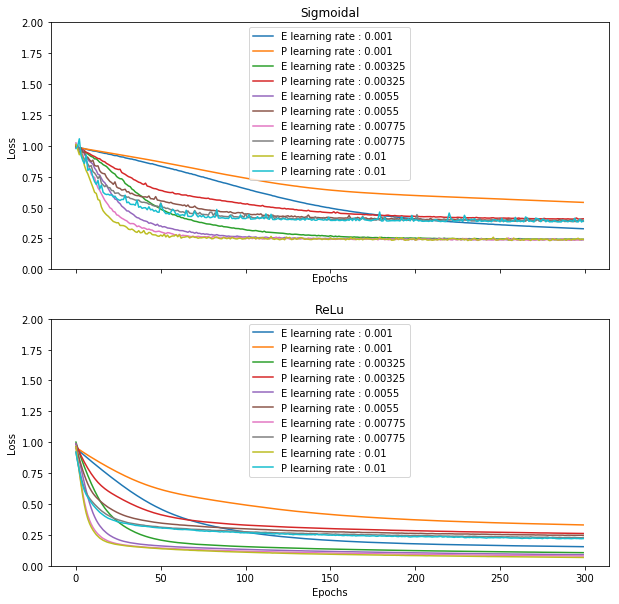

In [265]:
#n_lr = 20
#lear_rate = np.linspace(0,1,n_lr)
#lear_rate

#se fija una semilla para poder generar una comparación
seed = 18
np.random.seed(seed)

plt.close('all')

f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(10,10))

history = []
activation = ['sigmoid','relu']
n_lr = 5
lear_rate = np.linspace(0.001,0.01,n_lr)
lear_rate
for l_r in lear_rate:
    print("\n\n Modelos con lr de, {0}".format(l_r))
    for a in activation:
        sgd = SGD(lr = l_r)
        model = create_model(a,sgd)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], label = "E learning rate : "+str(l_r))
            axarr[0].plot(hisx.history['val_loss'], label = "P learning rate : "+str(l_r))
        else:
            axarr[1].plot(hisx.history['loss'], label = "E learning rate : "+str(l_r))
            axarr[1].plot(hisx.history['val_loss'], label = "P learning rate : "+str(l_r))
            
print("\n\n\nE: Conjunto de Entrenamiento, P: Conjunto de Prueba\n")            
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal')
axarr[1].set_title('ReLu')
axarr[0].set_ylim(0,2)
axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper center')
axarr[1].legend(loc='upper center')
plt.show()

** Comentarios **

- Como se emnciono anteriormente, para los valores de learning_rate presentados en el enunciado,  entregaban como resultados valores nan (not a number), desde el segundo valor que es l_r = 0.05263158. En el caso de l_r = 0, las variables loss y val_loss se mantienen con el mismo valor durante toda la ejecución.
Esto esta asociado al optimizador y la funcion de perdida, en general sgd con un learning rate muy alto se dispara (provocando los valores descritos) y con un valor de learning rate muy bajo no explora mucho.
Dado esto, es que se decidio probar con otros valores de learning rate, que son los descritos en el gráfico. Se consideraron 5 valores entre 0.001 y 0.01, que son: [ 0.001  ,  0.00325,  0.0055 ,  0.00775,  0.01   ]

--- Conjunto  de entrenamiento
*	Para ambas funciones de activación, el mejor resultado se obtiene con l_r = 0.01 seguido por l_r = 0.00775.
*	El en caso de Relu tiene un descenso más rapido que con Sigmoid. Para el primero los valores de mse llegan cercano a 0 en los primeros epochs, para el caso de Sigmoid no se logra llegando a los 50 epochs.
*	En el caso de Sigmoid, las oscilaciones son mínimas.

--- Conjunto de Prueba
*	Para sigmoid el mejor resultado se obtiene con l_r = 0.01, seguido de lr_ l_r = 0.00775. Sin embargo los valores estan por sobre los del conjutno de entrenamiento.
*	Las oscilaciones que se presentan en el caso de sigmoid para estos valores son mayores que las del conjunto de entrenamiento, pero siguen siendo pequeñas.  La mayor oscilación se presenta con L_r = 0.1
*	Para el caso de relu, los resultados son muy similares cuando l_r = 0.01, 0.00755 y 0.0055.



Un valor que se puede destacar, en ambos conjunto de prueba, es cuando l_r = 0.001, dado el comportamiento diferente que presentan ambas funciones. Para el caso de Sigmoid el conjunto de entrenamiento los valores de MSE estan cercano a los 0.25 al llegar a los 300 epochs, y para el caso del conjunto de prueba están cercano a los 0.75.
Siendo que en el caso de Relu en los 300 epochs los valores de MSE estan cercanos a 0.25 en el conjunto de entrenamiento, pero para el caso de prueba es cercano a 0.5, siendo mejor que algunos valores del conjunto de entrenamiento.

### e) Se entrenand los modelos de b) y c) usando progresive decay.



Modelos con lr de, 1e-06

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a6dcda588>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 24s 62ms/step - loss: 1.0566 - acc: 0.0000e+00 - val_loss: 0.9688 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 365us/step - loss: 0.9619 - acc: 0.0000e+00 - val_loss: 0.9426 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 579us/step - loss: 0.9385 - acc: 0.0000e+00 - val_loss: 0.9244 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 341us/step - loss: 0.9174 - acc: 0.0000e+00 - val_loss: 0.9157 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 673us/step - loss: 0.8675 - acc: 0.0000e+00 - val_loss: 0.9792 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 296us/step - loss: 0.8819 - acc: 0.0000e+00 - val_loss: 0.

Epoch 57/300
379/379 [==============================] - 0s 325us/step - loss: 0.2572 - acc: 0.0000e+00 - val_loss: 0.4510 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 345us/step - loss: 0.2618 - acc: 0.0000e+00 - val_loss: 0.4422 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 340us/step - loss: 0.2566 - acc: 0.0000e+00 - val_loss: 0.4566 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 333us/step - loss: 0.2619 - acc: 0.0000e+00 - val_loss: 0.4380 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 330us/step - loss: 0.2549 - acc: 0.0000e+00 - val_loss: 0.4409 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 335us/step - loss: 0.2561 - acc: 0.0000e+00 - val_loss: 0.4358 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 369us/step - loss: 0.2571 - acc: 0.0000e+00 - val_loss: 0.4334 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 334us/step - loss: 0.2475 - acc: 0.0000e+00 - val_loss: 0.4121 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 331us/step - loss: 0.2565 - acc: 0.0000e+00 - val_loss: 0.4093 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 341us/step - loss: 0.2473 - acc: 0.0000e+00 - val_loss: 0.4086 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 330us/step - loss: 0.2548 - acc: 0.0000e+00 - val_loss: 0.4027 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 325us/step - loss: 0.2548 - acc: 0.0000e+00 - val_loss: 0.4372 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 344us/step - loss: 0.2483 - acc: 0.0000e+00 - val_loss: 0.4035 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 335us/step - loss: 0.2390 - acc: 0.0000e+00 - val_loss: 0.4022 - val_a

379/379 [==============================] - 0s 316us/step - loss: 0.2504 - acc: 0.0000e+00 - val_loss: 0.4127 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 308us/step - loss: 0.2431 - acc: 0.0000e+00 - val_loss: 0.3948 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 318us/step - loss: 0.2425 - acc: 0.0000e+00 - val_loss: 0.3942 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 327us/step - loss: 0.2405 - acc: 0.0000e+00 - val_loss: 0.4143 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 321us/step - loss: 0.2491 - acc: 0.0000e+00 - val_loss: 0.4100 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 316us/step - loss: 0.2573 - acc: 0.0000e+00 - val_loss: 0.3927 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 317us/step - loss: 0.2436 - acc: 0.0000e+00 - val_loss: 0.3980 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 345us/step - loss: 0.2383 - acc: 0.0000e+00 - val_loss: 0.3989 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 340us/step - loss: 0.2461 - acc: 0.0000e+00 - val_loss: 0.3893 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 335us/step - loss: 0.2379 - acc: 0.0000e+00 - val_loss: 0.4032 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 330us/step - loss: 0.2398 - acc: 0.0000e+00 - val_loss: 0.3990 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 323us/step - loss: 0.2398 - acc: 0.0000e+00 - val_loss: 0.3878 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 351us/step - loss: 0.2402 - acc: 0.0000e+00 - val_loss: 0.3897 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 369us/step - loss: 0.2358 - acc: 0.0000e+00 - val_loss: 0.3959 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 320us/step - loss: 0.2365 - acc: 0.0000e+00 - val_loss: 0.3884 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 314us/step - loss: 0.2422 - acc: 0.0000e+00 - val_loss: 0.3859 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 316us/step - loss: 0.2383 - acc: 0.0000e+00 - val_loss: 0.3827 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 314us/step - loss: 0.2486 - acc: 0.0000e+00 - val_loss: 0.4224 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 307us/step - loss: 0.2351 - acc: 0.0000e+00 - val_loss: 0.3944 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 329us/step - loss: 0.2393 - acc: 0.0000e+00 - val_loss: 0.3933 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 338us/step - loss: 0.2391 - acc: 0.0000e+00 - val_loss: 0.3872 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a694dfe10>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 22s 57ms/step - loss: 0.9055 - acc: 0.0000e+00 - val_loss: 0.8778 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 318us/step - loss: 0.7912 - acc: 0.0000e+00 - val_loss: 0.7990 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 338us/step - loss: 0.6858 - acc: 0.0000e+00 - val_loss: 0.7279 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 358us/step - loss: 0.5879 - acc: 0.0000e+00 - val_loss: 0.6684 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 330us/step - loss: 0.5039 - acc: 0.0000e+00 - val_loss: 0.6221 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 324us/step - loss: 0.4373 - acc: 0.0000e+00 - val_loss: 0.5877 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 330us/step - loss: 0.1293 - acc: 0.0000e+00 - val_loss: 0.2915 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 318us/step - loss: 0.1280 - acc: 0.0000e+00 - val_loss: 0.2917 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 304us/step - loss: 0.1281 - acc: 0.0000e+00 - val_loss: 0.2889 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 305us/step - loss: 0.1268 - acc: 0.0000e+00 - val_loss: 0.2875 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 314us/step - loss: 0.1265 - acc: 0.0000e+00 - val_loss: 0.2852 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 310us/step - loss: 0.1261 - acc: 0.0000e+00 - val_loss: 0.2847 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 323us/step - loss: 0.1243 - acc: 0.0000e+00 - val_loss: 0.2834 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 324us/step - loss: 0.1016 - acc: 0.0000e+00 - val_loss: 0.2559 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 332us/step - loss: 0.1016 - acc: 0.0000e+00 - val_loss: 0.2551 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 359us/step - loss: 0.1014 - acc: 0.0000e+00 - val_loss: 0.2542 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 327us/step - loss: 0.1010 - acc: 0.0000e+00 - val_loss: 0.2573 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 335us/step - loss: 0.1007 - acc: 0.0000e+00 - val_loss: 0.2559 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 324us/step - loss: 0.1003 - acc: 0.0000e+00 - val_loss: 0.2563 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 329us/step - loss: 0.1000 - acc: 0.0000e+00 - val_loss: 0.2526 - val_a

379/379 [==============================] - 0s 313us/step - loss: 0.0877 - acc: 0.0000e+00 - val_loss: 0.2397 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 313us/step - loss: 0.0875 - acc: 0.0000e+00 - val_loss: 0.2413 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 320us/step - loss: 0.0867 - acc: 0.0000e+00 - val_loss: 0.2418 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 318us/step - loss: 0.0870 - acc: 0.0000e+00 - val_loss: 0.2400 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 307us/step - loss: 0.0868 - acc: 0.0000e+00 - val_loss: 0.2398 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 304us/step - loss: 0.0864 - acc: 0.0000e+00 - val_loss: 0.2417 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 318us/step - loss: 0.0865 - acc: 0.0000e+00 - val_loss: 0.2401 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 313us/step - loss: 0.0779 - acc: 0.0000e+00 - val_loss: 0.2313 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 334us/step - loss: 0.0779 - acc: 0.0000e+00 - val_loss: 0.2298 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 330us/step - loss: 0.0774 - acc: 0.0000e+00 - val_loss: 0.2315 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 328us/step - loss: 0.0772 - acc: 0.0000e+00 - val_loss: 0.2292 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 317us/step - loss: 0.0769 - acc: 0.0000e+00 - val_loss: 0.2308 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 313us/step - loss: 0.0770 - acc: 0.0000e+00 - val_loss: 0.2308 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 325us/step - loss: 0.0769 - acc: 0.0000e+00 - val_loss: 0.2295 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 324us/step - loss: 0.0697 - acc: 0.0000e+00 - val_loss: 0.2232 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 363us/step - loss: 0.0692 - acc: 0.0000e+00 - val_loss: 0.2251 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 358us/step - loss: 0.0694 - acc: 0.0000e+00 - val_loss: 0.2215 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 365us/step - loss: 0.0691 - acc: 0.0000e+00 - val_loss: 0.2191 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 361us/step - loss: 0.0690 - acc: 0.0000e+00 - val_loss: 0.2217 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 349us/step - loss: 0.0688 - acc: 0.0000e+00 - val_loss: 0.2228 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 328us/step - loss: 0.0687 - acc: 0.0000e+00 - val_loss: 0.2207 - val_acc: 0.0000e+00



Modelos con lr de, 4.641588833612782e-06

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a46c03c50>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 25s 65ms/step - loss: 1.0150 - acc: 0.0000e+00 - val_loss: 0.9835 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 325us/step - loss: 0.9607 - acc: 0.0000e+00 - val_loss: 0.9685 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 317us/step - loss: 0.9549 - acc: 0.0000e+00 - val_loss: 0.9767 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 324us/step - loss: 0.9342 - acc: 0.0000e+00 - val_loss: 0.9363 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 310us/step - loss: 0.8785 - acc: 0.0000e+00 - val_loss: 0.8871 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 312us/step - loss: 0.8773 - acc: 0.0000e+0

Epoch 57/300
379/379 [==============================] - 0s 514us/step - loss: 0.2609 - acc: 0.0000e+00 - val_loss: 0.4593 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 426us/step - loss: 0.2576 - acc: 0.0000e+00 - val_loss: 0.4387 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 584us/step - loss: 0.2598 - acc: 0.0000e+00 - val_loss: 0.4425 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 484us/step - loss: 0.2630 - acc: 0.0000e+00 - val_loss: 0.4366 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 418us/step - loss: 0.2579 - acc: 0.0000e+00 - val_loss: 0.4461 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 470us/step - loss: 0.2669 - acc: 0.0000e+00 - val_loss: 0.4395 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 469us/step - loss: 0.2536 - acc: 0.0000e+00 - val_loss: 0.4313 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 349us/step - loss: 0.2529 - acc: 0.0000e+00 - val_loss: 0.4154 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 367us/step - loss: 0.2440 - acc: 0.0000e+00 - val_loss: 0.4065 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 335us/step - loss: 0.2494 - acc: 0.0000e+00 - val_loss: 0.4027 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 358us/step - loss: 0.2481 - acc: 0.0000e+00 - val_loss: 0.4226 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 321us/step - loss: 0.2468 - acc: 0.0000e+00 - val_loss: 0.4010 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 356us/step - loss: 0.2461 - acc: 0.0000e+00 - val_loss: 0.4328 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 355us/step - loss: 0.2488 - acc: 0.0000e+00 - val_loss: 0.4003 - val_a

379/379 [==============================] - 0s 313us/step - loss: 0.2432 - acc: 0.0000e+00 - val_loss: 0.4129 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 321us/step - loss: 0.2495 - acc: 0.0000e+00 - val_loss: 0.3902 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 322us/step - loss: 0.2371 - acc: 0.0000e+00 - val_loss: 0.3972 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 347us/step - loss: 0.2475 - acc: 0.0000e+00 - val_loss: 0.3987 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 314us/step - loss: 0.2413 - acc: 0.0000e+00 - val_loss: 0.3964 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 319us/step - loss: 0.2388 - acc: 0.0000e+00 - val_loss: 0.3911 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 304us/step - loss: 0.2347 - acc: 0.0000e+00 - val_loss: 0.3932 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 352us/step - loss: 0.2389 - acc: 0.0000e+00 - val_loss: 0.4146 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 358us/step - loss: 0.2414 - acc: 0.0000e+00 - val_loss: 0.3945 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 375us/step - loss: 0.2411 - acc: 0.0000e+00 - val_loss: 0.3861 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 320us/step - loss: 0.2404 - acc: 0.0000e+00 - val_loss: 0.3911 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 374us/step - loss: 0.2405 - acc: 0.0000e+00 - val_loss: 0.4029 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 355us/step - loss: 0.2428 - acc: 0.0000e+00 - val_loss: 0.3893 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 324us/step - loss: 0.2399 - acc: 0.0000e+00 - val_loss: 0.3851 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 324us/step - loss: 0.2372 - acc: 0.0000e+00 - val_loss: 0.3820 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 385us/step - loss: 0.2359 - acc: 0.0000e+00 - val_loss: 0.3855 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 368us/step - loss: 0.2519 - acc: 0.0000e+00 - val_loss: 0.3850 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 363us/step - loss: 0.2352 - acc: 0.0000e+00 - val_loss: 0.3833 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 331us/step - loss: 0.2385 - acc: 0.0000e+00 - val_loss: 0.3827 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 341us/step - loss: 0.2325 - acc: 0.0000e+00 - val_loss: 0.3836 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 326us/step - loss: 0.2336 - acc: 0.0000e+00 - val_loss: 0.3957 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a6dc86518>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 25s 67ms/step - loss: 0.9604 - acc: 0.0000e+00 - val_loss: 0.9185 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 316us/step - loss: 0.8374 - acc: 0.0000e+00 - val_loss: 0.8336 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 358us/step - loss: 0.7296 - acc: 0.0000e+00 - val_loss: 0.7616 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 313us/step - loss: 0.6336 - acc: 0.0000e+00 - val_loss: 0.7010 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 345us/step - loss: 0.5501 - acc: 0.0000e+00 - val_loss: 0.6552 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 355us/step - loss: 0.4816 - acc: 0.0000e+00 - val_loss: 0.6198 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 330us/step - loss: 0.1304 - acc: 0.0000e+00 - val_loss: 0.2934 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 327us/step - loss: 0.1294 - acc: 0.0000e+00 - val_loss: 0.2917 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 314us/step - loss: 0.1286 - acc: 0.0000e+00 - val_loss: 0.2897 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 318us/step - loss: 0.1278 - acc: 0.0000e+00 - val_loss: 0.2889 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 331us/step - loss: 0.1273 - acc: 0.0000e+00 - val_loss: 0.2896 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 318us/step - loss: 0.1267 - acc: 0.0000e+00 - val_loss: 0.2873 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 313us/step - loss: 0.1252 - acc: 0.0000e+00 - val_loss: 0.2863 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 318us/step - loss: 0.1017 - acc: 0.0000e+00 - val_loss: 0.2557 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 318us/step - loss: 0.1015 - acc: 0.0000e+00 - val_loss: 0.2542 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 314us/step - loss: 0.1011 - acc: 0.0000e+00 - val_loss: 0.2526 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 311us/step - loss: 0.1008 - acc: 0.0000e+00 - val_loss: 0.2537 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 321us/step - loss: 0.1002 - acc: 0.0000e+00 - val_loss: 0.2541 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 317us/step - loss: 0.1001 - acc: 0.0000e+00 - val_loss: 0.2528 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 319us/step - loss: 0.0999 - acc: 0.0000e+00 - val_loss: 0.2522 - val_a

379/379 [==============================] - 0s 339us/step - loss: 0.0866 - acc: 0.0000e+00 - val_loss: 0.2376 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 353us/step - loss: 0.0861 - acc: 0.0000e+00 - val_loss: 0.2343 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 337us/step - loss: 0.0857 - acc: 0.0000e+00 - val_loss: 0.2351 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 319us/step - loss: 0.0857 - acc: 0.0000e+00 - val_loss: 0.2359 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 314us/step - loss: 0.0853 - acc: 0.0000e+00 - val_loss: 0.2359 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 306us/step - loss: 0.0854 - acc: 0.0000e+00 - val_loss: 0.2350 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 318us/step - loss: 0.0851 - acc: 0.0000e+00 - val_loss: 0.2358 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 606us/step - loss: 0.0758 - acc: 0.0000e+00 - val_loss: 0.2254 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 433us/step - loss: 0.0756 - acc: 0.0000e+00 - val_loss: 0.2258 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 526us/step - loss: 0.0758 - acc: 0.0000e+00 - val_loss: 0.2262 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 524us/step - loss: 0.0754 - acc: 0.0000e+00 - val_loss: 0.2255 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 563us/step - loss: 0.0751 - acc: 0.0000e+00 - val_loss: 0.2260 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 374us/step - loss: 0.0751 - acc: 0.0000e+00 - val_loss: 0.2270 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 364us/step - loss: 0.0748 - acc: 0.0000e+00 - val_loss: 0.2255 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 326us/step - loss: 0.0682 - acc: 0.0000e+00 - val_loss: 0.2187 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 333us/step - loss: 0.0684 - acc: 0.0000e+00 - val_loss: 0.2186 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 335us/step - loss: 0.0679 - acc: 0.0000e+00 - val_loss: 0.2198 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 330us/step - loss: 0.0676 - acc: 0.0000e+00 - val_loss: 0.2169 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 335us/step - loss: 0.0673 - acc: 0.0000e+00 - val_loss: 0.2190 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 326us/step - loss: 0.0674 - acc: 0.0000e+00 - val_loss: 0.2160 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 323us/step - loss: 0.0670 - acc: 0.0000e+00 - val_loss: 0.2195 - val_acc: 0.0000e+00



Modelos con lr de, 2.1544346900318823e-05

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a723ffe80>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 27s 70ms/step - loss: 1.0142 - acc: 0.0000e+00 - val_loss: 1.0637 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 350us/step - loss: 1.0023 - acc: 0.0000e+00 - val_loss: 0.9876 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 318us/step - loss: 0.9482 - acc: 0.0000e+00 - val_loss: 0.9433 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 333us/step - loss: 0.9684 - acc: 0.0000e+00 - val_loss: 0.9685 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 328us/step - loss: 0.9457 - acc: 0.0000e+00 - val_loss: 0.9115 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 329us/step - loss: 0.8585 - acc: 0.0000e+

379/379 [==============================] - 0s 351us/step - loss: 0.2651 - acc: 0.0000e+00 - val_loss: 0.4466 - val_acc: 0.0000e+00
Epoch 57/300
379/379 [==============================] - 0s 348us/step - loss: 0.2626 - acc: 0.0000e+00 - val_loss: 0.4499 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 354us/step - loss: 0.2670 - acc: 0.0000e+00 - val_loss: 0.4554 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 323us/step - loss: 0.2599 - acc: 0.0000e+00 - val_loss: 0.4420 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 347us/step - loss: 0.2581 - acc: 0.0000e+00 - val_loss: 0.4400 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 356us/step - loss: 0.2566 - acc: 0.0000e+00 - val_loss: 0.4372 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 349us/step - loss: 0.2597 - acc: 0.0000e+00 - val_loss: 0.4386 - val_acc: 0.0000e+00
Epoch

Epoch 113/300
379/379 [==============================] - 0s 316us/step - loss: 0.2575 - acc: 0.0000e+00 - val_loss: 0.4060 - val_acc: 0.0000e+00
Epoch 114/300
379/379 [==============================] - 0s 309us/step - loss: 0.2532 - acc: 0.0000e+00 - val_loss: 0.4229 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 311us/step - loss: 0.2452 - acc: 0.0000e+00 - val_loss: 0.4048 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 315us/step - loss: 0.2546 - acc: 0.0000e+00 - val_loss: 0.4045 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 321us/step - loss: 0.2493 - acc: 0.0000e+00 - val_loss: 0.4108 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 319us/step - loss: 0.2486 - acc: 0.0000e+00 - val_loss: 0.4035 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 309us/step - loss: 0.2534 - acc: 0.0000e+00 - val_loss: 0.4011 - val_a

379/379 [==============================] - 0s 320us/step - loss: 0.2418 - acc: 0.0000e+00 - val_loss: 0.3944 - val_acc: 0.0000e+00
Epoch 170/300
379/379 [==============================] - 0s 316us/step - loss: 0.2517 - acc: 0.0000e+00 - val_loss: 0.3985 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 304us/step - loss: 0.2460 - acc: 0.0000e+00 - val_loss: 0.4107 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 319us/step - loss: 0.2406 - acc: 0.0000e+00 - val_loss: 0.4125 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 313us/step - loss: 0.2559 - acc: 0.0000e+00 - val_loss: 0.3958 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 316us/step - loss: 0.2435 - acc: 0.0000e+00 - val_loss: 0.3944 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 317us/step - loss: 0.2501 - acc: 0.0000e+00 - val_loss: 0.4237 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 329us/step - loss: 0.2384 - acc: 0.0000e+00 - val_loss: 0.3913 - val_acc: 0.0000e+00
Epoch 226/300
379/379 [==============================] - 0s 361us/step - loss: 0.2411 - acc: 0.0000e+00 - val_loss: 0.4080 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 355us/step - loss: 0.2421 - acc: 0.0000e+00 - val_loss: 0.3910 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 357us/step - loss: 0.2383 - acc: 0.0000e+00 - val_loss: 0.3891 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 340us/step - loss: 0.2359 - acc: 0.0000e+00 - val_loss: 0.3872 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 322us/step - loss: 0.2421 - acc: 0.0000e+00 - val_loss: 0.4012 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 317us/step - loss: 0.2366 - acc: 0.0000e+00 - val_loss: 0.4000 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 325us/step - loss: 0.2416 - acc: 0.0000e+00 - val_loss: 0.3838 - val_acc: 0.0000e+00
Epoch 282/300
379/379 [==============================] - 0s 317us/step - loss: 0.2387 - acc: 0.0000e+00 - val_loss: 0.3837 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 350us/step - loss: 0.2363 - acc: 0.0000e+00 - val_loss: 0.3842 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 316us/step - loss: 0.2359 - acc: 0.0000e+00 - val_loss: 0.3853 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 319us/step - loss: 0.2385 - acc: 0.0000e+00 - val_loss: 0.3889 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 339us/step - loss: 0.2367 - acc: 0.0000e+00 - val_loss: 0.3996 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 322us/step - loss: 0.2337 - acc: 0.0000e+00 - val_loss: 0.3898 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7223ec88>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 22s 59ms/step - loss: 0.9641 - acc: 0.0000e+00 - val_loss: 0.9220 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 338us/step - loss: 0.8416 - acc: 0.0000e+00 - val_loss: 0.8347 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 344us/step - loss: 0.7287 - acc: 0.0000e+00 - val_loss: 0.7549 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 312us/step - loss: 0.6213 - acc: 0.0000e+00 - val_loss: 0.6852 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 319us/step - loss: 0.5266 - acc: 0.0000e+00 - val_loss: 0.6304 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 341us/step - loss: 0.4494 - acc: 0.0000e+00 - val_loss: 0.5893 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 321us/step - loss: 0.1323 - acc: 0.0000e+00 - val_loss: 0.2968 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 316us/step - loss: 0.1316 - acc: 0.0000e+00 - val_loss: 0.2959 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 324us/step - loss: 0.1309 - acc: 0.0000e+00 - val_loss: 0.2965 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 312us/step - loss: 0.1297 - acc: 0.0000e+00 - val_loss: 0.2939 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 313us/step - loss: 0.1297 - acc: 0.0000e+00 - val_loss: 0.2935 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 312us/step - loss: 0.1294 - acc: 0.0000e+00 - val_loss: 0.2905 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 310us/step - loss: 0.1283 - acc: 0.0000e+00 - val_loss: 0.2918 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 335us/step - loss: 0.1047 - acc: 0.0000e+00 - val_loss: 0.2618 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 316us/step - loss: 0.1049 - acc: 0.0000e+00 - val_loss: 0.2602 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 310us/step - loss: 0.1042 - acc: 0.0000e+00 - val_loss: 0.2586 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 320us/step - loss: 0.1030 - acc: 0.0000e+00 - val_loss: 0.2589 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 321us/step - loss: 0.1032 - acc: 0.0000e+00 - val_loss: 0.2583 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 310us/step - loss: 0.1033 - acc: 0.0000e+00 - val_loss: 0.2606 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 313us/step - loss: 0.1024 - acc: 0.0000e+00 - val_loss: 0.2601 - val_a

379/379 [==============================] - 0s 314us/step - loss: 0.0895 - acc: 0.0000e+00 - val_loss: 0.2431 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 311us/step - loss: 0.0887 - acc: 0.0000e+00 - val_loss: 0.2449 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 346us/step - loss: 0.0893 - acc: 0.0000e+00 - val_loss: 0.2451 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 315us/step - loss: 0.0888 - acc: 0.0000e+00 - val_loss: 0.2470 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 323us/step - loss: 0.0887 - acc: 0.0000e+00 - val_loss: 0.2450 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 322us/step - loss: 0.0882 - acc: 0.0000e+00 - val_loss: 0.2441 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 323us/step - loss: 0.0879 - acc: 0.0000e+00 - val_loss: 0.2456 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 317us/step - loss: 0.0789 - acc: 0.0000e+00 - val_loss: 0.2331 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 313us/step - loss: 0.0784 - acc: 0.0000e+00 - val_loss: 0.2319 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 319us/step - loss: 0.0782 - acc: 0.0000e+00 - val_loss: 0.2320 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 323us/step - loss: 0.0779 - acc: 0.0000e+00 - val_loss: 0.2331 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 316us/step - loss: 0.0779 - acc: 0.0000e+00 - val_loss: 0.2335 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 319us/step - loss: 0.0779 - acc: 0.0000e+00 - val_loss: 0.2327 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 323us/step - loss: 0.0777 - acc: 0.0000e+00 - val_loss: 0.2344 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 322us/step - loss: 0.0707 - acc: 0.0000e+00 - val_loss: 0.2228 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 312us/step - loss: 0.0704 - acc: 0.0000e+00 - val_loss: 0.2238 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 315us/step - loss: 0.0705 - acc: 0.0000e+00 - val_loss: 0.2215 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 330us/step - loss: 0.0706 - acc: 0.0000e+00 - val_loss: 0.2227 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 307us/step - loss: 0.0701 - acc: 0.0000e+00 - val_loss: 0.2233 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 322us/step - loss: 0.0697 - acc: 0.0000e+00 - val_loss: 0.2237 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 315us/step - loss: 0.0695 - acc: 0.0000e+00 - val_loss: 0.2234 - val_acc: 0.0000e+00



Modelos con lr de, 0.0001

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a72397d68>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 20s 53ms/step - loss: 1.0318 - acc: 0.0000e+00 - val_loss: 0.9796 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 353us/step - loss: 0.9634 - acc: 0.0000e+00 - val_loss: 1.0019 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 325us/step - loss: 0.9522 - acc: 0.0000e+00 - val_loss: 0.9305 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 313us/step - loss: 0.9230 - acc: 0.0000e+00 - val_loss: 0.9683 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 315us/step - loss: 0.9095 - acc: 0.0000e+00 - val_loss: 0.8858 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 320us/step - loss: 0.8441 - acc: 0.0000e+00 - val_loss: 0

Epoch 57/300
379/379 [==============================] - 0s 316us/step - loss: 0.2728 - acc: 0.0000e+00 - val_loss: 0.4512 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 321us/step - loss: 0.2685 - acc: 0.0000e+00 - val_loss: 0.4583 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 322us/step - loss: 0.2649 - acc: 0.0000e+00 - val_loss: 0.4449 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 324us/step - loss: 0.2621 - acc: 0.0000e+00 - val_loss: 0.4496 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 304us/step - loss: 0.2578 - acc: 0.0000e+00 - val_loss: 0.4485 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 365us/step - loss: 0.2690 - acc: 0.0000e+00 - val_loss: 0.4394 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 314us/step - loss: 0.2570 - acc: 0.0000e+00 - val_loss: 0.4374 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 318us/step - loss: 0.2460 - acc: 0.0000e+00 - val_loss: 0.4065 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 314us/step - loss: 0.2435 - acc: 0.0000e+00 - val_loss: 0.4294 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 314us/step - loss: 0.2490 - acc: 0.0000e+00 - val_loss: 0.4116 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 320us/step - loss: 0.2467 - acc: 0.0000e+00 - val_loss: 0.4328 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 322us/step - loss: 0.2496 - acc: 0.0000e+00 - val_loss: 0.4044 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 320us/step - loss: 0.2619 - acc: 0.0000e+00 - val_loss: 0.4121 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 328us/step - loss: 0.2516 - acc: 0.0000e+00 - val_loss: 0.4325 - val_a

379/379 [==============================] - 0s 324us/step - loss: 0.2409 - acc: 0.0000e+00 - val_loss: 0.4302 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 316us/step - loss: 0.2508 - acc: 0.0000e+00 - val_loss: 0.4017 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 305us/step - loss: 0.2401 - acc: 0.0000e+00 - val_loss: 0.3999 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 322us/step - loss: 0.2467 - acc: 0.0000e+00 - val_loss: 0.3972 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 312us/step - loss: 0.2419 - acc: 0.0000e+00 - val_loss: 0.3961 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 308us/step - loss: 0.2416 - acc: 0.0000e+00 - val_loss: 0.3966 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 333us/step - loss: 0.2438 - acc: 0.0000e+00 - val_loss: 0.3939 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 348us/step - loss: 0.2378 - acc: 0.0000e+00 - val_loss: 0.4079 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 321us/step - loss: 0.2448 - acc: 0.0000e+00 - val_loss: 0.3895 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 312us/step - loss: 0.2359 - acc: 0.0000e+00 - val_loss: 0.4069 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 315us/step - loss: 0.2490 - acc: 0.0000e+00 - val_loss: 0.3909 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 322us/step - loss: 0.2414 - acc: 0.0000e+00 - val_loss: 0.3979 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 308us/step - loss: 0.2477 - acc: 0.0000e+00 - val_loss: 0.3956 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 311us/step - loss: 0.2418 - acc: 0.0000e+00 - val_loss: 0.3933 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 313us/step - loss: 0.2393 - acc: 0.0000e+00 - val_loss: 0.3951 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 316us/step - loss: 0.2465 - acc: 0.0000e+00 - val_loss: 0.3854 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 320us/step - loss: 0.2407 - acc: 0.0000e+00 - val_loss: 0.3848 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 326us/step - loss: 0.2355 - acc: 0.0000e+00 - val_loss: 0.3846 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 310us/step - loss: 0.2346 - acc: 0.0000e+00 - val_loss: 0.3855 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 320us/step - loss: 0.2423 - acc: 0.0000e+00 - val_loss: 0.3971 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 320us/step - loss: 0.2447 - acc: 0.0000e+00 - val_loss: 0.3979 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a71605860>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 20s 54ms/step - loss: 0.9425 - acc: 0.0000e+00 - val_loss: 0.8978 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 332us/step - loss: 0.8137 - acc: 0.0000e+00 - val_loss: 0.8074 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 333us/step - loss: 0.6971 - acc: 0.0000e+00 - val_loss: 0.7280 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 331us/step - loss: 0.5917 - acc: 0.0000e+00 - val_loss: 0.6619 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 325us/step - loss: 0.5024 - acc: 0.0000e+00 - val_loss: 0.6112 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 322us/step - loss: 0.4303 - acc: 0.0000e+00 - val_loss: 0.5748 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 332us/step - loss: 0.1319 - acc: 0.0000e+00 - val_loss: 0.2948 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 313us/step - loss: 0.1311 - acc: 0.0000e+00 - val_loss: 0.2914 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 325us/step - loss: 0.1305 - acc: 0.0000e+00 - val_loss: 0.2925 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 309us/step - loss: 0.1293 - acc: 0.0000e+00 - val_loss: 0.2924 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 318us/step - loss: 0.1290 - acc: 0.0000e+00 - val_loss: 0.2919 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 325us/step - loss: 0.1289 - acc: 0.0000e+00 - val_loss: 0.2915 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 318us/step - loss: 0.1272 - acc: 0.0000e+00 - val_loss: 0.2905 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 321us/step - loss: 0.1068 - acc: 0.0000e+00 - val_loss: 0.2594 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 314us/step - loss: 0.1061 - acc: 0.0000e+00 - val_loss: 0.2610 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 337us/step - loss: 0.1064 - acc: 0.0000e+00 - val_loss: 0.2605 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 303us/step - loss: 0.1058 - acc: 0.0000e+00 - val_loss: 0.2606 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 353us/step - loss: 0.1052 - acc: 0.0000e+00 - val_loss: 0.2585 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 325us/step - loss: 0.1054 - acc: 0.0000e+00 - val_loss: 0.2595 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 337us/step - loss: 0.1050 - acc: 0.0000e+00 - val_loss: 0.2574 - val_a

379/379 [==============================] - 0s 306us/step - loss: 0.0933 - acc: 0.0000e+00 - val_loss: 0.2446 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 319us/step - loss: 0.0930 - acc: 0.0000e+00 - val_loss: 0.2432 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 321us/step - loss: 0.0926 - acc: 0.0000e+00 - val_loss: 0.2445 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 302us/step - loss: 0.0929 - acc: 0.0000e+00 - val_loss: 0.2454 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 327us/step - loss: 0.0929 - acc: 0.0000e+00 - val_loss: 0.2457 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 349us/step - loss: 0.0924 - acc: 0.0000e+00 - val_loss: 0.2440 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 317us/step - loss: 0.0921 - acc: 0.0000e+00 - val_loss: 0.2436 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 325us/step - loss: 0.0842 - acc: 0.0000e+00 - val_loss: 0.2329 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 316us/step - loss: 0.0844 - acc: 0.0000e+00 - val_loss: 0.2328 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 316us/step - loss: 0.0840 - acc: 0.0000e+00 - val_loss: 0.2326 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 320us/step - loss: 0.0840 - acc: 0.0000e+00 - val_loss: 0.2332 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 324us/step - loss: 0.0838 - acc: 0.0000e+00 - val_loss: 0.2305 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 309us/step - loss: 0.0838 - acc: 0.0000e+00 - val_loss: 0.2314 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 311us/step - loss: 0.0837 - acc: 0.0000e+00 - val_loss: 0.2326 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 319us/step - loss: 0.0775 - acc: 0.0000e+00 - val_loss: 0.2261 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 317us/step - loss: 0.0774 - acc: 0.0000e+00 - val_loss: 0.2249 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 359us/step - loss: 0.0771 - acc: 0.0000e+00 - val_loss: 0.2245 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 320us/step - loss: 0.0774 - acc: 0.0000e+00 - val_loss: 0.2237 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 326us/step - loss: 0.0774 - acc: 0.0000e+00 - val_loss: 0.2256 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 325us/step - loss: 0.0771 - acc: 0.0000e+00 - val_loss: 0.2243 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 352us/step - loss: 0.0769 - acc: 0.0000e+00 - val_loss: 0.2229 - val_acc: 0.0000e+00



Modelos con lr de, 0.00046415888336127773

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a6ce4e630>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 25s 65ms/step - loss: 1.0106 - acc: 0.0000e+00 - val_loss: 0.9779 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 330us/step - loss: 0.9719 - acc: 0.0000e+00 - val_loss: 0.9949 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 350us/step - loss: 0.9276 - acc: 0.0000e+00 - val_loss: 1.0572 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 354us/step - loss: 0.9468 - acc: 0.0000e+00 - val_loss: 0.9232 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 325us/step - loss: 0.8968 - acc: 0.0000e+00 - val_loss: 0.8833 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 326us/step - loss: 0.8424 - acc: 0.0000e+

379/379 [==============================] - 0s 330us/step - loss: 0.2667 - acc: 0.0000e+00 - val_loss: 0.4626 - val_acc: 0.0000e+00
Epoch 57/300
379/379 [==============================] - 0s 321us/step - loss: 0.2706 - acc: 0.0000e+00 - val_loss: 0.4728 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 331us/step - loss: 0.2739 - acc: 0.0000e+00 - val_loss: 0.4736 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 325us/step - loss: 0.2710 - acc: 0.0000e+00 - val_loss: 0.4730 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 337us/step - loss: 0.2792 - acc: 0.0000e+00 - val_loss: 0.4549 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 336us/step - loss: 0.2655 - acc: 0.0000e+00 - val_loss: 0.4602 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 322us/step - loss: 0.2740 - acc: 0.0000e+00 - val_loss: 0.4517 - val_acc: 0.0000e+00
Epoch

Epoch 113/300
379/379 [==============================] - 0s 369us/step - loss: 0.2467 - acc: 0.0000e+00 - val_loss: 0.4278 - val_acc: 0.0000e+00
Epoch 114/300
379/379 [==============================] - 0s 340us/step - loss: 0.2451 - acc: 0.0000e+00 - val_loss: 0.4137 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 313us/step - loss: 0.2466 - acc: 0.0000e+00 - val_loss: 0.4138 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 318us/step - loss: 0.2552 - acc: 0.0000e+00 - val_loss: 0.4194 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 345us/step - loss: 0.2449 - acc: 0.0000e+00 - val_loss: 0.4153 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 340us/step - loss: 0.2455 - acc: 0.0000e+00 - val_loss: 0.4117 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 336us/step - loss: 0.2471 - acc: 0.0000e+00 - val_loss: 0.4125 - val_a

379/379 [==============================] - 0s 319us/step - loss: 0.2451 - acc: 0.0000e+00 - val_loss: 0.4037 - val_acc: 0.0000e+00
Epoch 170/300
379/379 [==============================] - 0s 319us/step - loss: 0.2409 - acc: 0.0000e+00 - val_loss: 0.4083 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 319us/step - loss: 0.2433 - acc: 0.0000e+00 - val_loss: 0.4051 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 322us/step - loss: 0.2469 - acc: 0.0000e+00 - val_loss: 0.4024 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 322us/step - loss: 0.2428 - acc: 0.0000e+00 - val_loss: 0.4027 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 322us/step - loss: 0.2431 - acc: 0.0000e+00 - val_loss: 0.4010 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 342us/step - loss: 0.2417 - acc: 0.0000e+00 - val_loss: 0.4010 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 307us/step - loss: 0.2421 - acc: 0.0000e+00 - val_loss: 0.3963 - val_acc: 0.0000e+00
Epoch 226/300
379/379 [==============================] - 0s 320us/step - loss: 0.2395 - acc: 0.0000e+00 - val_loss: 0.3966 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 321us/step - loss: 0.2397 - acc: 0.0000e+00 - val_loss: 0.3971 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 323us/step - loss: 0.2389 - acc: 0.0000e+00 - val_loss: 0.3989 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 321us/step - loss: 0.2404 - acc: 0.0000e+00 - val_loss: 0.3967 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 332us/step - loss: 0.2385 - acc: 0.0000e+00 - val_loss: 0.4108 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 322us/step - loss: 0.2413 - acc: 0.0000e+00 - val_loss: 0.3997 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 318us/step - loss: 0.2364 - acc: 0.0000e+00 - val_loss: 0.3934 - val_acc: 0.0000e+00
Epoch 282/300
379/379 [==============================] - 0s 323us/step - loss: 0.2397 - acc: 0.0000e+00 - val_loss: 0.3925 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 307us/step - loss: 0.2377 - acc: 0.0000e+00 - val_loss: 0.3925 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 323us/step - loss: 0.2380 - acc: 0.0000e+00 - val_loss: 0.3939 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 325us/step - loss: 0.2377 - acc: 0.0000e+00 - val_loss: 0.3922 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 320us/step - loss: 0.2378 - acc: 0.0000e+00 - val_loss: 0.3922 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 326us/step - loss: 0.2375 - acc: 0.0000e+00 - val_loss: 0.3924 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a6d8334a8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 18s 47ms/step - loss: 0.9654 - acc: 0.0000e+00 - val_loss: 0.9205 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 320us/step - loss: 0.8587 - acc: 0.0000e+00 - val_loss: 0.8427 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 363us/step - loss: 0.7593 - acc: 0.0000e+00 - val_loss: 0.7714 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 321us/step - loss: 0.6615 - acc: 0.0000e+00 - val_loss: 0.7068 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 367us/step - loss: 0.5721 - acc: 0.0000e+00 - val_loss: 0.6537 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 357us/step - loss: 0.4962 - acc: 0.0000e+00 - val_loss: 0.6125 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 351us/step - loss: 0.1399 - acc: 0.0000e+00 - val_loss: 0.3095 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 381us/step - loss: 0.1392 - acc: 0.0000e+00 - val_loss: 0.3084 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 360us/step - loss: 0.1384 - acc: 0.0000e+00 - val_loss: 0.3062 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 326us/step - loss: 0.1376 - acc: 0.0000e+00 - val_loss: 0.3058 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 326us/step - loss: 0.1371 - acc: 0.0000e+00 - val_loss: 0.3044 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 326us/step - loss: 0.1363 - acc: 0.0000e+00 - val_loss: 0.3035 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 328us/step - loss: 0.1359 - acc: 0.0000e+00 - val_loss: 0.3029 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 323us/step - loss: 0.1148 - acc: 0.0000e+00 - val_loss: 0.2753 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 335us/step - loss: 0.1149 - acc: 0.0000e+00 - val_loss: 0.2753 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - ETA: 0s - loss: 0.1172 - acc: 0.0000e+0 - 0s 332us/step - loss: 0.1140 - acc: 0.0000e+00 - val_loss: 0.2736 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 333us/step - loss: 0.1135 - acc: 0.0000e+00 - val_loss: 0.2731 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 312us/step - loss: 0.1137 - acc: 0.0000e+00 - val_loss: 0.2724 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 309us/step - loss: 0.1133 - acc: 0.0000e+00 - val_loss: 0.2733 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 312us/step - loss: 0.1129 - 

379/379 [==============================] - 0s 355us/step - loss: 0.1019 - acc: 0.0000e+00 - val_loss: 0.2591 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 346us/step - loss: 0.1016 - acc: 0.0000e+00 - val_loss: 0.2588 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 343us/step - loss: 0.1017 - acc: 0.0000e+00 - val_loss: 0.2578 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 332us/step - loss: 0.1012 - acc: 0.0000e+00 - val_loss: 0.2577 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 353us/step - loss: 0.1008 - acc: 0.0000e+00 - val_loss: 0.2572 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 338us/step - loss: 0.1006 - acc: 0.0000e+00 - val_loss: 0.2573 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 349us/step - loss: 0.1008 - acc: 0.0000e+00 - val_loss: 0.2575 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 332us/step - loss: 0.0939 - acc: 0.0000e+00 - val_loss: 0.2500 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 320us/step - loss: 0.0937 - acc: 0.0000e+00 - val_loss: 0.2499 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 325us/step - loss: 0.0936 - acc: 0.0000e+00 - val_loss: 0.2505 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 335us/step - loss: 0.0935 - acc: 0.0000e+00 - val_loss: 0.2503 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 320us/step - loss: 0.0934 - acc: 0.0000e+00 - val_loss: 0.2492 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 337us/step - loss: 0.0933 - acc: 0.0000e+00 - val_loss: 0.2487 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 328us/step - loss: 0.0931 - acc: 0.0000e+00 - val_loss: 0.2490 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 320us/step - loss: 0.0880 - acc: 0.0000e+00 - val_loss: 0.2438 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 307us/step - loss: 0.0881 - acc: 0.0000e+00 - val_loss: 0.2439 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 318us/step - loss: 0.0878 - acc: 0.0000e+00 - val_loss: 0.2431 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 322us/step - loss: 0.0879 - acc: 0.0000e+00 - val_loss: 0.2429 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 318us/step - loss: 0.0878 - acc: 0.0000e+00 - val_loss: 0.2424 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 338us/step - loss: 0.0877 - acc: 0.0000e+00 - val_loss: 0.2426 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 345us/step - loss: 0.0875 - acc: 0.0000e+00 - val_loss: 0.2429 - val_acc: 0.0000e+00



Modelos con lr de, 0.002154434690031882

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a714725c0>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 23s 62ms/step - loss: 1.0185 - acc: 0.0000e+00 - val_loss: 0.9813 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 342us/step - loss: 0.9766 - acc: 0.0000e+00 - val_loss: 0.9640 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 348us/step - loss: 0.9488 - acc: 0.0000e+00 - val_loss: 1.1713 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 331us/step - loss: 0.9350 - acc: 0.0000e+00 - val_loss: 1.0330 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 332us/step - loss: 0.9017 - acc: 0.0000e+00 - val_loss: 0.9343 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 340us/step - loss: 0.8833 - acc: 0.0000e+00

Epoch 57/300
379/379 [==============================] - 0s 353us/step - loss: 0.3062 - acc: 0.0000e+00 - val_loss: 0.5214 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 317us/step - loss: 0.3050 - acc: 0.0000e+00 - val_loss: 0.5176 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 324us/step - loss: 0.3039 - acc: 0.0000e+00 - val_loss: 0.5181 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 314us/step - loss: 0.3010 - acc: 0.0000e+00 - val_loss: 0.5150 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 327us/step - loss: 0.3006 - acc: 0.0000e+00 - val_loss: 0.5116 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 372us/step - loss: 0.2995 - acc: 0.0000e+00 - val_loss: 0.5095 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 408us/step - loss: 0.2969 - acc: 0.0000e+00 - val_loss: 0.5097 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 331us/step - loss: 0.2611 - acc: 0.0000e+00 - val_loss: 0.4553 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 330us/step - loss: 0.2600 - acc: 0.0000e+00 - val_loss: 0.4546 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 324us/step - loss: 0.2610 - acc: 0.0000e+00 - val_loss: 0.4519 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 314us/step - loss: 0.2609 - acc: 0.0000e+00 - val_loss: 0.4520 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 323us/step - loss: 0.2605 - acc: 0.0000e+00 - val_loss: 0.4507 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 327us/step - loss: 0.2595 - acc: 0.0000e+00 - val_loss: 0.4514 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 321us/step - loss: 0.2600 - acc: 0.0000e+00 - val_loss: 0.4496 - val_a

379/379 [==============================] - 0s 323us/step - loss: 0.2511 - acc: 0.0000e+00 - val_loss: 0.4319 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 325us/step - loss: 0.2505 - acc: 0.0000e+00 - val_loss: 0.4317 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 326us/step - loss: 0.2504 - acc: 0.0000e+00 - val_loss: 0.4316 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 318us/step - loss: 0.2513 - acc: 0.0000e+00 - val_loss: 0.4313 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 328us/step - loss: 0.2506 - acc: 0.0000e+00 - val_loss: 0.4319 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 322us/step - loss: 0.2507 - acc: 0.0000e+00 - val_loss: 0.4307 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 326us/step - loss: 0.2500 - acc: 0.0000e+00 - val_loss: 0.4304 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 337us/step - loss: 0.2473 - acc: 0.0000e+00 - val_loss: 0.4226 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 388us/step - loss: 0.2473 - acc: 0.0000e+00 - val_loss: 0.4229 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 360us/step - loss: 0.2482 - acc: 0.0000e+00 - val_loss: 0.4221 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 364us/step - loss: 0.2474 - acc: 0.0000e+00 - val_loss: 0.4220 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 362us/step - loss: 0.2471 - acc: 0.0000e+00 - val_loss: 0.4218 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 372us/step - loss: 0.2471 - acc: 0.0000e+00 - val_loss: 0.4219 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 357us/step - loss: 0.2478 - acc: 0.0000e+00 - val_loss: 0.4216 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 348us/step - loss: 0.2452 - acc: 0.0000e+00 - val_loss: 0.4167 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 320us/step - loss: 0.2452 - acc: 0.0000e+00 - val_loss: 0.4169 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 323us/step - loss: 0.2453 - acc: 0.0000e+00 - val_loss: 0.4167 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 330us/step - loss: 0.2456 - acc: 0.0000e+00 - val_loss: 0.4167 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 364us/step - loss: 0.2454 - acc: 0.0000e+00 - val_loss: 0.4165 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 333us/step - loss: 0.2449 - acc: 0.0000e+00 - val_loss: 0.4166 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 325us/step - loss: 0.2453 - acc: 0.0000e+00 - val_loss: 0.4166 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a6d9e9048>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 20s 52ms/step - loss: 0.9618 - acc: 0.0000e+00 - val_loss: 0.9096 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 340us/step - loss: 0.8347 - acc: 0.0000e+00 - val_loss: 0.8225 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 343us/step - loss: 0.7245 - acc: 0.0000e+00 - val_loss: 0.7502 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 355us/step - loss: 0.6293 - acc: 0.0000e+00 - val_loss: 0.6917 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 335us/step - loss: 0.5479 - acc: 0.0000e+00 - val_loss: 0.6465 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 343us/step - loss: 0.4827 - acc: 0.0000e+00 - val_loss: 0.6113 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 356us/step - loss: 0.1511 - acc: 0.0000e+00 - val_loss: 0.3216 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 361us/step - loss: 0.1508 - acc: 0.0000e+00 - val_loss: 0.3206 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 361us/step - loss: 0.1502 - acc: 0.0000e+00 - val_loss: 0.3195 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 380us/step - loss: 0.1497 - acc: 0.0000e+00 - val_loss: 0.3186 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 362us/step - loss: 0.1492 - acc: 0.0000e+00 - val_loss: 0.3181 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 366us/step - loss: 0.1486 - acc: 0.0000e+00 - val_loss: 0.3170 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 347us/step - loss: 0.1483 - acc: 0.0000e+00 - val_loss: 0.3165 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 331us/step - loss: 0.1321 - acc: 0.0000e+00 - val_loss: 0.2932 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 321us/step - loss: 0.1319 - acc: 0.0000e+00 - val_loss: 0.2930 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 325us/step - loss: 0.1317 - acc: 0.0000e+00 - val_loss: 0.2928 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 336us/step - loss: 0.1316 - acc: 0.0000e+00 - val_loss: 0.2926 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 338us/step - loss: 0.1312 - acc: 0.0000e+00 - val_loss: 0.2924 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 332us/step - loss: 0.1311 - acc: 0.0000e+00 - val_loss: 0.2923 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 328us/step - loss: 0.1309 - acc: 0.0000e+00 - val_loss: 0.2919 - val_a

379/379 [==============================] - 0s 367us/step - loss: 0.1235 - acc: 0.0000e+00 - val_loss: 0.2819 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 344us/step - loss: 0.1234 - acc: 0.0000e+00 - val_loss: 0.2817 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 343us/step - loss: 0.1233 - acc: 0.0000e+00 - val_loss: 0.2814 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 336us/step - loss: 0.1231 - acc: 0.0000e+00 - val_loss: 0.2813 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 317us/step - loss: 0.1231 - acc: 0.0000e+00 - val_loss: 0.2812 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 317us/step - loss: 0.1229 - acc: 0.0000e+00 - val_loss: 0.2812 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 336us/step - loss: 0.1227 - acc: 0.0000e+00 - val_loss: 0.2811 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 336us/step - loss: 0.1183 - acc: 0.0000e+00 - val_loss: 0.2754 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 367us/step - loss: 0.1182 - acc: 0.0000e+00 - val_loss: 0.2751 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 355us/step - loss: 0.1182 - acc: 0.0000e+00 - val_loss: 0.2752 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 333us/step - loss: 0.1180 - acc: 0.0000e+00 - val_loss: 0.2751 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 353us/step - loss: 0.1180 - acc: 0.0000e+00 - val_loss: 0.2750 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 329us/step - loss: 0.1179 - acc: 0.0000e+00 - val_loss: 0.2750 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 350us/step - loss: 0.1179 - acc: 0.0000e+00 - val_loss: 0.2749 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 364us/step - loss: 0.1147 - acc: 0.0000e+00 - val_loss: 0.2713 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 356us/step - loss: 0.1145 - acc: 0.0000e+00 - val_loss: 0.2711 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 352us/step - loss: 0.1145 - acc: 0.0000e+00 - val_loss: 0.2710 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 326us/step - loss: 0.1144 - acc: 0.0000e+00 - val_loss: 0.2710 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 334us/step - loss: 0.1144 - acc: 0.0000e+00 - val_loss: 0.2709 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 336us/step - loss: 0.1143 - acc: 0.0000e+00 - val_loss: 0.2708 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 317us/step - loss: 0.1142 - acc: 0.0000e+00 - val_loss: 0.2707 - val_acc: 0.0000e+00



Modelos con lr de, 0.01

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a503d3e10>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 24s 64ms/step - loss: 1.0603 - acc: 0.0000e+00 - val_loss: 0.9799 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 319us/step - loss: 0.9728 - acc: 0.0000e+00 - val_loss: 0.9620 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 324us/step - loss: 0.9542 - acc: 0.0000e+00 - val_loss: 0.9450 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 311us/step - loss: 0.9315 - acc: 0.0000e+00 - val_loss: 0.9798 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 308us/step - loss: 0.9159 - acc: 0.0000e+00 - val_loss: 0.9174 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 324us/step - loss: 0.9000 - acc: 0.0000e+00 - val_loss: 0.9

379/379 [==============================] - 0s 325us/step - loss: 0.4634 - acc: 0.0000e+00 - val_loss: 0.6206 - val_acc: 0.0000e+00
Epoch 57/300
379/379 [==============================] - 0s 371us/step - loss: 0.4617 - acc: 0.0000e+00 - val_loss: 0.6193 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 369us/step - loss: 0.4577 - acc: 0.0000e+00 - val_loss: 0.6180 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 320us/step - loss: 0.4552 - acc: 0.0000e+00 - val_loss: 0.6169 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 356us/step - loss: 0.4529 - acc: 0.0000e+00 - val_loss: 0.6156 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 343us/step - loss: 0.4504 - acc: 0.0000e+00 - val_loss: 0.6148 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 317us/step - loss: 0.4498 - acc: 0.0000e+00 - val_loss: 0.6134 - val_acc: 0.0000e+00
Epoch

Epoch 113/300
379/379 [==============================] - 0s 315us/step - loss: 0.3865 - acc: 0.0000e+00 - val_loss: 0.5837 - val_acc: 0.0000e+00
Epoch 114/300
379/379 [==============================] - 0s 311us/step - loss: 0.3856 - acc: 0.0000e+00 - val_loss: 0.5833 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 316us/step - loss: 0.3849 - acc: 0.0000e+00 - val_loss: 0.5829 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 326us/step - loss: 0.3844 - acc: 0.0000e+00 - val_loss: 0.5825 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 314us/step - loss: 0.3838 - acc: 0.0000e+00 - val_loss: 0.5822 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 304us/step - loss: 0.3835 - acc: 0.0000e+00 - val_loss: 0.5818 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 307us/step - loss: 0.3821 - acc: 0.0000e+00 - val_loss: 0.5815 - val_a

379/379 [==============================] - 0s 314us/step - loss: 0.3589 - acc: 0.0000e+00 - val_loss: 0.5670 - val_acc: 0.0000e+00
Epoch 170/300
379/379 [==============================] - 0s 328us/step - loss: 0.3583 - acc: 0.0000e+00 - val_loss: 0.5667 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 312us/step - loss: 0.3578 - acc: 0.0000e+00 - val_loss: 0.5665 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 315us/step - loss: 0.3575 - acc: 0.0000e+00 - val_loss: 0.5662 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 321us/step - loss: 0.3576 - acc: 0.0000e+00 - val_loss: 0.5660 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 322us/step - loss: 0.3567 - acc: 0.0000e+00 - val_loss: 0.5657 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 332us/step - loss: 0.3569 - acc: 0.0000e+00 - val_loss: 0.5655 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 318us/step - loss: 0.3426 - acc: 0.0000e+00 - val_loss: 0.5547 - val_acc: 0.0000e+00
Epoch 226/300
379/379 [==============================] - 0s 316us/step - loss: 0.3424 - acc: 0.0000e+00 - val_loss: 0.5545 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 318us/step - loss: 0.3421 - acc: 0.0000e+00 - val_loss: 0.5543 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 327us/step - loss: 0.3419 - acc: 0.0000e+00 - val_loss: 0.5541 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 319us/step - loss: 0.3415 - acc: 0.0000e+00 - val_loss: 0.5539 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 327us/step - loss: 0.3417 - acc: 0.0000e+00 - val_loss: 0.5537 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 325us/step - loss: 0.3412 - acc: 0.0000e+00 - val_loss: 0.5535 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 330us/step - loss: 0.3316 - acc: 0.0000e+00 - val_loss: 0.5450 - val_acc: 0.0000e+00
Epoch 282/300
379/379 [==============================] - 0s 350us/step - loss: 0.3315 - acc: 0.0000e+00 - val_loss: 0.5448 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 377us/step - loss: 0.3313 - acc: 0.0000e+00 - val_loss: 0.5446 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 334us/step - loss: 0.3314 - acc: 0.0000e+00 - val_loss: 0.5445 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 344us/step - loss: 0.3310 - acc: 0.0000e+00 - val_loss: 0.5443 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 333us/step - loss: 0.3308 - acc: 0.0000e+00 - val_loss: 0.5442 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 332us/step - loss: 0.3308 - acc: 0.0000e+00 - val_loss: 0.5440 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a6d56dba8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 18s 47ms/step - loss: 0.9432 - acc: 0.0000e+00 - val_loss: 0.9073 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 343us/step - loss: 0.8396 - acc: 0.0000e+00 - val_loss: 0.8381 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 319us/step - loss: 0.7529 - acc: 0.0000e+00 - val_loss: 0.7813 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 320us/step - loss: 0.6787 - acc: 0.0000e+00 - val_loss: 0.7346 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 321us/step - loss: 0.6151 - acc: 0.0000e+00 - val_loss: 0.6970 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 323us/step - loss: 0.5619 - acc: 0.0000e+00 - val_loss: 0.6673 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 332us/step - loss: 0.1986 - acc: 0.0000e+00 - val_loss: 0.4089 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 325us/step - loss: 0.1979 - acc: 0.0000e+00 - val_loss: 0.4077 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 326us/step - loss: 0.1970 - acc: 0.0000e+00 - val_loss: 0.4065 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 326us/step - loss: 0.1961 - acc: 0.0000e+00 - val_loss: 0.4054 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 323us/step - loss: 0.1954 - acc: 0.0000e+00 - val_loss: 0.4042 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 329us/step - loss: 0.1947 - acc: 0.0000e+00 - val_loss: 0.4032 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 322us/step - loss: 0.1940 - acc: 0.0000e+00 - val_loss: 0.4022 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 337us/step - loss: 0.1748 - acc: 0.0000e+00 - val_loss: 0.3717 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 337us/step - loss: 0.1746 - acc: 0.0000e+00 - val_loss: 0.3714 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 325us/step - loss: 0.1744 - acc: 0.0000e+00 - val_loss: 0.3710 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 315us/step - loss: 0.1742 - acc: 0.0000e+00 - val_loss: 0.3707 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 320us/step - loss: 0.1740 - acc: 0.0000e+00 - val_loss: 0.3704 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 328us/step - loss: 0.1738 - acc: 0.0000e+00 - val_loss: 0.3700 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 331us/step - loss: 0.1736 - acc: 0.0000e+00 - val_loss: 0.3697 - val_a

379/379 [==============================] - 0s 337us/step - loss: 0.1668 - acc: 0.0000e+00 - val_loss: 0.3577 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 333us/step - loss: 0.1667 - acc: 0.0000e+00 - val_loss: 0.3575 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 384us/step - loss: 0.1666 - acc: 0.0000e+00 - val_loss: 0.3573 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 411us/step - loss: 0.1665 - acc: 0.0000e+00 - val_loss: 0.3572 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 411us/step - loss: 0.1664 - acc: 0.0000e+00 - val_loss: 0.3570 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 409us/step - loss: 0.1663 - acc: 0.0000e+00 - val_loss: 0.3568 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 372us/step - loss: 0.1662 - acc: 0.0000e+00 - val_loss: 0.3567 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 325us/step - loss: 0.1623 - acc: 0.0000e+00 - val_loss: 0.3500 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 340us/step - loss: 0.1622 - acc: 0.0000e+00 - val_loss: 0.3499 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 321us/step - loss: 0.1621 - acc: 0.0000e+00 - val_loss: 0.3498 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 336us/step - loss: 0.1621 - acc: 0.0000e+00 - val_loss: 0.3497 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 322us/step - loss: 0.1620 - acc: 0.0000e+00 - val_loss: 0.3496 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 327us/step - loss: 0.1619 - acc: 0.0000e+00 - val_loss: 0.3495 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 314us/step - loss: 0.1618 - acc: 0.0000e+00 - val_loss: 0.3494 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 374us/step - loss: 0.1591 - acc: 0.0000e+00 - val_loss: 0.3447 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 330us/step - loss: 0.1590 - acc: 0.0000e+00 - val_loss: 0.3446 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 314us/step - loss: 0.1590 - acc: 0.0000e+00 - val_loss: 0.3446 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 320us/step - loss: 0.1589 - acc: 0.0000e+00 - val_loss: 0.3445 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 310us/step - loss: 0.1589 - acc: 0.0000e+00 - val_loss: 0.3444 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 326us/step - loss: 0.1589 - acc: 0.0000e+00 - val_loss: 0.3443 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 329us/step - loss: 0.1588 - acc: 0.0000e+00 - val_loss: 0.3442 - val_acc: 0.0000e+00



Modelos con lr de, 0.046415888336127725

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a6e183d30>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 23s 61ms/step - loss: 0.9958 - acc: 0.0000e+00 - val_loss: 0.9763 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 342us/step - loss: 0.9687 - acc: 0.0000e+00 - val_loss: 0.9624 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 369us/step - loss: 0.9521 - acc: 0.0000e+00 - val_loss: 0.9533 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 331us/step - loss: 0.9458 - acc: 0.0000e+00 - val_loss: 0.9443 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 336us/step - loss: 0.9366 - acc: 0.0000e+00 - val_loss: 0.9385 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 333us/step - loss: 0.9247 - acc: 0.0000e+00

Epoch 57/300
379/379 [==============================] - 0s 340us/step - loss: 0.7871 - acc: 0.0000e+00 - val_loss: 0.8368 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 345us/step - loss: 0.7857 - acc: 0.0000e+00 - val_loss: 0.8360 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 320us/step - loss: 0.7842 - acc: 0.0000e+00 - val_loss: 0.8352 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 332us/step - loss: 0.7837 - acc: 0.0000e+00 - val_loss: 0.8344 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 337us/step - loss: 0.7820 - acc: 0.0000e+00 - val_loss: 0.8336 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 324us/step - loss: 0.7810 - acc: 0.0000e+00 - val_loss: 0.8329 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 358us/step - loss: 0.7806 - acc: 0.0000e+00 - val_loss: 0.8321 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 332us/step - loss: 0.7409 - acc: 0.0000e+00 - val_loss: 0.8041 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 346us/step - loss: 0.7402 - acc: 0.0000e+00 - val_loss: 0.8037 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 351us/step - loss: 0.7398 - acc: 0.0000e+00 - val_loss: 0.8033 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 334us/step - loss: 0.7393 - acc: 0.0000e+00 - val_loss: 0.8029 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 335us/step - loss: 0.7386 - acc: 0.0000e+00 - val_loss: 0.8025 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 325us/step - loss: 0.7384 - acc: 0.0000e+00 - val_loss: 0.8021 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 337us/step - loss: 0.7376 - acc: 0.0000e+00 - val_loss: 0.8017 - val_a

379/379 [==============================] - 0s 346us/step - loss: 0.7140 - acc: 0.0000e+00 - val_loss: 0.7853 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 335us/step - loss: 0.7136 - acc: 0.0000e+00 - val_loss: 0.7851 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 340us/step - loss: 0.7132 - acc: 0.0000e+00 - val_loss: 0.7848 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 345us/step - loss: 0.7130 - acc: 0.0000e+00 - val_loss: 0.7845 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 397us/step - loss: 0.7123 - acc: 0.0000e+00 - val_loss: 0.7842 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 361us/step - loss: 0.7121 - acc: 0.0000e+00 - val_loss: 0.7840 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 340us/step - loss: 0.7115 - acc: 0.0000e+00 - val_loss: 0.7837 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 338us/step - loss: 0.6949 - acc: 0.0000e+00 - val_loss: 0.7721 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 340us/step - loss: 0.6945 - acc: 0.0000e+00 - val_loss: 0.7719 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 335us/step - loss: 0.6942 - acc: 0.0000e+00 - val_loss: 0.7717 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 331us/step - loss: 0.6940 - acc: 0.0000e+00 - val_loss: 0.7715 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 320us/step - loss: 0.6936 - acc: 0.0000e+00 - val_loss: 0.7712 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 331us/step - loss: 0.6933 - acc: 0.0000e+00 - val_loss: 0.7710 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 332us/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.7708 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 320us/step - loss: 0.6800 - acc: 0.0000e+00 - val_loss: 0.7619 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 316us/step - loss: 0.6798 - acc: 0.0000e+00 - val_loss: 0.7617 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 322us/step - loss: 0.6796 - acc: 0.0000e+00 - val_loss: 0.7616 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 323us/step - loss: 0.6792 - acc: 0.0000e+00 - val_loss: 0.7614 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 353us/step - loss: 0.6791 - acc: 0.0000e+00 - val_loss: 0.7613 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 316us/step - loss: 0.6787 - acc: 0.0000e+00 - val_loss: 0.7611 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 319us/step - loss: 0.6786 - acc: 0.0000e+00 - val_loss: 0.7609 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a6e6cd828>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 20s 52ms/step - loss: 0.8968 - acc: 0.0000e+00 - val_loss: 0.8861 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 409us/step - loss: 0.8161 - acc: 0.0000e+00 - val_loss: 0.8404 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 364us/step - loss: 0.7612 - acc: 0.0000e+00 - val_loss: 0.8077 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 415us/step - loss: 0.7200 - acc: 0.0000e+00 - val_loss: 0.7821 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 333us/step - loss: 0.6865 - acc: 0.0000e+00 - val_loss: 0.7616 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 372us/step - loss: 0.6589 - acc: 0.0000e+00 - val_loss: 0.7447 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 1s 2ms/step - loss: 0.3852 - acc: 0.0000e+00 - val_loss: 0.5826 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 357us/step - loss: 0.3838 - acc: 0.0000e+00 - val_loss: 0.5817 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 371us/step - loss: 0.3824 - acc: 0.0000e+00 - val_loss: 0.5809 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 357us/step - loss: 0.3811 - acc: 0.0000e+00 - val_loss: 0.5801 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 337us/step - loss: 0.3798 - acc: 0.0000e+00 - val_loss: 0.5793 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 405us/step - loss: 0.3786 - acc: 0.0000e+00 - val_loss: 0.5785 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 350us/step - loss: 0.3773 - acc: 0.0000e+00 - val_loss: 0.5778 - val_acc: 0.000

Epoch 114/300
379/379 [==============================] - 0s 324us/step - loss: 0.3367 - acc: 0.0000e+00 - val_loss: 0.5515 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 337us/step - loss: 0.3362 - acc: 0.0000e+00 - val_loss: 0.5512 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 360us/step - loss: 0.3357 - acc: 0.0000e+00 - val_loss: 0.5508 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 357us/step - loss: 0.3352 - acc: 0.0000e+00 - val_loss: 0.5504 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 338us/step - loss: 0.3346 - acc: 0.0000e+00 - val_loss: 0.5501 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 349us/step - loss: 0.3342 - acc: 0.0000e+00 - val_loss: 0.5497 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 445us/step - loss: 0.3337 - acc: 0.0000e+00 - val_loss: 0.5494 - val_a

379/379 [==============================] - 0s 346us/step - loss: 0.3141 - acc: 0.0000e+00 - val_loss: 0.5352 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 345us/step - loss: 0.3138 - acc: 0.0000e+00 - val_loss: 0.5350 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 459us/step - loss: 0.3135 - acc: 0.0000e+00 - val_loss: 0.5347 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 362us/step - loss: 0.3132 - acc: 0.0000e+00 - val_loss: 0.5345 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 355us/step - loss: 0.3129 - acc: 0.0000e+00 - val_loss: 0.5343 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 358us/step - loss: 0.3126 - acc: 0.0000e+00 - val_loss: 0.5340 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 350us/step - loss: 0.3123 - acc: 0.0000e+00 - val_loss: 0.5338 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 332us/step - loss: 0.3000 - acc: 0.0000e+00 - val_loss: 0.5241 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 310us/step - loss: 0.2998 - acc: 0.0000e+00 - val_loss: 0.5240 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 324us/step - loss: 0.2996 - acc: 0.0000e+00 - val_loss: 0.5238 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 324us/step - loss: 0.2993 - acc: 0.0000e+00 - val_loss: 0.5236 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 318us/step - loss: 0.2991 - acc: 0.0000e+00 - val_loss: 0.5235 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 361us/step - loss: 0.2989 - acc: 0.0000e+00 - val_loss: 0.5233 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 323us/step - loss: 0.2987 - acc: 0.0000e+00 - val_loss: 0.5232 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 320us/step - loss: 0.2899 - acc: 0.0000e+00 - val_loss: 0.5158 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 317us/step - loss: 0.2898 - acc: 0.0000e+00 - val_loss: 0.5156 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 325us/step - loss: 0.2896 - acc: 0.0000e+00 - val_loss: 0.5155 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 325us/step - loss: 0.2895 - acc: 0.0000e+00 - val_loss: 0.5154 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 319us/step - loss: 0.2893 - acc: 0.0000e+00 - val_loss: 0.5152 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 322us/step - loss: 0.2892 - acc: 0.0000e+00 - val_loss: 0.5151 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 315us/step - loss: 0.2890 - acc: 0.0000e+00 - val_loss: 0.5150 - val_acc: 0.0000e+00



Modelos con lr de, 0.21544346900318823

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a6eeac5f8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 24s 64ms/step - loss: 0.9810 - acc: 0.0000e+00 - val_loss: 0.9777 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 332us/step - loss: 0.9734 - acc: 0.0000e+00 - val_loss: 0.9719 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 345us/step - loss: 0.9664 - acc: 0.0000e+00 - val_loss: 0.9693 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 352us/step - loss: 0.9620 - acc: 0.0000e+00 - val_loss: 0.9662 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 339us/step - loss: 0.9588 - acc: 0.0000e+00 - val_loss: 0.9645 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 330us/step - loss: 0.9567 - acc: 0.0000e+00 

Epoch 57/300
379/379 [==============================] - 0s 494us/step - loss: 0.9292 - acc: 0.0000e+00 - val_loss: 0.9432 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 438us/step - loss: 0.9290 - acc: 0.0000e+00 - val_loss: 0.9430 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 404us/step - loss: 0.9289 - acc: 0.0000e+00 - val_loss: 0.9429 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 873us/step - loss: 0.9285 - acc: 0.0000e+00 - val_loss: 0.9427 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 423us/step - loss: 0.9284 - acc: 0.0000e+00 - val_loss: 0.9426 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 403us/step - loss: 0.9283 - acc: 0.0000e+00 - val_loss: 0.9424 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 317us/step - loss: 0.9279 - acc: 0.0000e+00 - val_loss: 0.9423 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 323us/step - loss: 0.9210 - acc: 0.0000e+00 - val_loss: 0.9370 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 316us/step - loss: 0.9209 - acc: 0.0000e+00 - val_loss: 0.9369 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 363us/step - loss: 0.9209 - acc: 0.0000e+00 - val_loss: 0.9368 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 366us/step - loss: 0.9207 - acc: 0.0000e+00 - val_loss: 0.9367 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 323us/step - loss: 0.9206 - acc: 0.0000e+00 - val_loss: 0.9367 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 352us/step - loss: 0.9205 - acc: 0.0000e+00 - val_loss: 0.9366 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 329us/step - loss: 0.9204 - acc: 0.0000e+00 - val_loss: 0.9365 - val_a

379/379 [==============================] - 0s 329us/step - loss: 0.9163 - acc: 0.0000e+00 - val_loss: 0.9334 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 326us/step - loss: 0.9162 - acc: 0.0000e+00 - val_loss: 0.9333 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 298us/step - loss: 0.9162 - acc: 0.0000e+00 - val_loss: 0.9333 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 308us/step - loss: 0.9161 - acc: 0.0000e+00 - val_loss: 0.9332 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 377us/step - loss: 0.9161 - acc: 0.0000e+00 - val_loss: 0.9332 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 345us/step - loss: 0.9160 - acc: 0.0000e+00 - val_loss: 0.9331 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 332us/step - loss: 0.9159 - acc: 0.0000e+00 - val_loss: 0.9330 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 342us/step - loss: 0.9130 - acc: 0.0000e+00 - val_loss: 0.9308 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 352us/step - loss: 0.9129 - acc: 0.0000e+00 - val_loss: 0.9307 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 343us/step - loss: 0.9129 - acc: 0.0000e+00 - val_loss: 0.9307 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 351us/step - loss: 0.9128 - acc: 0.0000e+00 - val_loss: 0.9307 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 676us/step - loss: 0.9127 - acc: 0.0000e+00 - val_loss: 0.9306 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 590us/step - loss: 0.9127 - acc: 0.0000e+00 - val_loss: 0.9306 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 765us/step - loss: 0.9127 - acc: 0.0000e+00 - val_loss: 0.9305 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 333us/step - loss: 0.9103 - acc: 0.0000e+00 - val_loss: 0.9288 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 336us/step - loss: 0.9103 - acc: 0.0000e+00 - val_loss: 0.9287 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 323us/step - loss: 0.9102 - acc: 0.0000e+00 - val_loss: 0.9287 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 316us/step - loss: 0.9102 - acc: 0.0000e+00 - val_loss: 0.9287 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 303us/step - loss: 0.9102 - acc: 0.0000e+00 - val_loss: 0.9286 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 328us/step - loss: 0.9101 - acc: 0.0000e+00 - val_loss: 0.9286 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 328us/step - loss: 0.9101 - acc: 0.0000e+00 - val_loss: 0.9286 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a70de9400>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 24s 62ms/step - loss: 0.9710 - acc: 0.0000e+00 - val_loss: 0.9529 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 311us/step - loss: 0.9266 - acc: 0.0000e+00 - val_loss: 0.9324 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 317us/step - loss: 0.9050 - acc: 0.0000e+00 - val_loss: 0.9199 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 320us/step - loss: 0.8909 - acc: 0.0000e+00 - val_loss: 0.9108 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 324us/step - loss: 0.8802 - acc: 0.0000e+00 - val_loss: 0.9037 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 307us/step - loss: 0.8718 - acc: 0.0000e+00 - val_loss: 0.8979 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 359us/step - loss: 0.7718 - acc: 0.0000e+00 - val_loss: 0.8262 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 325us/step - loss: 0.7711 - acc: 0.0000e+00 - val_loss: 0.8257 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 333us/step - loss: 0.7704 - acc: 0.0000e+00 - val_loss: 0.8251 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 323us/step - loss: 0.7696 - acc: 0.0000e+00 - val_loss: 0.8246 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 326us/step - loss: 0.7689 - acc: 0.0000e+00 - val_loss: 0.8241 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 333us/step - loss: 0.7682 - acc: 0.0000e+00 - val_loss: 0.8236 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 314us/step - loss: 0.7675 - acc: 0.0000e+00 - val_loss: 0.8231 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 324us/step - loss: 0.7422 - acc: 0.0000e+00 - val_loss: 0.8049 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 315us/step - loss: 0.7419 - acc: 0.0000e+00 - val_loss: 0.8046 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 317us/step - loss: 0.7415 - acc: 0.0000e+00 - val_loss: 0.8044 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 318us/step - loss: 0.7411 - acc: 0.0000e+00 - val_loss: 0.8041 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 334us/step - loss: 0.7408 - acc: 0.0000e+00 - val_loss: 0.8038 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 525us/step - loss: 0.7404 - acc: 0.0000e+00 - val_loss: 0.8036 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 494us/step - loss: 0.7401 - acc: 0.0000e+00 - val_loss: 0.8033 - val_a

379/379 [==============================] - 0s 313us/step - loss: 0.7253 - acc: 0.0000e+00 - val_loss: 0.7928 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 325us/step - loss: 0.7251 - acc: 0.0000e+00 - val_loss: 0.7927 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 319us/step - loss: 0.7249 - acc: 0.0000e+00 - val_loss: 0.7925 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 374us/step - loss: 0.7246 - acc: 0.0000e+00 - val_loss: 0.7923 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 330us/step - loss: 0.7244 - acc: 0.0000e+00 - val_loss: 0.7921 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 341us/step - loss: 0.7241 - acc: 0.0000e+00 - val_loss: 0.7920 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 333us/step - loss: 0.7239 - acc: 0.0000e+00 - val_loss: 0.7918 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 347us/step - loss: 0.7134 - acc: 0.0000e+00 - val_loss: 0.7843 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 332us/step - loss: 0.7132 - acc: 0.0000e+00 - val_loss: 0.7842 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 346us/step - loss: 0.7130 - acc: 0.0000e+00 - val_loss: 0.7840 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 348us/step - loss: 0.7128 - acc: 0.0000e+00 - val_loss: 0.7839 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 318us/step - loss: 0.7126 - acc: 0.0000e+00 - val_loss: 0.7838 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 334us/step - loss: 0.7125 - acc: 0.0000e+00 - val_loss: 0.7837 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 324us/step - loss: 0.7123 - acc: 0.0000e+00 - val_loss: 0.7835 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 370us/step - loss: 0.7042 - acc: 0.0000e+00 - val_loss: 0.7778 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 333us/step - loss: 0.7040 - acc: 0.0000e+00 - val_loss: 0.7777 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 351us/step - loss: 0.7039 - acc: 0.0000e+00 - val_loss: 0.7776 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 653us/step - loss: 0.7037 - acc: 0.0000e+00 - val_loss: 0.7774 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 428us/step - loss: 0.7036 - acc: 0.0000e+00 - val_loss: 0.7773 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 495us/step - loss: 0.7034 - acc: 0.0000e+00 - val_loss: 0.7772 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 359us/step - loss: 0.7033 - acc: 0.0000e+00 - val_loss: 0.7771 - val_acc: 0.0000e+00



Modelos con lr de, 1.0

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a70efc240>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 27s 72ms/step - loss: 1.0343 - acc: 0.0000e+00 - val_loss: 0.9834 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 357us/step - loss: 0.9783 - acc: 0.0000e+00 - val_loss: 0.9822 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 390us/step - loss: 0.9767 - acc: 0.0000e+00 - val_loss: 0.9816 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 369us/step - loss: 0.9769 - acc: 0.0000e+00 - val_loss: 0.9811 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 347us/step - loss: 0.9751 - acc: 0.0000e+00 - val_loss: 0.9807 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 323us/step - loss: 0.9751 - acc: 0.0000e+00 - val_loss: 0.98

Epoch 57/300
379/379 [==============================] - 0s 305us/step - loss: 0.9694 - acc: 0.0000e+00 - val_loss: 0.9765 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 313us/step - loss: 0.9694 - acc: 0.0000e+00 - val_loss: 0.9765 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 306us/step - loss: 0.9694 - acc: 0.0000e+00 - val_loss: 0.9764 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 312us/step - loss: 0.9693 - acc: 0.0000e+00 - val_loss: 0.9764 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 310us/step - loss: 0.9693 - acc: 0.0000e+00 - val_loss: 0.9764 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 326us/step - loss: 0.9693 - acc: 0.0000e+00 - val_loss: 0.9764 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 306us/step - loss: 0.9692 - acc: 0.0000e+00 - val_loss: 0.9763 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 311us/step - loss: 0.9679 - acc: 0.0000e+00 - val_loss: 0.9753 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 314us/step - loss: 0.9679 - acc: 0.0000e+00 - val_loss: 0.9753 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 325us/step - loss: 0.9678 - acc: 0.0000e+00 - val_loss: 0.9753 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 331us/step - loss: 0.9678 - acc: 0.0000e+00 - val_loss: 0.9753 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 335us/step - loss: 0.9678 - acc: 0.0000e+00 - val_loss: 0.9753 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 312us/step - loss: 0.9678 - acc: 0.0000e+00 - val_loss: 0.9752 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 318us/step - loss: 0.9678 - acc: 0.0000e+00 - val_loss: 0.9752 - val_a

379/379 [==============================] - 0s 316us/step - loss: 0.9670 - acc: 0.0000e+00 - val_loss: 0.9746 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 309us/step - loss: 0.9670 - acc: 0.0000e+00 - val_loss: 0.9746 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 310us/step - loss: 0.9670 - acc: 0.0000e+00 - val_loss: 0.9746 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 316us/step - loss: 0.9670 - acc: 0.0000e+00 - val_loss: 0.9746 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 318us/step - loss: 0.9669 - acc: 0.0000e+00 - val_loss: 0.9746 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 310us/step - loss: 0.9669 - acc: 0.0000e+00 - val_loss: 0.9746 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 302us/step - loss: 0.9669 - acc: 0.0000e+00 - val_loss: 0.9746 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 362us/step - loss: 0.9664 - acc: 0.0000e+00 - val_loss: 0.9741 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 352us/step - loss: 0.9663 - acc: 0.0000e+00 - val_loss: 0.9741 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 350us/step - loss: 0.9663 - acc: 0.0000e+00 - val_loss: 0.9741 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 360us/step - loss: 0.9663 - acc: 0.0000e+00 - val_loss: 0.9741 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 328us/step - loss: 0.9663 - acc: 0.0000e+00 - val_loss: 0.9741 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 337us/step - loss: 0.9663 - acc: 0.0000e+00 - val_loss: 0.9741 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 331us/step - loss: 0.9663 - acc: 0.0000e+00 - val_loss: 0.9741 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 311us/step - loss: 0.9659 - acc: 0.0000e+00 - val_loss: 0.9738 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 324us/step - loss: 0.9659 - acc: 0.0000e+00 - val_loss: 0.9738 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 325us/step - loss: 0.9659 - acc: 0.0000e+00 - val_loss: 0.9738 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 319us/step - loss: 0.9658 - acc: 0.0000e+00 - val_loss: 0.9737 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 312us/step - loss: 0.9658 - acc: 0.0000e+00 - val_loss: 0.9737 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 318us/step - loss: 0.9658 - acc: 0.0000e+00 - val_loss: 0.9737 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 322us/step - loss: 0.9658 - acc: 0.0000e+00 - val_loss: 0.9737 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7102bfd0>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 24s 64ms/step - loss: 0.9528 - acc: 0.0000e+00 - val_loss: 0.9544 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 338us/step - loss: 0.9370 - acc: 0.0000e+00 - val_loss: 0.9487 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 326us/step - loss: 0.9313 - acc: 0.0000e+00 - val_loss: 0.9453 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 313us/step - loss: 0.9276 - acc: 0.0000e+00 - val_loss: 0.9430 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 328us/step - loss: 0.9249 - acc: 0.0000e+00 - val_loss: 0.9411 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 335us/step - loss: 0.9227 - acc: 0.0000e+00 - val_loss: 0.9396 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 325us/step - loss: 0.8982 - acc: 0.0000e+00 - val_loss: 0.9212 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 329us/step - loss: 0.8980 - acc: 0.0000e+00 - val_loss: 0.9211 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 326us/step - loss: 0.8978 - acc: 0.0000e+00 - val_loss: 0.9209 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 330us/step - loss: 0.8976 - acc: 0.0000e+00 - val_loss: 0.9208 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 332us/step - loss: 0.8975 - acc: 0.0000e+00 - val_loss: 0.9207 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 336us/step - loss: 0.8973 - acc: 0.0000e+00 - val_loss: 0.9205 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 321us/step - loss: 0.8971 - acc: 0.0000e+00 - val_loss: 0.9204 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 327us/step - loss: 0.8910 - acc: 0.0000e+00 - val_loss: 0.9156 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 328us/step - loss: 0.8909 - acc: 0.0000e+00 - val_loss: 0.9156 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 351us/step - loss: 0.8908 - acc: 0.0000e+00 - val_loss: 0.9155 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 318us/step - loss: 0.8907 - acc: 0.0000e+00 - val_loss: 0.9154 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 350us/step - loss: 0.8906 - acc: 0.0000e+00 - val_loss: 0.9154 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 343us/step - loss: 0.8905 - acc: 0.0000e+00 - val_loss: 0.9153 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 317us/step - loss: 0.8904 - acc: 0.0000e+00 - val_loss: 0.9152 - val_a

379/379 [==============================] - 0s 852us/step - loss: 0.8868 - acc: 0.0000e+00 - val_loss: 0.9124 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 389us/step - loss: 0.8868 - acc: 0.0000e+00 - val_loss: 0.9124 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 282us/step - loss: 0.8867 - acc: 0.0000e+00 - val_loss: 0.9124 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 269us/step - loss: 0.8866 - acc: 0.0000e+00 - val_loss: 0.9123 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 357us/step - loss: 0.8866 - acc: 0.0000e+00 - val_loss: 0.9123 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 334us/step - loss: 0.8865 - acc: 0.0000e+00 - val_loss: 0.9122 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 348us/step - loss: 0.8865 - acc: 0.0000e+00 - val_loss: 0.9122 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 332us/step - loss: 0.8839 - acc: 0.0000e+00 - val_loss: 0.9102 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 335us/step - loss: 0.8839 - acc: 0.0000e+00 - val_loss: 0.9102 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 349us/step - loss: 0.8838 - acc: 0.0000e+00 - val_loss: 0.9101 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 345us/step - loss: 0.8838 - acc: 0.0000e+00 - val_loss: 0.9101 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 343us/step - loss: 0.8837 - acc: 0.0000e+00 - val_loss: 0.9100 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 343us/step - loss: 0.8837 - acc: 0.0000e+00 - val_loss: 0.9100 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 327us/step - loss: 0.8836 - acc: 0.0000e+00 - val_loss: 0.9100 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 337us/step - loss: 0.8816 - acc: 0.0000e+00 - val_loss: 0.9084 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 320us/step - loss: 0.8816 - acc: 0.0000e+00 - val_loss: 0.9084 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 339us/step - loss: 0.8816 - acc: 0.0000e+00 - val_loss: 0.9084 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 332us/step - loss: 0.8815 - acc: 0.0000e+00 - val_loss: 0.9084 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 346us/step - loss: 0.8815 - acc: 0.0000e+00 - val_loss: 0.9083 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 473us/step - loss: 0.8814 - acc: 0.0000e+00 - val_loss: 0.9083 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 486us/step - loss: 0.8814 - acc: 0.0000e+00 - val_loss: 0.9083 - val_acc: 0.0000e+00

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal ')

Text(0.5,1,'ReLu ')

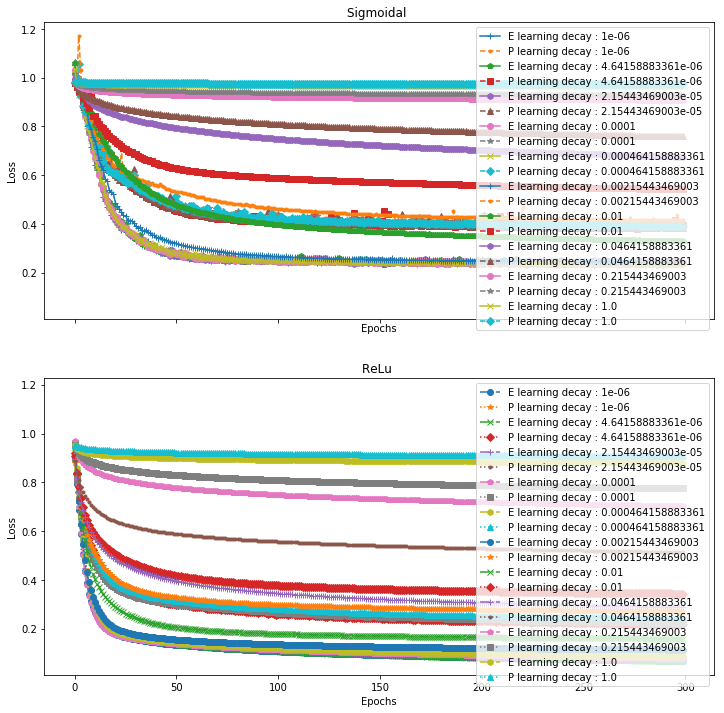

In [267]:
#se fija una semilla para poder generar una comparación
seed = 18
np.random.seed(seed)

plt.close('all')

f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

lines = ["-","--","-.",":"]
linecycler = cycle(lines)

m = ['+','.','o','*','p','s','x','D','h','^']
mcycler = cycle(m)

history = []
activation = ['sigmoid','relu']
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
#sgd = SGD(lr=0.2, decay=1e-6)



for l_r_d in lear_decay:
    print("\n\nModelos con lr de, {0}".format(l_r_d))
    for a in activation:
        sgd = SGD(lr = 0.01, decay = l_r_d) ## valor de decay para LR
        model = create_model(a,sgd)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], marker = next(mcycler),linestyle = next(linecycler),label = "E learning decay : "+str(l_r_d))
            axarr[0].plot(hisx.history['val_loss'], marker = next(mcycler),linestyle = next(linecycler), label = "P learning decay : "+str(l_r_d))
        else:
            axarr[1].plot(hisx.history['loss'], marker = next(mcycler),linestyle = next(linecycler),label = "E learning decay : "+str(l_r_d))
            axarr[1].plot(hisx.history['val_loss'], marker = next(mcycler),linestyle = next(linecycler), label = "P learning decay : "+str(l_r_d))

axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal ')
axarr[1].set_title('ReLu ')
#axarr[0].set_ylim(0,2)
#axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper right')
axarr[1].legend(loc='upper right')
plt.show()

** Gráficos** Dado la dificultad en  la visulización de los datos, es que se trabaja con un conjunto menor de LR decay. 



Modelos con lr de, 1e-06

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a712429b0>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 34s 90ms/step - loss: 1.0566 - acc: 0.0000e+00 - val_loss: 0.9687 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 329us/step - loss: 0.9619 - acc: 0.0000e+00 - val_loss: 0.9426 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 334us/step - loss: 0.9385 - acc: 0.0000e+00 - val_loss: 0.9244 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 349us/step - loss: 0.9174 - acc: 0.0000e+00 - val_loss: 0.9157 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 372us/step - loss: 0.8676 - acc: 0.0000e+00 - val_loss: 0.9793 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 366us/step - loss: 0.8820 - acc: 0.0000e+00 - val_loss: 0.

Epoch 57/300
379/379 [==============================] - 0s 354us/step - loss: 0.2572 - acc: 0.0000e+00 - val_loss: 0.4510 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 357us/step - loss: 0.2618 - acc: 0.0000e+00 - val_loss: 0.4422 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 371us/step - loss: 0.2566 - acc: 0.0000e+00 - val_loss: 0.4566 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 363us/step - loss: 0.2619 - acc: 0.0000e+00 - val_loss: 0.4380 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 357us/step - loss: 0.2549 - acc: 0.0000e+00 - val_loss: 0.4409 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 344us/step - loss: 0.2561 - acc: 0.0000e+00 - val_loss: 0.4358 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 362us/step - loss: 0.2571 - acc: 0.0000e+00 - val_loss: 0.4334 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 367us/step - loss: 0.2475 - acc: 0.0000e+00 - val_loss: 0.4121 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 473us/step - loss: 0.2565 - acc: 0.0000e+00 - val_loss: 0.4093 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 360us/step - loss: 0.2473 - acc: 0.0000e+00 - val_loss: 0.4086 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 368us/step - loss: 0.2548 - acc: 0.0000e+00 - val_loss: 0.4027 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 381us/step - loss: 0.2548 - acc: 0.0000e+00 - val_loss: 0.4372 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 381us/step - loss: 0.2483 - acc: 0.0000e+00 - val_loss: 0.4035 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 373us/step - loss: 0.2390 - acc: 0.0000e+00 - val_loss: 0.4022 - val_a

379/379 [==============================] - 0s 338us/step - loss: 0.2504 - acc: 0.0000e+00 - val_loss: 0.4127 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 357us/step - loss: 0.2431 - acc: 0.0000e+00 - val_loss: 0.3948 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 350us/step - loss: 0.2425 - acc: 0.0000e+00 - val_loss: 0.3942 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 366us/step - loss: 0.2405 - acc: 0.0000e+00 - val_loss: 0.4143 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 369us/step - loss: 0.2491 - acc: 0.0000e+00 - val_loss: 0.4100 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 360us/step - loss: 0.2573 - acc: 0.0000e+00 - val_loss: 0.3927 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 360us/step - loss: 0.2436 - acc: 0.0000e+00 - val_loss: 0.3980 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 316us/step - loss: 0.2383 - acc: 0.0000e+00 - val_loss: 0.3989 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 337us/step - loss: 0.2461 - acc: 0.0000e+00 - val_loss: 0.3893 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 316us/step - loss: 0.2379 - acc: 0.0000e+00 - val_loss: 0.4032 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 320us/step - loss: 0.2398 - acc: 0.0000e+00 - val_loss: 0.3990 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 339us/step - loss: 0.2398 - acc: 0.0000e+00 - val_loss: 0.3878 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 334us/step - loss: 0.2402 - acc: 0.0000e+00 - val_loss: 0.3897 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 323us/step - loss: 0.2358 - acc: 0.0000e+00 - val_loss: 0.3959 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 321us/step - loss: 0.2365 - acc: 0.0000e+00 - val_loss: 0.3884 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 330us/step - loss: 0.2422 - acc: 0.0000e+00 - val_loss: 0.3859 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 328us/step - loss: 0.2383 - acc: 0.0000e+00 - val_loss: 0.3827 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 340us/step - loss: 0.2486 - acc: 0.0000e+00 - val_loss: 0.4224 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 322us/step - loss: 0.2351 - acc: 0.0000e+00 - val_loss: 0.3944 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 316us/step - loss: 0.2393 - acc: 0.0000e+00 - val_loss: 0.3933 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 324us/step - loss: 0.2391 - acc: 0.0000e+00 - val_loss: 0.3872 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7219e908>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 25s 67ms/step - loss: 0.9055 - acc: 0.0000e+00 - val_loss: 0.8778 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 377us/step - loss: 0.7912 - acc: 0.0000e+00 - val_loss: 0.7990 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 366us/step - loss: 0.6856 - acc: 0.0000e+00 - val_loss: 0.7278 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 470us/step - loss: 0.5877 - acc: 0.0000e+00 - val_loss: 0.6683 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 403us/step - loss: 0.5037 - acc: 0.0000e+00 - val_loss: 0.6220 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 366us/step - loss: 0.4372 - acc: 0.0000e+00 - val_loss: 0.5876 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 362us/step - loss: 0.1292 - acc: 0.0000e+00 - val_loss: 0.2915 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 372us/step - loss: 0.1279 - acc: 0.0000e+00 - val_loss: 0.2918 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 352us/step - loss: 0.1280 - acc: 0.0000e+00 - val_loss: 0.2889 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 333us/step - loss: 0.1267 - acc: 0.0000e+00 - val_loss: 0.2876 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 384us/step - loss: 0.1264 - acc: 0.0000e+00 - val_loss: 0.2854 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 376us/step - loss: 0.1259 - acc: 0.0000e+00 - val_loss: 0.2848 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 383us/step - loss: 0.1242 - acc: 0.0000e+00 - val_loss: 0.2836 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 345us/step - loss: 0.1014 - acc: 0.0000e+00 - val_loss: 0.2557 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 338us/step - loss: 0.1014 - acc: 0.0000e+00 - val_loss: 0.2549 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 344us/step - loss: 0.1012 - acc: 0.0000e+00 - val_loss: 0.2542 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 414us/step - loss: 0.1008 - acc: 0.0000e+00 - val_loss: 0.2572 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 399us/step - loss: 0.1005 - acc: 0.0000e+00 - val_loss: 0.2559 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 352us/step - loss: 0.1001 - acc: 0.0000e+00 - val_loss: 0.2561 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 406us/step - loss: 0.0998 - acc: 0.0000e+00 - val_loss: 0.2524 - val_a

379/379 [==============================] - 0s 335us/step - loss: 0.0875 - acc: 0.0000e+00 - val_loss: 0.2398 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 331us/step - loss: 0.0873 - acc: 0.0000e+00 - val_loss: 0.2413 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 318us/step - loss: 0.0865 - acc: 0.0000e+00 - val_loss: 0.2419 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 320us/step - loss: 0.0868 - acc: 0.0000e+00 - val_loss: 0.2400 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 329us/step - loss: 0.0866 - acc: 0.0000e+00 - val_loss: 0.2399 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 311us/step - loss: 0.0862 - acc: 0.0000e+00 - val_loss: 0.2420 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 316us/step - loss: 0.0863 - acc: 0.0000e+00 - val_loss: 0.2404 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 345us/step - loss: 0.0776 - acc: 0.0000e+00 - val_loss: 0.2314 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 328us/step - loss: 0.0777 - acc: 0.0000e+00 - val_loss: 0.2301 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 343us/step - loss: 0.0771 - acc: 0.0000e+00 - val_loss: 0.2317 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 344us/step - loss: 0.0769 - acc: 0.0000e+00 - val_loss: 0.2293 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 338us/step - loss: 0.0767 - acc: 0.0000e+00 - val_loss: 0.2309 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 358us/step - loss: 0.0767 - acc: 0.0000e+00 - val_loss: 0.2309 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 360us/step - loss: 0.0767 - acc: 0.0000e+00 - val_loss: 0.2296 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 356us/step - loss: 0.0695 - acc: 0.0000e+00 - val_loss: 0.2232 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 375us/step - loss: 0.0690 - acc: 0.0000e+00 - val_loss: 0.2252 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 359us/step - loss: 0.0692 - acc: 0.0000e+00 - val_loss: 0.2215 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 353us/step - loss: 0.0689 - acc: 0.0000e+00 - val_loss: 0.2191 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 348us/step - loss: 0.0688 - acc: 0.0000e+00 - val_loss: 0.2217 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 373us/step - loss: 0.0686 - acc: 0.0000e+00 - val_loss: 0.2229 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 334us/step - loss: 0.0686 - acc: 0.0000e+00 - val_loss: 0.2208 - val_acc: 0.0000e+00



Modelos con lr de, 0.001

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7264b780>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 21s 56ms/step - loss: 1.0150 - acc: 0.0000e+00 - val_loss: 0.9837 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 356us/step - loss: 0.9606 - acc: 0.0000e+00 - val_loss: 0.9681 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 348us/step - loss: 0.9541 - acc: 0.0000e+00 - val_loss: 0.9753 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 370us/step - loss: 0.9340 - acc: 0.0000e+00 - val_loss: 0.9349 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 339us/step - loss: 0.8814 - acc: 0.0000e+00 - val_loss: 0.8898 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 354us/step - loss: 0.8791 - acc: 0.0000e+00 - val_loss: 0.

Epoch 57/300
379/379 [==============================] - 0s 343us/step - loss: 0.2812 - acc: 0.0000e+00 - val_loss: 0.4870 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 385us/step - loss: 0.2782 - acc: 0.0000e+00 - val_loss: 0.4782 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 421us/step - loss: 0.2792 - acc: 0.0000e+00 - val_loss: 0.4726 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 377us/step - loss: 0.2779 - acc: 0.0000e+00 - val_loss: 0.4707 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 406us/step - loss: 0.2742 - acc: 0.0000e+00 - val_loss: 0.4740 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 372us/step - loss: 0.2786 - acc: 0.0000e+00 - val_loss: 0.4734 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 354us/step - loss: 0.2703 - acc: 0.0000e+00 - val_loss: 0.4649 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 325us/step - loss: 0.2502 - acc: 0.0000e+00 - val_loss: 0.4221 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 350us/step - loss: 0.2484 - acc: 0.0000e+00 - val_loss: 0.4224 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 355us/step - loss: 0.2499 - acc: 0.0000e+00 - val_loss: 0.4199 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 360us/step - loss: 0.2486 - acc: 0.0000e+00 - val_loss: 0.4215 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 340us/step - loss: 0.2489 - acc: 0.0000e+00 - val_loss: 0.4192 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 335us/step - loss: 0.2489 - acc: 0.0000e+00 - val_loss: 0.4190 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 359us/step - loss: 0.2481 - acc: 0.0000e+00 - val_loss: 0.4193 - val_a

379/379 [==============================] - 0s 338us/step - loss: 0.2442 - acc: 0.0000e+00 - val_loss: 0.4079 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 345us/step - loss: 0.2449 - acc: 0.0000e+00 - val_loss: 0.4074 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 343us/step - loss: 0.2421 - acc: 0.0000e+00 - val_loss: 0.4095 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 328us/step - loss: 0.2453 - acc: 0.0000e+00 - val_loss: 0.4080 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 333us/step - loss: 0.2433 - acc: 0.0000e+00 - val_loss: 0.4077 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 340us/step - loss: 0.2424 - acc: 0.0000e+00 - val_loss: 0.4067 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 325us/step - loss: 0.2418 - acc: 0.0000e+00 - val_loss: 0.4094 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 324us/step - loss: 0.2410 - acc: 0.0000e+00 - val_loss: 0.4034 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 323us/step - loss: 0.2412 - acc: 0.0000e+00 - val_loss: 0.4031 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 320us/step - loss: 0.2410 - acc: 0.0000e+00 - val_loss: 0.4019 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 321us/step - loss: 0.2412 - acc: 0.0000e+00 - val_loss: 0.4017 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 321us/step - loss: 0.2410 - acc: 0.0000e+00 - val_loss: 0.4033 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 354us/step - loss: 0.2412 - acc: 0.0000e+00 - val_loss: 0.4015 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 325us/step - loss: 0.2410 - acc: 0.0000e+00 - val_loss: 0.4014 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 342us/step - loss: 0.2400 - acc: 0.0000e+00 - val_loss: 0.3987 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 356us/step - loss: 0.2396 - acc: 0.0000e+00 - val_loss: 0.3985 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 392us/step - loss: 0.2408 - acc: 0.0000e+00 - val_loss: 0.3984 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 346us/step - loss: 0.2391 - acc: 0.0000e+00 - val_loss: 0.3995 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 390us/step - loss: 0.2395 - acc: 0.0000e+00 - val_loss: 0.3989 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 421us/step - loss: 0.2395 - acc: 0.0000e+00 - val_loss: 0.3986 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 504us/step - loss: 0.2386 - acc: 0.0000e+00 - val_loss: 0.3991 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a729af2e8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 26s 69ms/step - loss: 0.9606 - acc: 0.0000e+00 - val_loss: 0.9190 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 338us/step - loss: 0.8386 - acc: 0.0000e+00 - val_loss: 0.8354 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 335us/step - loss: 0.7330 - acc: 0.0000e+00 - val_loss: 0.7650 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 327us/step - loss: 0.6396 - acc: 0.0000e+00 - val_loss: 0.7060 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 337us/step - loss: 0.5586 - acc: 0.0000e+00 - val_loss: 0.6611 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 341us/step - loss: 0.4919 - acc: 0.0000e+00 - val_loss: 0.6263 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 385us/step - loss: 0.1419 - acc: 0.0000e+00 - val_loss: 0.3101 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 398us/step - loss: 0.1412 - acc: 0.0000e+00 - val_loss: 0.3089 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 355us/step - loss: 0.1406 - acc: 0.0000e+00 - val_loss: 0.3075 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 372us/step - loss: 0.1399 - acc: 0.0000e+00 - val_loss: 0.3066 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 366us/step - loss: 0.1395 - acc: 0.0000e+00 - val_loss: 0.3062 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 554us/step - loss: 0.1390 - acc: 0.0000e+00 - val_loss: 0.3051 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 580us/step - loss: 0.1379 - acc: 0.0000e+00 - val_loss: 0.3042 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 1s 2ms/step - loss: 0.1192 - acc: 0.0000e+00 - val_loss: 0.2788 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 477us/step - loss: 0.1190 - acc: 0.0000e+00 - val_loss: 0.2782 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 386us/step - loss: 0.1188 - acc: 0.0000e+00 - val_loss: 0.2773 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 434us/step - loss: 0.1185 - acc: 0.0000e+00 - val_loss: 0.2773 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 388us/step - loss: 0.1182 - acc: 0.0000e+00 - val_loss: 0.2774 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 350us/step - loss: 0.1180 - acc: 0.0000e+00 - val_loss: 0.2769 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 352us/step - loss: 0.1178 - acc: 0.0000e+00 - val_loss: 0.2765 - val_acc

379/379 [==============================] - 0s 418us/step - loss: 0.1086 - acc: 0.0000e+00 - val_loss: 0.2645 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 365us/step - loss: 0.1084 - acc: 0.0000e+00 - val_loss: 0.2639 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 357us/step - loss: 0.1081 - acc: 0.0000e+00 - val_loss: 0.2638 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 341us/step - loss: 0.1081 - acc: 0.0000e+00 - val_loss: 0.2638 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 346us/step - loss: 0.1079 - acc: 0.0000e+00 - val_loss: 0.2637 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 348us/step - loss: 0.1078 - acc: 0.0000e+00 - val_loss: 0.2634 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 343us/step - loss: 0.1077 - acc: 0.0000e+00 - val_loss: 0.2633 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 348us/step - loss: 0.1018 - acc: 0.0000e+00 - val_loss: 0.2556 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 348us/step - loss: 0.1018 - acc: 0.0000e+00 - val_loss: 0.2555 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 323us/step - loss: 0.1017 - acc: 0.0000e+00 - val_loss: 0.2555 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 344us/step - loss: 0.1016 - acc: 0.0000e+00 - val_loss: 0.2553 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 362us/step - loss: 0.1015 - acc: 0.0000e+00 - val_loss: 0.2552 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 366us/step - loss: 0.1014 - acc: 0.0000e+00 - val_loss: 0.2554 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 362us/step - loss: 0.1013 - acc: 0.0000e+00 - val_loss: 0.2551 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 347us/step - loss: 0.0974 - acc: 0.0000e+00 - val_loss: 0.2503 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 367us/step - loss: 0.0974 - acc: 0.0000e+00 - val_loss: 0.2502 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 353us/step - loss: 0.0972 - acc: 0.0000e+00 - val_loss: 0.2501 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 353us/step - loss: 0.0972 - acc: 0.0000e+00 - val_loss: 0.2498 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 339us/step - loss: 0.0970 - acc: 0.0000e+00 - val_loss: 0.2499 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 343us/step - loss: 0.0971 - acc: 0.0000e+00 - val_loss: 0.2497 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 334us/step - loss: 0.0969 - acc: 0.0000e+00 - val_loss: 0.2499 - val_acc: 0.0000e+00



Modelos con lr de, 1.0

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a72c0f438>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 33s 86ms/step - loss: 1.0119 - acc: 0.0000e+00 - val_loss: 0.9951 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 463us/step - loss: 0.9968 - acc: 0.0000e+00 - val_loss: 0.9937 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 779us/step - loss: 0.9943 - acc: 0.0000e+00 - val_loss: 0.9929 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 589us/step - loss: 0.9940 - acc: 0.0000e+00 - val_loss: 0.9923 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 584us/step - loss: 0.9932 - acc: 0.0000e+00 - val_loss: 0.9919 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 334us/step - loss: 0.9924 - acc: 0.0000e+00 - val_loss: 0.99

Epoch 57/300
379/379 [==============================] - 0s 384us/step - loss: 0.9859 - acc: 0.0000e+00 - val_loss: 0.9871 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 368us/step - loss: 0.9859 - acc: 0.0000e+00 - val_loss: 0.9871 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 362us/step - loss: 0.9859 - acc: 0.0000e+00 - val_loss: 0.9870 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 358us/step - loss: 0.9858 - acc: 0.0000e+00 - val_loss: 0.9870 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 324us/step - loss: 0.9858 - acc: 0.0000e+00 - val_loss: 0.9870 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 346us/step - loss: 0.9857 - acc: 0.0000e+00 - val_loss: 0.9869 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 346us/step - loss: 0.9857 - acc: 0.0000e+00 - val_loss: 0.9869 - val_acc: 0.0

379/379 [==============================] - 0s 342us/step - loss: 0.9842 - acc: 0.0000e+00 - val_loss: 0.9857 - val_acc: 0.0000e+00
Epoch 114/300
379/379 [==============================] - 0s 369us/step - loss: 0.9842 - acc: 0.0000e+00 - val_loss: 0.9857 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 363us/step - loss: 0.9841 - acc: 0.0000e+00 - val_loss: 0.9857 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 350us/step - loss: 0.9841 - acc: 0.0000e+00 - val_loss: 0.9857 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 351us/step - loss: 0.9841 - acc: 0.0000e+00 - val_loss: 0.9857 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 356us/step - loss: 0.9841 - acc: 0.0000e+00 - val_loss: 0.9857 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 346us/step - loss: 0.9841 - acc: 0.0000e+00 - val_loss: 0.9856 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 352us/step - loss: 0.9832 - acc: 0.0000e+00 - val_loss: 0.9849 - val_acc: 0.0000e+00
Epoch 170/300
379/379 [==============================] - 0s 362us/step - loss: 0.9832 - acc: 0.0000e+00 - val_loss: 0.9849 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 345us/step - loss: 0.9832 - acc: 0.0000e+00 - val_loss: 0.9849 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 358us/step - loss: 0.9831 - acc: 0.0000e+00 - val_loss: 0.9849 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 349us/step - loss: 0.9831 - acc: 0.0000e+00 - val_loss: 0.9849 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 352us/step - loss: 0.9831 - acc: 0.0000e+00 - val_loss: 0.9849 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 368us/step - loss: 0.9831 - acc: 0.0000e+00 - val_loss: 0.9849 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 357us/step - loss: 0.9825 - acc: 0.0000e+00 - val_loss: 0.9844 - val_acc: 0.0000e+00
Epoch 226/300
379/379 [==============================] - 0s 359us/step - loss: 0.9825 - acc: 0.0000e+00 - val_loss: 0.9844 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 354us/step - loss: 0.9825 - acc: 0.0000e+00 - val_loss: 0.9844 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 344us/step - loss: 0.9824 - acc: 0.0000e+00 - val_loss: 0.9844 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 356us/step - loss: 0.9824 - acc: 0.0000e+00 - val_loss: 0.9843 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 351us/step - loss: 0.9824 - acc: 0.0000e+00 - val_loss: 0.9843 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 356us/step - loss: 0.9824 - acc: 0.0000e+00 - val_loss: 0.9843 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 387us/step - loss: 0.9819 - acc: 0.0000e+00 - val_loss: 0.9839 - val_acc: 0.0000e+00
Epoch 282/300
379/379 [==============================] - 0s 367us/step - loss: 0.9819 - acc: 0.0000e+00 - val_loss: 0.9839 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 362us/step - loss: 0.9819 - acc: 0.0000e+00 - val_loss: 0.9839 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 341us/step - loss: 0.9819 - acc: 0.0000e+00 - val_loss: 0.9839 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 350us/step - loss: 0.9819 - acc: 0.0000e+00 - val_loss: 0.9839 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 376us/step - loss: 0.9819 - acc: 0.0000e+00 - val_loss: 0.9839 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 364us/step - loss: 0.9819 - acc: 0.0000e+00 - val_loss: 0.9839 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7353be80>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 25s 66ms/step - loss: 0.9988 - acc: 0.0000e+00 - val_loss: 0.9935 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 452us/step - loss: 0.9824 - acc: 0.0000e+00 - val_loss: 0.9877 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 349us/step - loss: 0.9766 - acc: 0.0000e+00 - val_loss: 0.9843 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 359us/step - loss: 0.9729 - acc: 0.0000e+00 - val_loss: 0.9820 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 549us/step - loss: 0.9701 - acc: 0.0000e+00 - val_loss: 0.9801 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 403us/step - loss: 0.9679 - acc: 0.0000e+00 - val_loss: 0.9786 - val_acc: 0.0000e+00
Epo

379/379 [==============================] - 0s 382us/step - loss: 0.9430 - acc: 0.0000e+00 - val_loss: 0.9601 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 340us/step - loss: 0.9428 - acc: 0.0000e+00 - val_loss: 0.9600 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 330us/step - loss: 0.9426 - acc: 0.0000e+00 - val_loss: 0.9598 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 368us/step - loss: 0.9424 - acc: 0.0000e+00 - val_loss: 0.9597 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 368us/step - loss: 0.9423 - acc: 0.0000e+00 - val_loss: 0.9596 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 333us/step - loss: 0.9421 - acc: 0.0000e+00 - val_loss: 0.9594 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 369us/step - loss: 0.9419 - acc: 0.0000e+00 - val_loss: 0.9593 - val_acc: 0.0000e+00
Epoch

Epoch 114/300
379/379 [==============================] - 0s 364us/step - loss: 0.9357 - acc: 0.0000e+00 - val_loss: 0.9545 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 381us/step - loss: 0.9356 - acc: 0.0000e+00 - val_loss: 0.9544 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 379us/step - loss: 0.9355 - acc: 0.0000e+00 - val_loss: 0.9544 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 377us/step - loss: 0.9354 - acc: 0.0000e+00 - val_loss: 0.9543 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 357us/step - loss: 0.9353 - acc: 0.0000e+00 - val_loss: 0.9542 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 374us/step - loss: 0.9352 - acc: 0.0000e+00 - val_loss: 0.9542 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 350us/step - loss: 0.9351 - acc: 0.0000e+00 - val_loss: 0.9541 - val_a

379/379 [==============================] - 0s 337us/step - loss: 0.9315 - acc: 0.0000e+00 - val_loss: 0.9513 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 375us/step - loss: 0.9314 - acc: 0.0000e+00 - val_loss: 0.9512 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 359us/step - loss: 0.9314 - acc: 0.0000e+00 - val_loss: 0.9512 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 353us/step - loss: 0.9313 - acc: 0.0000e+00 - val_loss: 0.9512 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 391us/step - loss: 0.9313 - acc: 0.0000e+00 - val_loss: 0.9511 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 354us/step - loss: 0.9312 - acc: 0.0000e+00 - val_loss: 0.9511 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 387us/step - loss: 0.9311 - acc: 0.0000e+00 - val_loss: 0.9510 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 366us/step - loss: 0.9285 - acc: 0.0000e+00 - val_loss: 0.9490 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 351us/step - loss: 0.9285 - acc: 0.0000e+00 - val_loss: 0.9490 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 345us/step - loss: 0.9284 - acc: 0.0000e+00 - val_loss: 0.9489 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 353us/step - loss: 0.9284 - acc: 0.0000e+00 - val_loss: 0.9489 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 348us/step - loss: 0.9284 - acc: 0.0000e+00 - val_loss: 0.9489 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 341us/step - loss: 0.9283 - acc: 0.0000e+00 - val_loss: 0.9488 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 354us/step - loss: 0.9283 - acc: 0.0000e+00 - val_loss: 0.9488 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 359us/step - loss: 0.9262 - acc: 0.0000e+00 - val_loss: 0.9472 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 358us/step - loss: 0.9262 - acc: 0.0000e+00 - val_loss: 0.9472 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 373us/step - loss: 0.9262 - acc: 0.0000e+00 - val_loss: 0.9472 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 347us/step - loss: 0.9261 - acc: 0.0000e+00 - val_loss: 0.9472 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 350us/step - loss: 0.9261 - acc: 0.0000e+00 - val_loss: 0.9471 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 340us/step - loss: 0.9261 - acc: 0.0000e+00 - val_loss: 0.9471 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 356us/step - loss: 0.9260 - acc: 0.0000e+00 - val_loss: 0.9471 - val_acc: 0.0000e+00

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal ')

Text(0.5,1,'ReLu ')

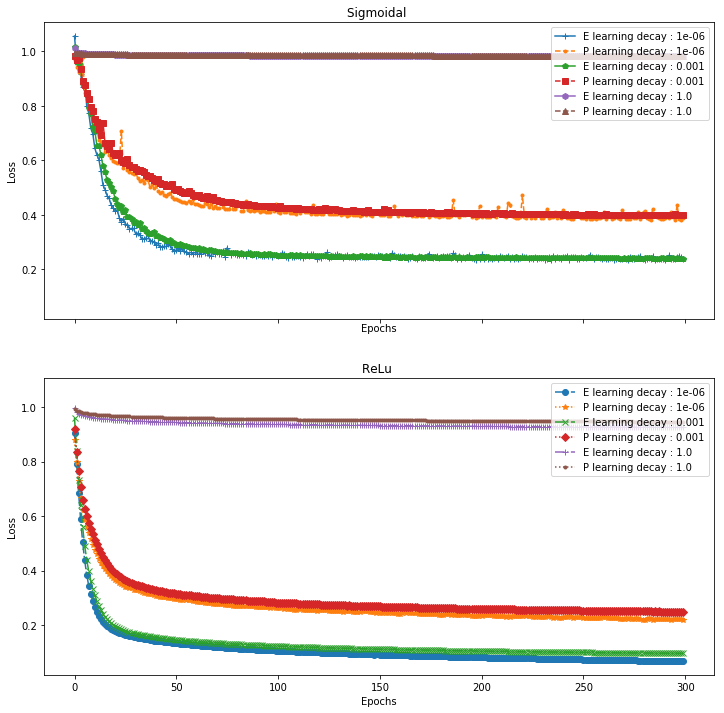

In [268]:
#se fija una semilla para poder generar una comparación
seed = 18
np.random.seed(seed)

plt.close('all')

f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

lines = ["-","--","-.",":"]
linecycler = cycle(lines)

m = ['+','.','o','*','p','s','x','D','h','^']
mcycler = cycle(m)

history = []
activation = ['sigmoid','relu']
n_decay = 3
lear_decay = np.logspace(-6,0,n_decay)
#sgd = SGD(lr=0.2, decay=1e-6)



for l_r_d in lear_decay:
    print("\n\nModelos con lr de, {0}".format(l_r_d))
    for a in activation:
        sgd = SGD(lr = 0.01, decay = l_r_d) ## valor de decay para LR
        model = create_model(a,sgd)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], marker = next(mcycler),linestyle = next(linecycler),label = "E learning decay : "+str(l_r_d))
            axarr[0].plot(hisx.history['val_loss'], marker = next(mcycler),linestyle = next(linecycler), label = "P learning decay : "+str(l_r_d))
        else:
            axarr[1].plot(hisx.history['loss'], marker = next(mcycler),linestyle = next(linecycler),label = "E learning decay : "+str(l_r_d))
            axarr[1].plot(hisx.history['val_loss'], marker = next(mcycler),linestyle = next(linecycler), label = "P learning decay : "+str(l_r_d))

axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal ')
axarr[1].set_title('ReLu ')
#axarr[0].set_ylim(0,2)
#axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper right')
axarr[1].legend(loc='upper right')
plt.show()

**Comentarios**

Para el caso del conjunto de entrenamiento, los mejores resultados se obtiene con:
 1e-06, seguido de 0.001, tanto para el caso de Relu como Sigmoidal. Para el caso Sigmoid, en general el comportamiento es muy similar, salvo antes de los 50 epochs, cuando decay = 1e-06, los resultados están levemente por debajo de los valores de decay = 0.01. Para el caso de relu, también tienen comportamientos muy similares, salvo que llegando a los 300 epochs con decay = 1e-06 se obtienen mejores resultados que con 0.001.
 
Para el conjunto de prueba, los mejores resultados se obtienen como 1e-6, 0.001, pero están por sobre los valores obtenidos con el conjunto de entrenamiento.

La diferencia entre los valores de mse obtenidos, para ambas funciones, entre el conjunto de prueba y entrenamiento son muy similares.

Se realizan otra iteración evaluando si se obtienen mejores resultados con un valor menor para decay.



Modelos con lr de, 1e-06

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a78cdbe10>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 27s 70ms/step - loss: 1.0566 - acc: 0.0000e+00 - val_loss: 0.9688 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 396us/step - loss: 0.9619 - acc: 0.0000e+00 - val_loss: 0.9426 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 416us/step - loss: 0.9385 - acc: 0.0000e+00 - val_loss: 0.9244 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 402us/step - loss: 0.9174 - acc: 0.0000e+00 - val_loss: 0.9156 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 381us/step - loss: 0.8675 - acc: 0.0000e+00 - val_loss: 0.9792 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 358us/step - loss: 0.8820 - acc: 0.0000e+00 - val_loss: 0.

Epoch 57/300
379/379 [==============================] - 0s 347us/step - loss: 0.2572 - acc: 0.0000e+00 - val_loss: 0.4510 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 353us/step - loss: 0.2618 - acc: 0.0000e+00 - val_loss: 0.4422 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 428us/step - loss: 0.2566 - acc: 0.0000e+00 - val_loss: 0.4566 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 310us/step - loss: 0.2619 - acc: 0.0000e+00 - val_loss: 0.4380 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 353us/step - loss: 0.2549 - acc: 0.0000e+00 - val_loss: 0.4409 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 359us/step - loss: 0.2561 - acc: 0.0000e+00 - val_loss: 0.4358 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 363us/step - loss: 0.2571 - acc: 0.0000e+00 - val_loss: 0.4334 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 341us/step - loss: 0.2475 - acc: 0.0000e+00 - val_loss: 0.4121 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 335us/step - loss: 0.2565 - acc: 0.0000e+00 - val_loss: 0.4093 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 342us/step - loss: 0.2473 - acc: 0.0000e+00 - val_loss: 0.4086 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 341us/step - loss: 0.2548 - acc: 0.0000e+00 - val_loss: 0.4027 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 354us/step - loss: 0.2549 - acc: 0.0000e+00 - val_loss: 0.4372 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 347us/step - loss: 0.2483 - acc: 0.0000e+00 - val_loss: 0.4035 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 374us/step - loss: 0.2390 - acc: 0.0000e+00 - val_loss: 0.4022 - val_a

379/379 [==============================] - 0s 373us/step - loss: 0.2505 - acc: 0.0000e+00 - val_loss: 0.4127 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 375us/step - loss: 0.2431 - acc: 0.0000e+00 - val_loss: 0.3948 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 362us/step - loss: 0.2425 - acc: 0.0000e+00 - val_loss: 0.3942 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 358us/step - loss: 0.2405 - acc: 0.0000e+00 - val_loss: 0.4143 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 356us/step - loss: 0.2491 - acc: 0.0000e+00 - val_loss: 0.4100 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 375us/step - loss: 0.2573 - acc: 0.0000e+00 - val_loss: 0.3927 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 378us/step - loss: 0.2436 - acc: 0.0000e+00 - val_loss: 0.3980 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 712us/step - loss: 0.2383 - acc: 0.0000e+00 - val_loss: 0.3989 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 487us/step - loss: 0.2461 - acc: 0.0000e+00 - val_loss: 0.3893 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 449us/step - loss: 0.2379 - acc: 0.0000e+00 - val_loss: 0.4032 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 493us/step - loss: 0.2398 - acc: 0.0000e+00 - val_loss: 0.3990 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 709us/step - loss: 0.2398 - acc: 0.0000e+00 - val_loss: 0.3878 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 423us/step - loss: 0.2402 - acc: 0.0000e+00 - val_loss: 0.3897 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 402us/step - loss: 0.2358 - acc: 0.0000e+00 - val_loss: 0.3959 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 386us/step - loss: 0.2365 - acc: 0.0000e+00 - val_loss: 0.3884 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 373us/step - loss: 0.2422 - acc: 0.0000e+00 - val_loss: 0.3859 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 375us/step - loss: 0.2383 - acc: 0.0000e+00 - val_loss: 0.3827 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 363us/step - loss: 0.2486 - acc: 0.0000e+00 - val_loss: 0.4225 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 371us/step - loss: 0.2351 - acc: 0.0000e+00 - val_loss: 0.3944 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 393us/step - loss: 0.2393 - acc: 0.0000e+00 - val_loss: 0.3933 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 812us/step - loss: 0.2391 - acc: 0.0000e+00 - val_loss: 0.3872 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a793fddd8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 28s 73ms/step - loss: 0.9055 - acc: 0.0000e+00 - val_loss: 0.8778 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 407us/step - loss: 0.7912 - acc: 0.0000e+00 - val_loss: 0.7990 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 356us/step - loss: 0.6856 - acc: 0.0000e+00 - val_loss: 0.7277 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 348us/step - loss: 0.5877 - acc: 0.0000e+00 - val_loss: 0.6683 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 347us/step - loss: 0.5037 - acc: 0.0000e+00 - val_loss: 0.6220 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 378us/step - loss: 0.4372 - acc: 0.0000e+00 - val_loss: 0.5877 - val_acc: 0.0000e+00
Epo

379/379 [==============================] - 0s 383us/step - loss: 0.1293 - acc: 0.0000e+00 - val_loss: 0.2915 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 390us/step - loss: 0.1280 - acc: 0.0000e+00 - val_loss: 0.2917 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 371us/step - loss: 0.1281 - acc: 0.0000e+00 - val_loss: 0.2889 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 366us/step - loss: 0.1268 - acc: 0.0000e+00 - val_loss: 0.2875 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 378us/step - loss: 0.1265 - acc: 0.0000e+00 - val_loss: 0.2852 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 378us/step - loss: 0.1261 - acc: 0.0000e+00 - val_loss: 0.2847 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 378us/step - loss: 0.1243 - acc: 0.0000e+00 - val_loss: 0.2835 - val_acc: 0.0000e+00
Epoch

Epoch 114/300
379/379 [==============================] - 0s 350us/step - loss: 0.1016 - acc: 0.0000e+00 - val_loss: 0.2560 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 348us/step - loss: 0.1016 - acc: 0.0000e+00 - val_loss: 0.2551 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 343us/step - loss: 0.1014 - acc: 0.0000e+00 - val_loss: 0.2543 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 347us/step - loss: 0.1010 - acc: 0.0000e+00 - val_loss: 0.2574 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 342us/step - loss: 0.1007 - acc: 0.0000e+00 - val_loss: 0.2560 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 333us/step - loss: 0.1003 - acc: 0.0000e+00 - val_loss: 0.2563 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 337us/step - loss: 0.1000 - acc: 0.0000e+00 - val_loss: 0.2526 - val_a

379/379 [==============================] - 0s 336us/step - loss: 0.0877 - acc: 0.0000e+00 - val_loss: 0.2400 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 342us/step - loss: 0.0875 - acc: 0.0000e+00 - val_loss: 0.2415 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 331us/step - loss: 0.0867 - acc: 0.0000e+00 - val_loss: 0.2420 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 332us/step - loss: 0.0870 - acc: 0.0000e+00 - val_loss: 0.2400 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 346us/step - loss: 0.0868 - acc: 0.0000e+00 - val_loss: 0.2399 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 328us/step - loss: 0.0864 - acc: 0.0000e+00 - val_loss: 0.2419 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 316us/step - loss: 0.0865 - acc: 0.0000e+00 - val_loss: 0.2404 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 324us/step - loss: 0.0778 - acc: 0.0000e+00 - val_loss: 0.2314 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 334us/step - loss: 0.0780 - acc: 0.0000e+00 - val_loss: 0.2300 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 342us/step - loss: 0.0773 - acc: 0.0000e+00 - val_loss: 0.2317 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 337us/step - loss: 0.0771 - acc: 0.0000e+00 - val_loss: 0.2292 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 342us/step - loss: 0.0769 - acc: 0.0000e+00 - val_loss: 0.2310 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 338us/step - loss: 0.0769 - acc: 0.0000e+00 - val_loss: 0.2309 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 328us/step - loss: 0.0769 - acc: 0.0000e+00 - val_loss: 0.2297 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 333us/step - loss: 0.0696 - acc: 0.0000e+00 - val_loss: 0.2234 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 334us/step - loss: 0.0691 - acc: 0.0000e+00 - val_loss: 0.2254 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 344us/step - loss: 0.0693 - acc: 0.0000e+00 - val_loss: 0.2217 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 325us/step - loss: 0.0690 - acc: 0.0000e+00 - val_loss: 0.2194 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 346us/step - loss: 0.0689 - acc: 0.0000e+00 - val_loss: 0.2220 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 348us/step - loss: 0.0687 - acc: 0.0000e+00 - val_loss: 0.2230 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 337us/step - loss: 0.0686 - acc: 0.0000e+00 - val_loss: 0.2210 - val_acc: 0.0000e+00



Modelos con lr de, 1.584893192461114e-05

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a79628cf8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 23s 60ms/step - loss: 1.0150 - acc: 0.0000e+00 - val_loss: 0.9835 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 341us/step - loss: 0.9607 - acc: 0.0000e+00 - val_loss: 0.9685 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 335us/step - loss: 0.9549 - acc: 0.0000e+00 - val_loss: 0.9767 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 339us/step - loss: 0.9342 - acc: 0.0000e+00 - val_loss: 0.9363 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 335us/step - loss: 0.8785 - acc: 0.0000e+00 - val_loss: 0.8871 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 337us/step - loss: 0.8773 - acc: 0.0000e+0

Epoch 57/300
379/379 [==============================] - 0s 348us/step - loss: 0.2611 - acc: 0.0000e+00 - val_loss: 0.4597 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 337us/step - loss: 0.2577 - acc: 0.0000e+00 - val_loss: 0.4392 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 354us/step - loss: 0.2600 - acc: 0.0000e+00 - val_loss: 0.4426 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 371us/step - loss: 0.2630 - acc: 0.0000e+00 - val_loss: 0.4369 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 380us/step - loss: 0.2580 - acc: 0.0000e+00 - val_loss: 0.4462 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 397us/step - loss: 0.2669 - acc: 0.0000e+00 - val_loss: 0.4398 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 388us/step - loss: 0.2537 - acc: 0.0000e+00 - val_loss: 0.4316 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 331us/step - loss: 0.2526 - acc: 0.0000e+00 - val_loss: 0.4149 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 345us/step - loss: 0.2440 - acc: 0.0000e+00 - val_loss: 0.4067 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 328us/step - loss: 0.2493 - acc: 0.0000e+00 - val_loss: 0.4028 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 343us/step - loss: 0.2479 - acc: 0.0000e+00 - val_loss: 0.4217 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 335us/step - loss: 0.2466 - acc: 0.0000e+00 - val_loss: 0.4011 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 346us/step - loss: 0.2461 - acc: 0.0000e+00 - val_loss: 0.4310 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 322us/step - loss: 0.2485 - acc: 0.0000e+00 - val_loss: 0.4006 - val_a

379/379 [==============================] - 0s 332us/step - loss: 0.2431 - acc: 0.0000e+00 - val_loss: 0.4115 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 334us/step - loss: 0.2490 - acc: 0.0000e+00 - val_loss: 0.3904 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 330us/step - loss: 0.2371 - acc: 0.0000e+00 - val_loss: 0.3973 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 333us/step - loss: 0.2472 - acc: 0.0000e+00 - val_loss: 0.3987 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 320us/step - loss: 0.2412 - acc: 0.0000e+00 - val_loss: 0.3965 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 329us/step - loss: 0.2387 - acc: 0.0000e+00 - val_loss: 0.3913 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 338us/step - loss: 0.2347 - acc: 0.0000e+00 - val_loss: 0.3937 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 330us/step - loss: 0.2387 - acc: 0.0000e+00 - val_loss: 0.4137 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 344us/step - loss: 0.2411 - acc: 0.0000e+00 - val_loss: 0.3948 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 346us/step - loss: 0.2408 - acc: 0.0000e+00 - val_loss: 0.3865 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 331us/step - loss: 0.2401 - acc: 0.0000e+00 - val_loss: 0.3908 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 324us/step - loss: 0.2403 - acc: 0.0000e+00 - val_loss: 0.4016 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 328us/step - loss: 0.2423 - acc: 0.0000e+00 - val_loss: 0.3889 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 335us/step - loss: 0.2396 - acc: 0.0000e+00 - val_loss: 0.3854 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 336us/step - loss: 0.2372 - acc: 0.0000e+00 - val_loss: 0.3824 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 340us/step - loss: 0.2359 - acc: 0.0000e+00 - val_loss: 0.3854 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 332us/step - loss: 0.2504 - acc: 0.0000e+00 - val_loss: 0.3851 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 325us/step - loss: 0.2350 - acc: 0.0000e+00 - val_loss: 0.3836 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 330us/step - loss: 0.2382 - acc: 0.0000e+00 - val_loss: 0.3830 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 337us/step - loss: 0.2327 - acc: 0.0000e+00 - val_loss: 0.3836 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 337us/step - loss: 0.2335 - acc: 0.0000e+00 - val_loss: 0.3956 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7986db38>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 21s 57ms/step - loss: 0.9604 - acc: 0.0000e+00 - val_loss: 0.9185 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 346us/step - loss: 0.8373 - acc: 0.0000e+00 - val_loss: 0.8336 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 352us/step - loss: 0.7297 - acc: 0.0000e+00 - val_loss: 0.7618 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 378us/step - loss: 0.6338 - acc: 0.0000e+00 - val_loss: 0.7011 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 376us/step - loss: 0.5503 - acc: 0.0000e+00 - val_loss: 0.6554 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 403us/step - loss: 0.4819 - acc: 0.0000e+00 - val_loss: 0.6200 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 330us/step - loss: 0.1305 - acc: 0.0000e+00 - val_loss: 0.2937 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 350us/step - loss: 0.1296 - acc: 0.0000e+00 - val_loss: 0.2919 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 333us/step - loss: 0.1288 - acc: 0.0000e+00 - val_loss: 0.2899 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 331us/step - loss: 0.1279 - acc: 0.0000e+00 - val_loss: 0.2892 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 333us/step - loss: 0.1274 - acc: 0.0000e+00 - val_loss: 0.2899 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 332us/step - loss: 0.1269 - acc: 0.0000e+00 - val_loss: 0.2876 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 339us/step - loss: 0.1254 - acc: 0.0000e+00 - val_loss: 0.2867 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 343us/step - loss: 0.1019 - acc: 0.0000e+00 - val_loss: 0.2561 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 341us/step - loss: 0.1017 - acc: 0.0000e+00 - val_loss: 0.2546 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 337us/step - loss: 0.1013 - acc: 0.0000e+00 - val_loss: 0.2530 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 336us/step - loss: 0.1010 - acc: 0.0000e+00 - val_loss: 0.2540 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 331us/step - loss: 0.1004 - acc: 0.0000e+00 - val_loss: 0.2546 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 336us/step - loss: 0.1003 - acc: 0.0000e+00 - val_loss: 0.2533 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 337us/step - loss: 0.1001 - acc: 0.0000e+00 - val_loss: 0.2528 - val_a

379/379 [==============================] - 0s 393us/step - loss: 0.0870 - acc: 0.0000e+00 - val_loss: 0.2381 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 333us/step - loss: 0.0865 - acc: 0.0000e+00 - val_loss: 0.2349 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 354us/step - loss: 0.0861 - acc: 0.0000e+00 - val_loss: 0.2355 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 326us/step - loss: 0.0861 - acc: 0.0000e+00 - val_loss: 0.2364 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 332us/step - loss: 0.0857 - acc: 0.0000e+00 - val_loss: 0.2364 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 361us/step - loss: 0.0858 - acc: 0.0000e+00 - val_loss: 0.2355 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 327us/step - loss: 0.0855 - acc: 0.0000e+00 - val_loss: 0.2361 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 333us/step - loss: 0.0764 - acc: 0.0000e+00 - val_loss: 0.2259 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 338us/step - loss: 0.0762 - acc: 0.0000e+00 - val_loss: 0.2263 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 344us/step - loss: 0.0763 - acc: 0.0000e+00 - val_loss: 0.2267 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 346us/step - loss: 0.0760 - acc: 0.0000e+00 - val_loss: 0.2257 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 338us/step - loss: 0.0757 - acc: 0.0000e+00 - val_loss: 0.2263 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 342us/step - loss: 0.0756 - acc: 0.0000e+00 - val_loss: 0.2276 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 336us/step - loss: 0.0754 - acc: 0.0000e+00 - val_loss: 0.2260 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 338us/step - loss: 0.0689 - acc: 0.0000e+00 - val_loss: 0.2196 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 328us/step - loss: 0.0691 - acc: 0.0000e+00 - val_loss: 0.2195 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 322us/step - loss: 0.0686 - acc: 0.0000e+00 - val_loss: 0.2206 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 332us/step - loss: 0.0683 - acc: 0.0000e+00 - val_loss: 0.2179 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 332us/step - loss: 0.0680 - acc: 0.0000e+00 - val_loss: 0.2199 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 336us/step - loss: 0.0681 - acc: 0.0000e+00 - val_loss: 0.2170 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 341us/step - loss: 0.0677 - acc: 0.0000e+00 - val_loss: 0.2203 - val_acc: 0.0000e+00



Modelos con lr de, 0.00025118864315095795

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7991cbe0>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 20s 52ms/step - loss: 1.0142 - acc: 0.0000e+00 - val_loss: 1.0631 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 334us/step - loss: 1.0022 - acc: 0.0000e+00 - val_loss: 0.9874 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 326us/step - loss: 0.9484 - acc: 0.0000e+00 - val_loss: 0.9430 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 343us/step - loss: 0.9675 - acc: 0.0000e+00 - val_loss: 0.9686 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 330us/step - loss: 0.9450 - acc: 0.0000e+00 - val_loss: 0.9111 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 336us/step - loss: 0.8598 - acc: 0.0000e+

379/379 [==============================] - 0s 349us/step - loss: 0.2685 - acc: 0.0000e+00 - val_loss: 0.4548 - val_acc: 0.0000e+00
Epoch 57/300
379/379 [==============================] - 0s 345us/step - loss: 0.2666 - acc: 0.0000e+00 - val_loss: 0.4582 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 330us/step - loss: 0.2691 - acc: 0.0000e+00 - val_loss: 0.4578 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 342us/step - loss: 0.2631 - acc: 0.0000e+00 - val_loss: 0.4498 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 337us/step - loss: 0.2620 - acc: 0.0000e+00 - val_loss: 0.4475 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 343us/step - loss: 0.2608 - acc: 0.0000e+00 - val_loss: 0.4448 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 324us/step - loss: 0.2616 - acc: 0.0000e+00 - val_loss: 0.4459 - val_acc: 0.0000e+00
Epoch

Epoch 113/300
379/379 [==============================] - 0s 343us/step - loss: 0.2529 - acc: 0.0000e+00 - val_loss: 0.4093 - val_acc: 0.0000e+00
Epoch 114/300
379/379 [==============================] - 0s 344us/step - loss: 0.2504 - acc: 0.0000e+00 - val_loss: 0.4180 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 335us/step - loss: 0.2453 - acc: 0.0000e+00 - val_loss: 0.4081 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 340us/step - loss: 0.2499 - acc: 0.0000e+00 - val_loss: 0.4082 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 341us/step - loss: 0.2468 - acc: 0.0000e+00 - val_loss: 0.4155 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 340us/step - loss: 0.2477 - acc: 0.0000e+00 - val_loss: 0.4069 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 344us/step - loss: 0.2491 - acc: 0.0000e+00 - val_loss: 0.4062 - val_a

379/379 [==============================] - 0s 499us/step - loss: 0.2412 - acc: 0.0000e+00 - val_loss: 0.3988 - val_acc: 0.0000e+00
Epoch 170/300
379/379 [==============================] - 0s 494us/step - loss: 0.2470 - acc: 0.0000e+00 - val_loss: 0.3992 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 486us/step - loss: 0.2433 - acc: 0.0000e+00 - val_loss: 0.4043 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 458us/step - loss: 0.2409 - acc: 0.0000e+00 - val_loss: 0.4071 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 454us/step - loss: 0.2488 - acc: 0.0000e+00 - val_loss: 0.3966 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 465us/step - loss: 0.2411 - acc: 0.0000e+00 - val_loss: 0.3961 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 479us/step - loss: 0.2450 - acc: 0.0000e+00 - val_loss: 0.4073 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 350us/step - loss: 0.2381 - acc: 0.0000e+00 - val_loss: 0.3922 - val_acc: 0.0000e+00
Epoch 226/300
379/379 [==============================] - 0s 320us/step - loss: 0.2392 - acc: 0.0000e+00 - val_loss: 0.3989 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 356us/step - loss: 0.2397 - acc: 0.0000e+00 - val_loss: 0.3940 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 342us/step - loss: 0.2379 - acc: 0.0000e+00 - val_loss: 0.3919 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 343us/step - loss: 0.2369 - acc: 0.0000e+00 - val_loss: 0.3919 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 340us/step - loss: 0.2396 - acc: 0.0000e+00 - val_loss: 0.3948 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 342us/step - loss: 0.2377 - acc: 0.0000e+00 - val_loss: 0.3933 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 355us/step - loss: 0.2384 - acc: 0.0000e+00 - val_loss: 0.3893 - val_acc: 0.0000e+00
Epoch 282/300
379/379 [==============================] - 0s 332us/step - loss: 0.2372 - acc: 0.0000e+00 - val_loss: 0.3884 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 333us/step - loss: 0.2365 - acc: 0.0000e+00 - val_loss: 0.3891 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 337us/step - loss: 0.2355 - acc: 0.0000e+00 - val_loss: 0.3897 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 331us/step - loss: 0.2376 - acc: 0.0000e+00 - val_loss: 0.3886 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 348us/step - loss: 0.2357 - acc: 0.0000e+00 - val_loss: 0.3972 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 342us/step - loss: 0.2357 - acc: 0.0000e+00 - val_loss: 0.3903 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a79a086d8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 21s 55ms/step - loss: 0.9641 - acc: 0.0000e+00 - val_loss: 0.9221 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 365us/step - loss: 0.8420 - acc: 0.0000e+00 - val_loss: 0.8352 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 349us/step - loss: 0.7297 - acc: 0.0000e+00 - val_loss: 0.7560 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 354us/step - loss: 0.6231 - acc: 0.0000e+00 - val_loss: 0.6867 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 338us/step - loss: 0.5291 - acc: 0.0000e+00 - val_loss: 0.6322 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 376us/step - loss: 0.4523 - acc: 0.0000e+00 - val_loss: 0.5911 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 344us/step - loss: 0.1350 - acc: 0.0000e+00 - val_loss: 0.3019 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 366us/step - loss: 0.1344 - acc: 0.0000e+00 - val_loss: 0.3009 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 338us/step - loss: 0.1338 - acc: 0.0000e+00 - val_loss: 0.3011 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 337us/step - loss: 0.1327 - acc: 0.0000e+00 - val_loss: 0.2990 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 335us/step - loss: 0.1327 - acc: 0.0000e+00 - val_loss: 0.2984 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 335us/step - loss: 0.1323 - acc: 0.0000e+00 - val_loss: 0.2960 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 343us/step - loss: 0.1314 - acc: 0.0000e+00 - val_loss: 0.2967 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 344us/step - loss: 0.1100 - acc: 0.0000e+00 - val_loss: 0.2680 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 337us/step - loss: 0.1100 - acc: 0.0000e+00 - val_loss: 0.2669 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 347us/step - loss: 0.1095 - acc: 0.0000e+00 - val_loss: 0.2657 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 340us/step - loss: 0.1086 - acc: 0.0000e+00 - val_loss: 0.2658 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 334us/step - loss: 0.1086 - acc: 0.0000e+00 - val_loss: 0.2651 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 331us/step - loss: 0.1087 - acc: 0.0000e+00 - val_loss: 0.2664 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 339us/step - loss: 0.1079 - acc: 0.0000e+00 - val_loss: 0.2661 - val_a

379/379 [==============================] - 0s 338us/step - loss: 0.0964 - acc: 0.0000e+00 - val_loss: 0.2519 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 347us/step - loss: 0.0958 - acc: 0.0000e+00 - val_loss: 0.2525 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 343us/step - loss: 0.0962 - acc: 0.0000e+00 - val_loss: 0.2527 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 344us/step - loss: 0.0959 - acc: 0.0000e+00 - val_loss: 0.2536 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 337us/step - loss: 0.0957 - acc: 0.0000e+00 - val_loss: 0.2528 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 345us/step - loss: 0.0953 - acc: 0.0000e+00 - val_loss: 0.2523 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 329us/step - loss: 0.0951 - acc: 0.0000e+00 - val_loss: 0.2532 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 339us/step - loss: 0.0878 - acc: 0.0000e+00 - val_loss: 0.2438 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 339us/step - loss: 0.0874 - acc: 0.0000e+00 - val_loss: 0.2431 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 340us/step - loss: 0.0873 - acc: 0.0000e+00 - val_loss: 0.2431 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 340us/step - loss: 0.0871 - acc: 0.0000e+00 - val_loss: 0.2434 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 343us/step - loss: 0.0871 - acc: 0.0000e+00 - val_loss: 0.2437 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 341us/step - loss: 0.0870 - acc: 0.0000e+00 - val_loss: 0.2434 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 326us/step - loss: 0.0869 - acc: 0.0000e+00 - val_loss: 0.2440 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 336us/step - loss: 0.0811 - acc: 0.0000e+00 - val_loss: 0.2356 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 328us/step - loss: 0.0809 - acc: 0.0000e+00 - val_loss: 0.2360 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 340us/step - loss: 0.0810 - acc: 0.0000e+00 - val_loss: 0.2352 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 345us/step - loss: 0.0810 - acc: 0.0000e+00 - val_loss: 0.2353 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 344us/step - loss: 0.0807 - acc: 0.0000e+00 - val_loss: 0.2357 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 350us/step - loss: 0.0804 - acc: 0.0000e+00 - val_loss: 0.2358 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 337us/step - loss: 0.0802 - acc: 0.0000e+00 - val_loss: 0.2357 - val_acc: 0.0000e+00



Modelos con lr de, 0.003981071705534969

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7a0374e0>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 19s 50ms/step - loss: 1.0300 - acc: 0.0000e+00 - val_loss: 0.9813 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 347us/step - loss: 0.9643 - acc: 0.0000e+00 - val_loss: 0.9998 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 344us/step - loss: 0.9530 - acc: 0.0000e+00 - val_loss: 0.9347 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 334us/step - loss: 0.9247 - acc: 0.0000e+00 - val_loss: 0.9521 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 330us/step - loss: 0.9130 - acc: 0.0000e+00 - val_loss: 0.8965 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 339us/step - loss: 0.8606 - acc: 0.0000e+00

Epoch 57/300
379/379 [==============================] - 0s 337us/step - loss: 0.3562 - acc: 0.0000e+00 - val_loss: 0.5622 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 348us/step - loss: 0.3538 - acc: 0.0000e+00 - val_loss: 0.5616 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 344us/step - loss: 0.3506 - acc: 0.0000e+00 - val_loss: 0.5620 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 337us/step - loss: 0.3486 - acc: 0.0000e+00 - val_loss: 0.5571 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 351us/step - loss: 0.3454 - acc: 0.0000e+00 - val_loss: 0.5591 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 341us/step - loss: 0.3486 - acc: 0.0000e+00 - val_loss: 0.5544 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 332us/step - loss: 0.3426 - acc: 0.0000e+00 - val_loss: 0.5548 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 336us/step - loss: 0.2950 - acc: 0.0000e+00 - val_loss: 0.4998 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 344us/step - loss: 0.2937 - acc: 0.0000e+00 - val_loss: 0.4995 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 328us/step - loss: 0.2935 - acc: 0.0000e+00 - val_loss: 0.4985 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 347us/step - loss: 0.2923 - acc: 0.0000e+00 - val_loss: 0.4986 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 340us/step - loss: 0.2925 - acc: 0.0000e+00 - val_loss: 0.4970 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 326us/step - loss: 0.2936 - acc: 0.0000e+00 - val_loss: 0.4965 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 331us/step - loss: 0.2918 - acc: 0.0000e+00 - val_loss: 0.4958 - val_a

379/379 [==============================] - 0s 335us/step - loss: 0.2737 - acc: 0.0000e+00 - val_loss: 0.4716 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 331us/step - loss: 0.2741 - acc: 0.0000e+00 - val_loss: 0.4711 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 338us/step - loss: 0.2732 - acc: 0.0000e+00 - val_loss: 0.4710 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 331us/step - loss: 0.2733 - acc: 0.0000e+00 - val_loss: 0.4704 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 330us/step - loss: 0.2730 - acc: 0.0000e+00 - val_loss: 0.4702 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 335us/step - loss: 0.2730 - acc: 0.0000e+00 - val_loss: 0.4698 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 346us/step - loss: 0.2725 - acc: 0.0000e+00 - val_loss: 0.4694 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 332us/step - loss: 0.2644 - acc: 0.0000e+00 - val_loss: 0.4561 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 333us/step - loss: 0.2641 - acc: 0.0000e+00 - val_loss: 0.4558 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 351us/step - loss: 0.2638 - acc: 0.0000e+00 - val_loss: 0.4557 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 341us/step - loss: 0.2644 - acc: 0.0000e+00 - val_loss: 0.4553 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 340us/step - loss: 0.2637 - acc: 0.0000e+00 - val_loss: 0.4552 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 332us/step - loss: 0.2641 - acc: 0.0000e+00 - val_loss: 0.4549 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 341us/step - loss: 0.2636 - acc: 0.0000e+00 - val_loss: 0.4547 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 330us/step - loss: 0.2588 - acc: 0.0000e+00 - val_loss: 0.4463 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 335us/step - loss: 0.2591 - acc: 0.0000e+00 - val_loss: 0.4462 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 346us/step - loss: 0.2588 - acc: 0.0000e+00 - val_loss: 0.4460 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 347us/step - loss: 0.2583 - acc: 0.0000e+00 - val_loss: 0.4459 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 333us/step - loss: 0.2584 - acc: 0.0000e+00 - val_loss: 0.4457 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 345us/step - loss: 0.2585 - acc: 0.0000e+00 - val_loss: 0.4456 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 330us/step - loss: 0.2590 - acc: 0.0000e+00 - val_loss: 0.4455 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a79f1a5f8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 22s 58ms/step - loss: 0.9433 - acc: 0.0000e+00 - val_loss: 0.8998 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 369us/step - loss: 0.8190 - acc: 0.0000e+00 - val_loss: 0.8143 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 346us/step - loss: 0.7108 - acc: 0.0000e+00 - val_loss: 0.7418 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 376us/step - loss: 0.6157 - acc: 0.0000e+00 - val_loss: 0.6815 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 368us/step - loss: 0.5352 - acc: 0.0000e+00 - val_loss: 0.6344 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 378us/step - loss: 0.4690 - acc: 0.0000e+00 - val_loss: 0.5991 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 338us/step - loss: 0.1577 - acc: 0.0000e+00 - val_loss: 0.3396 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 351us/step - loss: 0.1572 - acc: 0.0000e+00 - val_loss: 0.3386 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 348us/step - loss: 0.1567 - acc: 0.0000e+00 - val_loss: 0.3380 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 345us/step - loss: 0.1562 - acc: 0.0000e+00 - val_loss: 0.3373 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 354us/step - loss: 0.1558 - acc: 0.0000e+00 - val_loss: 0.3367 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 337us/step - loss: 0.1556 - acc: 0.0000e+00 - val_loss: 0.3360 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 334us/step - loss: 0.1549 - acc: 0.0000e+00 - val_loss: 0.3354 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 341us/step - loss: 0.1428 - acc: 0.0000e+00 - val_loss: 0.3140 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 349us/step - loss: 0.1425 - acc: 0.0000e+00 - val_loss: 0.3139 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 324us/step - loss: 0.1425 - acc: 0.0000e+00 - val_loss: 0.3136 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 343us/step - loss: 0.1423 - acc: 0.0000e+00 - val_loss: 0.3134 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 333us/step - loss: 0.1421 - acc: 0.0000e+00 - val_loss: 0.3131 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 334us/step - loss: 0.1420 - acc: 0.0000e+00 - val_loss: 0.3129 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 346us/step - loss: 0.1419 - acc: 0.0000e+00 - val_loss: 0.3126 - val_a

379/379 [==============================] - 0s 334us/step - loss: 0.1362 - acc: 0.0000e+00 - val_loss: 0.3042 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 348us/step - loss: 0.1362 - acc: 0.0000e+00 - val_loss: 0.3040 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 349us/step - loss: 0.1360 - acc: 0.0000e+00 - val_loss: 0.3039 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 335us/step - loss: 0.1360 - acc: 0.0000e+00 - val_loss: 0.3038 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 335us/step - loss: 0.1360 - acc: 0.0000e+00 - val_loss: 0.3037 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 344us/step - loss: 0.1358 - acc: 0.0000e+00 - val_loss: 0.3036 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 340us/step - loss: 0.1357 - acc: 0.0000e+00 - val_loss: 0.3035 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 328us/step - loss: 0.1322 - acc: 0.0000e+00 - val_loss: 0.2981 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 347us/step - loss: 0.1322 - acc: 0.0000e+00 - val_loss: 0.2979 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 327us/step - loss: 0.1321 - acc: 0.0000e+00 - val_loss: 0.2978 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 350us/step - loss: 0.1320 - acc: 0.0000e+00 - val_loss: 0.2977 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 335us/step - loss: 0.1320 - acc: 0.0000e+00 - val_loss: 0.2976 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 325us/step - loss: 0.1319 - acc: 0.0000e+00 - val_loss: 0.2975 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 341us/step - loss: 0.1319 - acc: 0.0000e+00 - val_loss: 0.2974 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 337us/step - loss: 0.1294 - acc: 0.0000e+00 - val_loss: 0.2939 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 339us/step - loss: 0.1293 - acc: 0.0000e+00 - val_loss: 0.2938 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 337us/step - loss: 0.1292 - acc: 0.0000e+00 - val_loss: 0.2937 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 342us/step - loss: 0.1292 - acc: 0.0000e+00 - val_loss: 0.2936 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 340us/step - loss: 0.1292 - acc: 0.0000e+00 - val_loss: 0.2936 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 334us/step - loss: 0.1291 - acc: 0.0000e+00 - val_loss: 0.2935 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 340us/step - loss: 0.1291 - acc: 0.0000e+00 - val_loss: 0.2934 - val_acc: 0.0000e+00



Modelos con lr de, 0.0630957344480193

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7a1253c8>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 21s 54ms/step - loss: 1.0097 - acc: 0.0000e+00 - val_loss: 0.9851 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 360us/step - loss: 0.9771 - acc: 0.0000e+00 - val_loss: 0.9791 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 340us/step - loss: 0.9563 - acc: 0.0000e+00 - val_loss: 0.9980 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 342us/step - loss: 0.9608 - acc: 0.0000e+00 - val_loss: 0.9591 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 332us/step - loss: 0.9515 - acc: 0.0000e+00 - val_loss: 0.9515 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 324us/step - loss: 0.9379 - acc: 0.0000e+00 -

Epoch 57/300
379/379 [==============================] - 0s 341us/step - loss: 0.8473 - acc: 0.0000e+00 - val_loss: 0.8790 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 342us/step - loss: 0.8469 - acc: 0.0000e+00 - val_loss: 0.8785 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 354us/step - loss: 0.8461 - acc: 0.0000e+00 - val_loss: 0.8779 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 335us/step - loss: 0.8452 - acc: 0.0000e+00 - val_loss: 0.8773 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 336us/step - loss: 0.8442 - acc: 0.0000e+00 - val_loss: 0.8768 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 341us/step - loss: 0.8436 - acc: 0.0000e+00 - val_loss: 0.8762 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 335us/step - loss: 0.8426 - acc: 0.0000e+00 - val_loss: 0.8757 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 338us/step - loss: 0.8157 - acc: 0.0000e+00 - val_loss: 0.8554 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 348us/step - loss: 0.8155 - acc: 0.0000e+00 - val_loss: 0.8551 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 334us/step - loss: 0.8151 - acc: 0.0000e+00 - val_loss: 0.8548 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 346us/step - loss: 0.8145 - acc: 0.0000e+00 - val_loss: 0.8545 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 333us/step - loss: 0.8141 - acc: 0.0000e+00 - val_loss: 0.8542 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 347us/step - loss: 0.8137 - acc: 0.0000e+00 - val_loss: 0.8539 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 323us/step - loss: 0.8134 - acc: 0.0000e+00 - val_loss: 0.8536 - val_a

379/379 [==============================] - 0s 350us/step - loss: 0.7970 - acc: 0.0000e+00 - val_loss: 0.8414 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 327us/step - loss: 0.7966 - acc: 0.0000e+00 - val_loss: 0.8412 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 402us/step - loss: 0.7963 - acc: 0.0000e+00 - val_loss: 0.8410 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 339us/step - loss: 0.7961 - acc: 0.0000e+00 - val_loss: 0.8408 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 367us/step - loss: 0.7958 - acc: 0.0000e+00 - val_loss: 0.8405 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 417us/step - loss: 0.7955 - acc: 0.0000e+00 - val_loss: 0.8403 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 415us/step - loss: 0.7952 - acc: 0.0000e+00 - val_loss: 0.8401 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 327us/step - loss: 0.7832 - acc: 0.0000e+00 - val_loss: 0.8312 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 342us/step - loss: 0.7830 - acc: 0.0000e+00 - val_loss: 0.8311 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 336us/step - loss: 0.7828 - acc: 0.0000e+00 - val_loss: 0.8309 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 339us/step - loss: 0.7825 - acc: 0.0000e+00 - val_loss: 0.8308 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 342us/step - loss: 0.7824 - acc: 0.0000e+00 - val_loss: 0.8306 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 334us/step - loss: 0.7822 - acc: 0.0000e+00 - val_loss: 0.8305 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 336us/step - loss: 0.7821 - acc: 0.0000e+00 - val_loss: 0.8303 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 354us/step - loss: 0.7725 - acc: 0.0000e+00 - val_loss: 0.8233 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 338us/step - loss: 0.7723 - acc: 0.0000e+00 - val_loss: 0.8232 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 324us/step - loss: 0.7722 - acc: 0.0000e+00 - val_loss: 0.8231 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 350us/step - loss: 0.7720 - acc: 0.0000e+00 - val_loss: 0.8229 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 352us/step - loss: 0.7717 - acc: 0.0000e+00 - val_loss: 0.8228 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 341us/step - loss: 0.7716 - acc: 0.0000e+00 - val_loss: 0.8227 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 366us/step - loss: 0.7715 - acc: 0.0000e+00 - val_loss: 0.8225 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7d2a2f28>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 21s 55ms/step - loss: 0.9721 - acc: 0.0000e+00 - val_loss: 0.9388 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 336us/step - loss: 0.9031 - acc: 0.0000e+00 - val_loss: 0.8996 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 338us/step - loss: 0.8600 - acc: 0.0000e+00 - val_loss: 0.8722 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 347us/step - loss: 0.8271 - acc: 0.0000e+00 - val_loss: 0.8510 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 337us/step - loss: 0.8011 - acc: 0.0000e+00 - val_loss: 0.8337 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 329us/step - loss: 0.7794 - acc: 0.0000e+00 - val_loss: 0.8192 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 355us/step - loss: 0.5173 - acc: 0.0000e+00 - val_loss: 0.6478 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 337us/step - loss: 0.5156 - acc: 0.0000e+00 - val_loss: 0.6468 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 339us/step - loss: 0.5139 - acc: 0.0000e+00 - val_loss: 0.6457 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 338us/step - loss: 0.5123 - acc: 0.0000e+00 - val_loss: 0.6447 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 333us/step - loss: 0.5107 - acc: 0.0000e+00 - val_loss: 0.6438 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 343us/step - loss: 0.5091 - acc: 0.0000e+00 - val_loss: 0.6428 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 343us/step - loss: 0.5075 - acc: 0.0000e+00 - val_loss: 0.6419 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 331us/step - loss: 0.4550 - acc: 0.0000e+00 - val_loss: 0.6109 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 333us/step - loss: 0.4543 - acc: 0.0000e+00 - val_loss: 0.6105 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 334us/step - loss: 0.4537 - acc: 0.0000e+00 - val_loss: 0.6101 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 342us/step - loss: 0.4530 - acc: 0.0000e+00 - val_loss: 0.6097 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 324us/step - loss: 0.4523 - acc: 0.0000e+00 - val_loss: 0.6093 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 349us/step - loss: 0.4516 - acc: 0.0000e+00 - val_loss: 0.6089 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 336us/step - loss: 0.4510 - acc: 0.0000e+00 - val_loss: 0.6085 - val_a

379/379 [==============================] - 0s 336us/step - loss: 0.4249 - acc: 0.0000e+00 - val_loss: 0.5936 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 342us/step - loss: 0.4245 - acc: 0.0000e+00 - val_loss: 0.5934 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 332us/step - loss: 0.4241 - acc: 0.0000e+00 - val_loss: 0.5932 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 341us/step - loss: 0.4237 - acc: 0.0000e+00 - val_loss: 0.5929 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 338us/step - loss: 0.4233 - acc: 0.0000e+00 - val_loss: 0.5927 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 375us/step - loss: 0.4229 - acc: 0.0000e+00 - val_loss: 0.5925 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 346us/step - loss: 0.4225 - acc: 0.0000e+00 - val_loss: 0.5922 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 331us/step - loss: 0.4058 - acc: 0.0000e+00 - val_loss: 0.5827 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 344us/step - loss: 0.4055 - acc: 0.0000e+00 - val_loss: 0.5825 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 332us/step - loss: 0.4053 - acc: 0.0000e+00 - val_loss: 0.5824 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 341us/step - loss: 0.4050 - acc: 0.0000e+00 - val_loss: 0.5822 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 346us/step - loss: 0.4047 - acc: 0.0000e+00 - val_loss: 0.5820 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 349us/step - loss: 0.4044 - acc: 0.0000e+00 - val_loss: 0.5819 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 333us/step - loss: 0.4041 - acc: 0.0000e+00 - val_loss: 0.5817 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 323us/step - loss: 0.3922 - acc: 0.0000e+00 - val_loss: 0.5748 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 338us/step - loss: 0.3919 - acc: 0.0000e+00 - val_loss: 0.5747 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 335us/step - loss: 0.3917 - acc: 0.0000e+00 - val_loss: 0.5746 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 335us/step - loss: 0.3915 - acc: 0.0000e+00 - val_loss: 0.5745 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 347us/step - loss: 0.3913 - acc: 0.0000e+00 - val_loss: 0.5744 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 339us/step - loss: 0.3911 - acc: 0.0000e+00 - val_loss: 0.5742 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 334us/step - loss: 0.3909 - acc: 0.0000e+00 - val_loss: 0.5741 - val_acc: 0.0000e+00



Modelos con lr de, 1.0

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a77cd3cc0>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 19s 49ms/step - loss: 1.0088 - acc: 0.0000e+00 - val_loss: 0.9980 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 340us/step - loss: 0.9977 - acc: 0.0000e+00 - val_loss: 0.9965 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 331us/step - loss: 0.9972 - acc: 0.0000e+00 - val_loss: 0.9958 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 331us/step - loss: 0.9958 - acc: 0.0000e+00 - val_loss: 0.9952 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 337us/step - loss: 0.9942 - acc: 0.0000e+00 - val_loss: 0.9948 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 349us/step - loss: 0.9938 - acc: 0.0000e+00 - val_loss: 0.99

Epoch 57/300
379/379 [==============================] - 0s 337us/step - loss: 0.9880 - acc: 0.0000e+00 - val_loss: 0.9903 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 349us/step - loss: 0.9880 - acc: 0.0000e+00 - val_loss: 0.9903 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 341us/step - loss: 0.9879 - acc: 0.0000e+00 - val_loss: 0.9902 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 356us/step - loss: 0.9879 - acc: 0.0000e+00 - val_loss: 0.9902 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 331us/step - loss: 0.9879 - acc: 0.0000e+00 - val_loss: 0.9902 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 322us/step - loss: 0.9878 - acc: 0.0000e+00 - val_loss: 0.9902 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 342us/step - loss: 0.9878 - acc: 0.0000e+00 - val_loss: 0.9901 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 331us/step - loss: 0.9864 - acc: 0.0000e+00 - val_loss: 0.9890 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 325us/step - loss: 0.9864 - acc: 0.0000e+00 - val_loss: 0.9890 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 347us/step - loss: 0.9863 - acc: 0.0000e+00 - val_loss: 0.9890 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 343us/step - loss: 0.9863 - acc: 0.0000e+00 - val_loss: 0.9890 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 335us/step - loss: 0.9863 - acc: 0.0000e+00 - val_loss: 0.9890 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 337us/step - loss: 0.9863 - acc: 0.0000e+00 - val_loss: 0.9890 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 343us/step - loss: 0.9863 - acc: 0.0000e+00 - val_loss: 0.9889 - val_a

379/379 [==============================] - 0s 336us/step - loss: 0.9854 - acc: 0.0000e+00 - val_loss: 0.9883 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 349us/step - loss: 0.9854 - acc: 0.0000e+00 - val_loss: 0.9883 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 340us/step - loss: 0.9854 - acc: 0.0000e+00 - val_loss: 0.9883 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 360us/step - loss: 0.9854 - acc: 0.0000e+00 - val_loss: 0.9883 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 334us/step - loss: 0.9854 - acc: 0.0000e+00 - val_loss: 0.9883 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 336us/step - loss: 0.9854 - acc: 0.0000e+00 - val_loss: 0.9883 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 361us/step - loss: 0.9854 - acc: 0.0000e+00 - val_loss: 0.9882 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 341us/step - loss: 0.9848 - acc: 0.0000e+00 - val_loss: 0.9878 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 339us/step - loss: 0.9848 - acc: 0.0000e+00 - val_loss: 0.9878 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 370us/step - loss: 0.9848 - acc: 0.0000e+00 - val_loss: 0.9878 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 326us/step - loss: 0.9847 - acc: 0.0000e+00 - val_loss: 0.9878 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 331us/step - loss: 0.9847 - acc: 0.0000e+00 - val_loss: 0.9878 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 336us/step - loss: 0.9847 - acc: 0.0000e+00 - val_loss: 0.9878 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 347us/step - loss: 0.9847 - acc: 0.0000e+00 - val_loss: 0.9877 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 332us/step - loss: 0.9843 - acc: 0.0000e+00 - val_loss: 0.9874 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 345us/step - loss: 0.9843 - acc: 0.0000e+00 - val_loss: 0.9874 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 342us/step - loss: 0.9842 - acc: 0.0000e+00 - val_loss: 0.9874 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 338us/step - loss: 0.9842 - acc: 0.0000e+00 - val_loss: 0.9874 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 347us/step - loss: 0.9842 - acc: 0.0000e+00 - val_loss: 0.9874 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 337us/step - loss: 0.9842 - acc: 0.0000e+00 - val_loss: 0.9874 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 352us/step - loss: 0.9842 - acc: 0.0000e+00 - val_loss: 0.9873 - val_acc: 0.0000e+00


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7a8acd30>.
Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 20s 53ms/step - loss: 1.0066 - acc: 0.0000e+00 - val_loss: 0.9927 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 343us/step - loss: 0.9899 - acc: 0.0000e+00 - val_loss: 0.9862 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 333us/step - loss: 0.9834 - acc: 0.0000e+00 - val_loss: 0.9825 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 365us/step - loss: 0.9793 - acc: 0.0000e+00 - val_loss: 0.9798 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 397us/step - loss: 0.9763 - acc: 0.0000e+00 - val_loss: 0.9778 - val_acc: 0.0000e+00
Epoch 6/300
379/379 [==============================] - 0s 344us/step - loss: 0.9739 - acc: 0.0000e+00 - val_loss: 0.9761 - val_acc: 0.0000e+00
Epo

Epoch 57/300
379/379 [==============================] - 0s 334us/step - loss: 0.9465 - acc: 0.0000e+00 - val_loss: 0.9557 - val_acc: 0.0000e+00
Epoch 58/300
379/379 [==============================] - 0s 342us/step - loss: 0.9463 - acc: 0.0000e+00 - val_loss: 0.9556 - val_acc: 0.0000e+00
Epoch 59/300
379/379 [==============================] - 0s 353us/step - loss: 0.9461 - acc: 0.0000e+00 - val_loss: 0.9554 - val_acc: 0.0000e+00
Epoch 60/300
379/379 [==============================] - 0s 356us/step - loss: 0.9459 - acc: 0.0000e+00 - val_loss: 0.9553 - val_acc: 0.0000e+00
Epoch 61/300
379/379 [==============================] - 0s 332us/step - loss: 0.9457 - acc: 0.0000e+00 - val_loss: 0.9551 - val_acc: 0.0000e+00
Epoch 62/300
379/379 [==============================] - 0s 353us/step - loss: 0.9456 - acc: 0.0000e+00 - val_loss: 0.9550 - val_acc: 0.0000e+00
Epoch 63/300
379/379 [==============================] - 0s 340us/step - loss: 0.9454 - acc: 0.0000e+00 - val_loss: 0.9548 - val_acc: 0.0

Epoch 114/300
379/379 [==============================] - 0s 336us/step - loss: 0.9386 - acc: 0.0000e+00 - val_loss: 0.9496 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 341us/step - loss: 0.9385 - acc: 0.0000e+00 - val_loss: 0.9495 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 345us/step - loss: 0.9384 - acc: 0.0000e+00 - val_loss: 0.9495 - val_acc: 0.0000e+00
Epoch 117/300
379/379 [==============================] - 0s 337us/step - loss: 0.9383 - acc: 0.0000e+00 - val_loss: 0.9494 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 334us/step - loss: 0.9382 - acc: 0.0000e+00 - val_loss: 0.9493 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 341us/step - loss: 0.9381 - acc: 0.0000e+00 - val_loss: 0.9492 - val_acc: 0.0000e+00
Epoch 120/300
379/379 [==============================] - 0s 335us/step - loss: 0.9380 - acc: 0.0000e+00 - val_loss: 0.9492 - val_a

379/379 [==============================] - 0s 395us/step - loss: 0.9340 - acc: 0.0000e+00 - val_loss: 0.9461 - val_acc: 0.0000e+00
Epoch 171/300
379/379 [==============================] - 0s 549us/step - loss: 0.9339 - acc: 0.0000e+00 - val_loss: 0.9461 - val_acc: 0.0000e+00
Epoch 172/300
379/379 [==============================] - 0s 377us/step - loss: 0.9339 - acc: 0.0000e+00 - val_loss: 0.9460 - val_acc: 0.0000e+00
Epoch 173/300
379/379 [==============================] - 0s 496us/step - loss: 0.9338 - acc: 0.0000e+00 - val_loss: 0.9460 - val_acc: 0.0000e+00
Epoch 174/300
379/379 [==============================] - 0s 444us/step - loss: 0.9338 - acc: 0.0000e+00 - val_loss: 0.9459 - val_acc: 0.0000e+00
Epoch 175/300
379/379 [==============================] - 0s 448us/step - loss: 0.9337 - acc: 0.0000e+00 - val_loss: 0.9459 - val_acc: 0.0000e+00
Epoch 176/300
379/379 [==============================] - 0s 440us/step - loss: 0.9336 - acc: 0.0000e+00 - val_loss: 0.9458 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 369us/step - loss: 0.9308 - acc: 0.0000e+00 - val_loss: 0.9437 - val_acc: 0.0000e+00
Epoch 227/300
379/379 [==============================] - 0s 334us/step - loss: 0.9307 - acc: 0.0000e+00 - val_loss: 0.9436 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 329us/step - loss: 0.9307 - acc: 0.0000e+00 - val_loss: 0.9436 - val_acc: 0.0000e+00
Epoch 229/300
379/379 [==============================] - 0s 344us/step - loss: 0.9307 - acc: 0.0000e+00 - val_loss: 0.9436 - val_acc: 0.0000e+00
Epoch 230/300
379/379 [==============================] - 0s 344us/step - loss: 0.9306 - acc: 0.0000e+00 - val_loss: 0.9435 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 337us/step - loss: 0.9306 - acc: 0.0000e+00 - val_loss: 0.9435 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 334us/step - loss: 0.9305 - acc: 0.0000e+00 - val_loss: 0.9434 - val_acc: 0.0000e+00

379/379 [==============================] - 0s 353us/step - loss: 0.9283 - acc: 0.0000e+00 - val_loss: 0.9418 - val_acc: 0.0000e+00
Epoch 283/300
379/379 [==============================] - 0s 345us/step - loss: 0.9283 - acc: 0.0000e+00 - val_loss: 0.9417 - val_acc: 0.0000e+00
Epoch 284/300
379/379 [==============================] - 0s 343us/step - loss: 0.9282 - acc: 0.0000e+00 - val_loss: 0.9417 - val_acc: 0.0000e+00
Epoch 285/300
379/379 [==============================] - 0s 332us/step - loss: 0.9282 - acc: 0.0000e+00 - val_loss: 0.9417 - val_acc: 0.0000e+00
Epoch 286/300
379/379 [==============================] - 0s 342us/step - loss: 0.9282 - acc: 0.0000e+00 - val_loss: 0.9416 - val_acc: 0.0000e+00
Epoch 287/300
379/379 [==============================] - 0s 341us/step - loss: 0.9281 - acc: 0.0000e+00 - val_loss: 0.9416 - val_acc: 0.0000e+00
Epoch 288/300
379/379 [==============================] - 0s 345us/step - loss: 0.9281 - acc: 0.0000e+00 - val_loss: 0.9416 - val_acc: 0.0000e+00

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal ')

Text(0.5,1,'ReLu ')

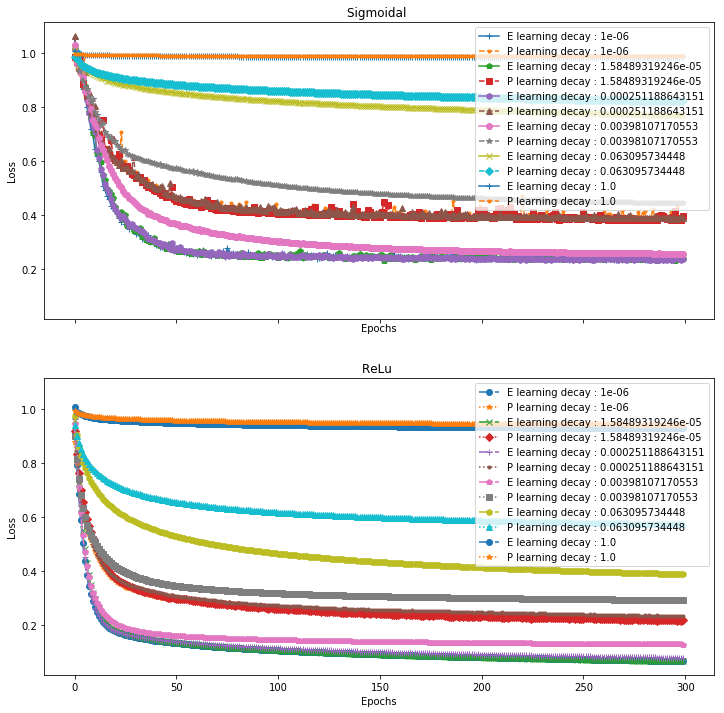

In [270]:
#se fija una semilla para poder generar una comparación
seed = 18
np.random.seed(seed)

plt.close('all')

f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

lines = ["-","--","-.",":"]
linecycler = cycle(lines)

m = ['+','.','o','*','p','s','x','D','h','^']
mcycler = cycle(m)

history = []
activation = ['sigmoid','relu']
n_decay = 6
lear_decay = np.logspace(-6,0,n_decay)
#sgd = SGD(lr=0.2, decay=1e-6)



for l_r_d in lear_decay:
    print("\n\nModelos con lr de, {0}".format(l_r_d))
    for a in activation:
        sgd = SGD(lr = 0.01, decay = l_r_d) ## valor de decay para LR
        model = create_model(a,sgd)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], marker = next(mcycler),linestyle = next(linecycler),label = "E learning decay : "+str(l_r_d))
            axarr[0].plot(hisx.history['val_loss'], marker = next(mcycler),linestyle = next(linecycler), label = "P learning decay : "+str(l_r_d))
        else:
            axarr[1].plot(hisx.history['loss'], marker = next(mcycler),linestyle = next(linecycler),label = "E learning decay : "+str(l_r_d))
            axarr[1].plot(hisx.history['val_loss'], marker = next(mcycler),linestyle = next(linecycler), label = "P learning decay : "+str(l_r_d))

axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal ')
axarr[1].set_title('ReLu ')
#axarr[0].set_ylim(0,2)
#axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper right')
axarr[1].legend(loc='upper right')
plt.show()

Se corrobora que los mejores resultados se obtiene cn valores de decay pequeños, tanto para el conjunto de prue
ba como de entrenamiento.

### f) Entrene los modelos considerados en b) y c) utilizando SGD en mini-batches. Experimentación con diferentes tamaños del batch. 



Modelos con n_batches de, 1


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a72f37f60>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7a7d3550>.




Modelos con n_batches de, 20


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7e731c18>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7e918da0>.




Modelos con n_batches de, 39


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a56082358>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7e7911d0>.




Modelos con n_batches de, 58


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7e311b00>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a7e425c88>.




Modelos con n_batches de, 77


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a7e5d8fd0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a813cb048>.




Modelos con n_batches de, 96


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a817347b8>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a81a309b0>.




Modelos con n_batches de, 114


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a80ff1d30>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a81b70320>.




Modelos con n_batches de, 133


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a821d84e0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a81d778d0>.




Modelos con n_batches de, 152


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a82506e48>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a825ecb38>.




Modelos con n_batches de, 171


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a830a24e0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a8368b1d0>.




Modelos con n_batches de, 190


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a8236aa58>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a83799cc0>.




Modelos con n_batches de, 209


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a852e5080>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a8473b668>.




Modelos con n_batches de, 228


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a8510f9b0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a85811fd0>.




Modelos con n_batches de, 247


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a853bae80>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a87bd21d0>.




Modelos con n_batches de, 266


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a85d1e160>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a85e33ac8>.




Modelos con n_batches de, 284


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a85710f60>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a8547bef0>.




Modelos con n_batches de, 303


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a85f48668>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a86005d68>.




Modelos con n_batches de, 322


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a87c52be0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a87ce6ac8>.




Modelos con n_batches de, 341


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a885182e8>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a88374b38>.




Modelos con n_batches de, 360


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a884879b0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a87e3dfd0>.




Modelos con n_batches de, 379


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a8880b160>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a891344a8>.


Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal')

Text(0.5,1,'ReLu')

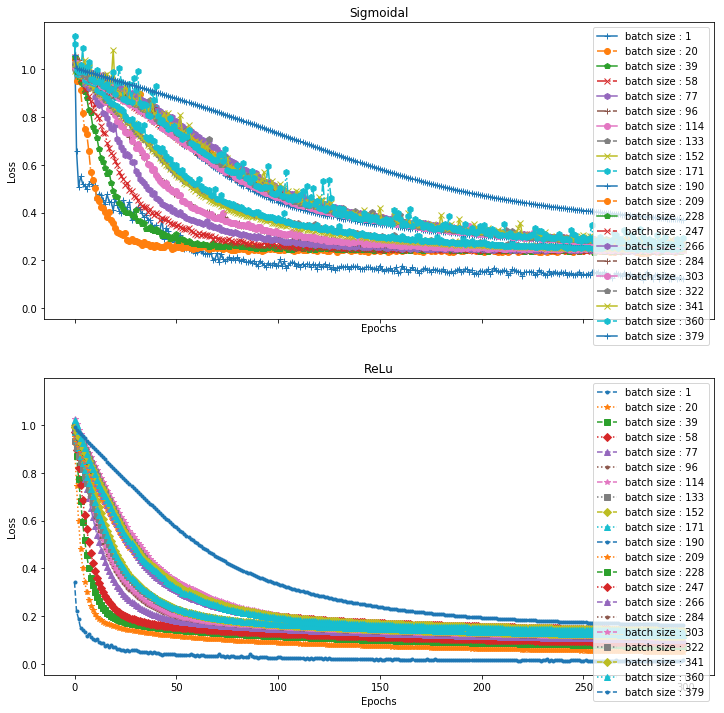

In [271]:


seed = 18
np.random.seed(seed)

plt.close('all')
f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))  #antes 8,8

#Diferentes tamaños del batch
n_batches =  21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches)) 
batch_sizes=batch_sizes.astype(int)

##modelos de b) y c)
history = []
activation = ['sigmoid','relu']
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

m = ['+','.','o','*','p','s','x','D','h','^']
mcycler = cycle(m)

for n_b in batch_sizes:
    print("\n\nModelos con n_batches de, {0}\n".format(n_b))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model(a,sgd)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(),batch_size=n_b, epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], marker = next(mcycler),linestyle = next(linecycler), label = "batch size : "+str(n_b))
        else:
            axarr[1].plot(hisx.history['loss'], marker = next(mcycler),linestyle = next(linecycler), label = "batch size : "+str(n_b))   
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal')
axarr[1].set_title('ReLu')
#axarr[0].set_ylim(0,2)
#axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper right')
axarr[1].legend(loc='upper right')
plt.show()


** Comentarios **

- Dada lo poco claro de los gráficos, es que se eligen un subconjunto de los valores iniciales para mini batch y se grafican a continuación, para posterior análisis.



Modelos con n_batches de, 1


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a563f3c50>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a886c3668>.




Modelos con n_batches de, 20


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a88750cc0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a887f8400>.




Modelos con n_batches de, 39


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a88c4bc18>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a89664748>.




Modelos con n_batches de, 58


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a8b100be0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a89bc3358>.




Modelos con n_batches de, 360


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a89dd3b70>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a89546320>.





 E:Conjunto de Entrenamiento, P: Conjunto de Prueba



Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal')

Text(0.5,1,'ReLu')

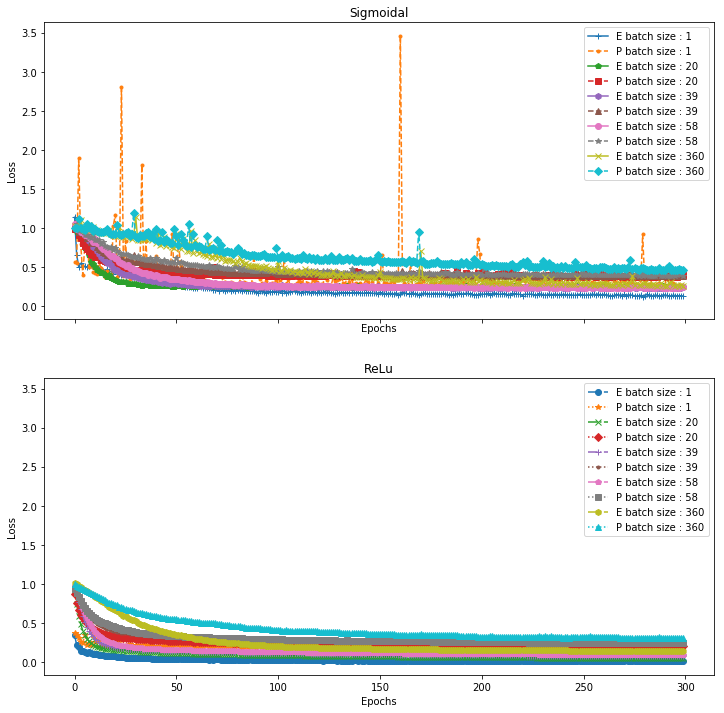

In [272]:
seed = 18
np.random.seed(seed)

plt.close('all')
f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))  #antes 8,8

#Diferentes tamaños del batch
n_batches =  21
batch_sizes = [1,20,39, 58,360] #np.round(np.linspace(1,X_train_scaled.shape[0],n_batches)) 
#batch_sizes=batch_sizes.astype(int)

##modelos de b) y c)
history = []
activation = ['sigmoid','relu']
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

m = ['+','.','o','*','p','s','x','D','h','^']
mcycler = cycle(m)

for n_b in batch_sizes:
    print("\n\nModelos con n_batches de, {0}\n".format(n_b))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model(a,sgd)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(),batch_size=n_b, epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], 
                          marker = next(mcycler),linestyle = next(linecycler), label = "E batch size : "+str(n_b))
            axarr[0].plot(hisx.history['val_loss'], 
                          marker = next(mcycler),linestyle = next(linecycler), label = "P batch size : "+str(n_b))
        else:
            axarr[1].plot(hisx.history['loss'], 
                          marker = next(mcycler),linestyle = next(linecycler), label = "E batch size : "+str(n_b))  
            axarr[1].plot(hisx.history['val_loss'], 
                          marker = next(mcycler),linestyle = next(linecycler), label = "P batch size : "+str(n_b))

print("\n\n\n E:Conjunto de Entrenamiento, P: Conjunto de Prueba\n")            
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal')
axarr[1].set_title('ReLu')
#axarr[0].set_ylim(0,2)
#axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper right')
axarr[1].legend(loc='upper right')
plt.show()



** Comentarios **

Los valores gráficados son los que más tiempo demoran, valores pequeños, que se explica por la forma de exploración para obtener el resultados, sin embargo son los que presentán mejor desempeño. También se muestra un valor grande de batch_size.


Para el caso de Sigmoid, el mejor resultado se obtiene con batch_size = 1, siendo mejor el resultado del conjunto de entrenamiento que el conjunto de prueba (que presentan bastante oscilaciones). Los resultados van empeorando a medida que aumenta el valor de batch_size, es decir, todos los valores de batch_size están por debajo de los resultados de batch_size = 360, tanto para el conjunto de prueba como de entrenamiento.

Para el caso de Relu, el mejor resultado se obtiene para el conjunto de entrenamiento cuando batch_size = 1, seguido de batch_size = 20. Para el caso de prueba, los mejores valores son los mismos, pero con un desempeño un poco peor. Los resultados, al llegar a batch_size = 360, para el conjunto de entrenamiento se mezcla con los resultados obtenidos con batch_size mas pequeños (para ambos conjuntos de datos).

### g) Entrenando los modelos obtenidos en b) y c) utilizando estrategias modernas para adaptar la tasa de aprendizaje. 
 - adagrad
 - adadelta
 - RMSprop
 - adam
 



Modelos con , <keras.optimizers.SGD object at 0x1a8f387a20>


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a8f387a20>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a8f387a20>.




Modelos con , <keras.optimizers.Adam object at 0x1a8f3dfc88>


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.Adam object at 0x1a8f3dfc88>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.Adam object at 0x1a8f3dfc88>.




Modelos con , <keras.optimizers.RMSprop object at 0x1a8f3dfcc0>


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.RMSprop object at 0x1a8f3dfcc0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.RMSprop object at 0x1a8f3dfcc0>.




Modelos con , <keras.optimizers.Adagrad object at 0x1a8f3dfcf8>


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.Adagrad object at 0x1a8f3dfcf8>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.Adagrad object at 0x1a8f3dfcf8>.




Modelos con , <keras.optimizers.Adadelta object at 0x1a8f3dff28>


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.Adadelta object at 0x1a8f3dff28>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.Adadelta object at 0x1a8f3dff28>.




E: Conjunto de Entrenamiento, P: Conjunto de Prueba



Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal - Cjto. Entrenamiento')

Text(0.5,1,'ReLu - Cjto. Entrenamiento')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal - Cjto. Prueba')

Text(0.5,1,'ReLu - Cjto. Prueba')

'relu'

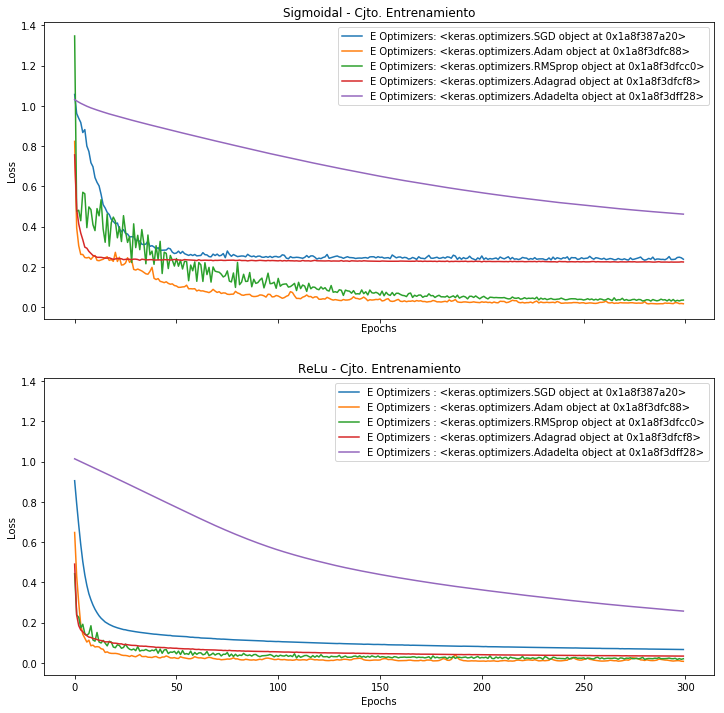

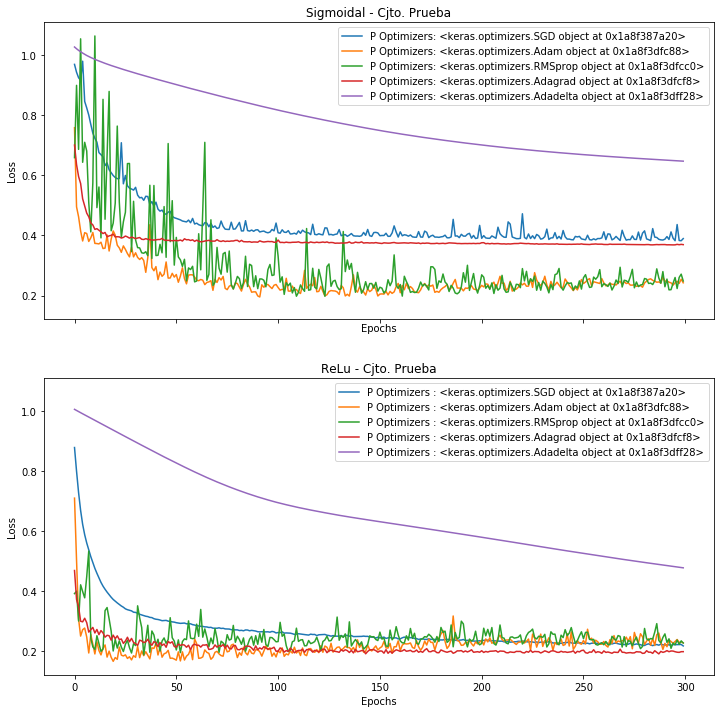

In [273]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

seed = 18
np.random.seed(seed)

#moptimizer = Adagrad(lr=0.01)
#model.compile(optimizer=moptimizer)
#model.fit(X_train_scaled.as_matrix(),y_train.as_matrix()

plt.close('all')
f, axarr_train = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

f1, axarr_test = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

## Fijando la tasa de aprendizaje
sgd = SGD(lr = 0.01)
adam = Adam(lr=0.01)
rmsprop = RMSprop(lr=0.01)
adagrad = Adagrad(lr=0.01)
adadelta = Adadelta(lr=0.01)

optimizers = [sgd,adam,rmsprop,adagrad,adadelta]

#modelob 1 / FF 3 Capas I/H/O 200 neuronas en la oculta a/sigmoide
#sgd lr 0.01 epochs 300
#modeloc 2 / Igual al uno pero a/ReLu
history = []
activation = ['sigmoid','relu']

for moptimizer in optimizers:
    print("\n\nModelos con , {0}\n".format(moptimizer))
    for a in activation:
        model = create_model(a,moptimizer)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'], label = "E Optimizers: "+str(moptimizer))
            axarr_test[0].plot(hisx.history['val_loss'], label = "P Optimizers: "+str(moptimizer))
            
        else:
            axarr_train[1].plot(hisx.history['loss'], label = "E Optimizers : "+str(moptimizer))   
            axarr_test[1].plot(hisx.history['val_loss'], label = "P Optimizers : "+str(moptimizer))  

print("\n\nE: Conjunto de Entrenamiento, P: Conjunto de Prueba\n")
axarr_train[0].set_xlabel('Epochs')
axarr_train[0].set_ylabel('Loss')
axarr_train[1].set_xlabel('Epochs')
axarr_train[1].set_ylabel('Loss')
axarr_train[0].set_title('Sigmoidal - Cjto. Entrenamiento')
axarr_train[1].set_title('ReLu - Cjto. Entrenamiento')
#axarr_train[0].set_ylim(0,2)
#axarr_train[1].set_ylim(0,2)
axarr_train[0].legend(loc='upper right')
axarr_train[1].legend(loc='upper right')

axarr_test[0].set_xlabel('Epochs')
axarr_test[0].set_ylabel('Loss')
axarr_test[1].set_xlabel('Epochs')
axarr_test[1].set_ylabel('Loss')
axarr_test[0].set_title('Sigmoidal - Cjto. Prueba')
axarr_test[1].set_title('ReLu - Cjto. Prueba')
#axarr_test[0].set_ylim(0,2)
a#xarr_test[1].set_ylim(0,2)
axarr_test[0].legend(loc='upper right')
axarr_test[1].legend(loc='upper right')
plt.show()
    

** Comentarios**

**¿Se observa en algún caso un mejor resultado final?**

Sí, el mejor resultado se obtiene para Adam en el caso de Sigmoid y Relu, seguido de SGD. Es importante destacar que al llegar a los 300 epochs los comportamientos son muy similares.

**¿Se observa en algún caso una mayor velocidad de convergencia sobre el dataset de entrenamiento?**

La mayor velocidad de convergencia se obtiene para el caso de Relu con Adam, se produce antes de los 50 epochos. Para el caso de Sigmoid también es con Adam, sin embargo no converge tan rápido como con Relu.

Los peores resultados se producen con Adadelta.

**¿Sobre el dataset de pruebas?**
Para el Sigmoid inicialmente de produce con Adam, sin embargo luego SGD se le acerca, obteniendo valores casi iguales.
Para el caso de Relu, Adam obtiene mejores resutados, luego pasado los 150 epochs, Adadelta obtiene mejores resultados.

Se destaca que al utilizar el conjunto de entrenamiento los resultados presentan oscilaciones.

### h) Utilizando regularizadores  l1 y  l2 (weight decay) para los modelos de b) y c)


In [278]:
from keras import regularizers
def create_model_L(activation, optimizer = 'adam', f_loss = 'mean_squared_error', regularizer = regularizers.l1(0.01)):
    # create model
    print("\nModelo con params: {0}, {1}, {2}.".format(activation,f_loss,optimizer))
    model = Sequential()  
    model.add(Dense(200, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation=activation,
                    kernel_regularizer = regularizer))
    # output layer
    model.add(Dense(1, kernel_initializer='uniform', activation = 'linear', kernel_regularizer = regularizer ))
    model.compile(optimizer = optimizer, loss = f_loss , metrics=['accuracy']) ## accuracy no debiese estar
    return model

def create_model_L1(activation, optimizer = 'adam', f_loss = 'mean_squared_error', regularizer = regularizers.l1(0.01)):
    # create model
    print("\nModelo con params: {0}, {1}, {2}.".format(activation,f_loss,optimizer))
    model = Sequential()  
    model.add(Dense(200, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation=activation, 
                    kernel_regularizer = regularizer))
    # output layer
    model.add(Dense(1, kernel_initializer='uniform', activation = 'linear' ))
    model.compile(optimizer = optimizer, loss = f_loss , metrics=['accuracy']) ## accuracy no debiese estar
    return model

def create_model_L2(activation, optimizer = 'adam', f_loss = 'mean_squared_error', regularizer = regularizers.l1(0.01)):
    # create model
    print("\nModelo con params: {0}, {1}, {2}.".format(activation,f_loss,optimizer))
    model = Sequential()  
    model.add(Dense(200, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation=activation))
    # output layer
    model.add(Dense(1, kernel_initializer='uniform', activation = 'linear', kernel_regularizer = regularizer ))
    model.compile(optimizer = optimizer, loss = f_loss , metrics=['accuracy']) ## accuracy no debiese estar
    return model



*******************************


Modelos con regularizador: l1=0.01 ambas capas


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a43568f28>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a3225bc18>.



Modelos con regularizador: l2=0.01 ambas capas


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a322a1cc0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a40cbb7f0>.




*******************************

 Sin Regularizador


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a886206a0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a8beaacc0>.




*******************************


Modelos con regularizador: l1=0.01 a primera Capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a8ba53ba8>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a8d534dd8>.



Modelos con regularizador: l2=0.01 a primera Capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a8bbb1dd8>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a8bd4ddd8>.




*******************************


Modelos con regularizador: l1=0.01 a segunda capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a8d89dcc0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a8c935cf8>.



Modelos con regularizador: l2=0.01 a segunda capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a8cdcf780>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a8d227f28>.


Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal')

Text(0.5,1,'ReLu')

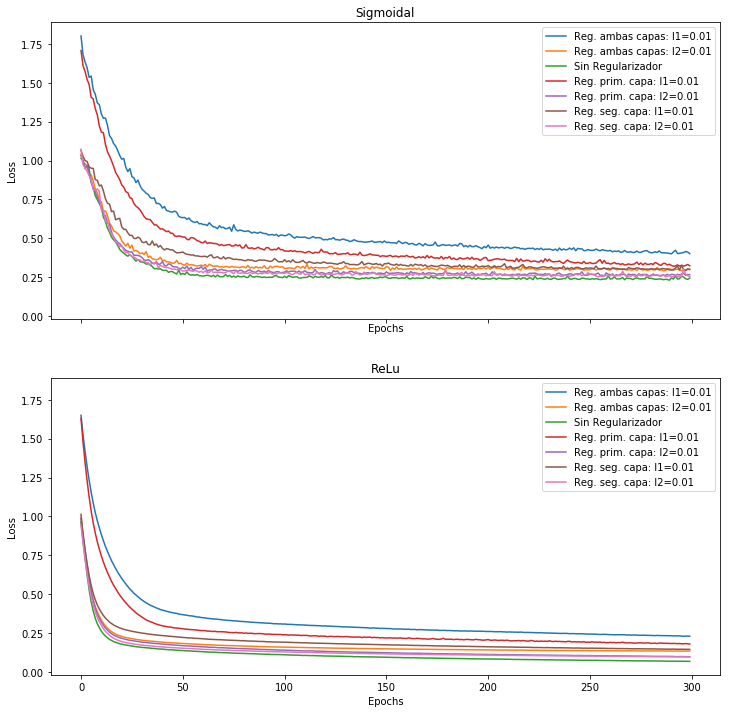

In [279]:
from keras import regularizers

seed = 18
np.random.seed(seed)

plt.close('all')
f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

#modelob 1 / FF 3 Capas I/H/O 200 neuronas en la oculta a/sigmoide
#sgd lr 0.01 epochs 300
#modeloc 2 / Igual al uno pero a/ReLu
history = []
activation = ['sigmoid','relu']
regs = [ ("l1=0.01", regularizers.l1(0.01)) ,  ("l2=0.01", regularizers.l2(0.01)) ]
print('\n\n*******************************\n')
for reg in regs:
    print("\nModelos con regularizador: {0} ambas capas\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], label = "Reg. ambas capas: "+str(reg[0]))
        else:
            axarr[1].plot(hisx.history['loss'], label = "Reg. ambas capas: "+str(reg[0])) 
            
print('\n\n*******************************\n')
print(' Sin Regularizador\n')
for a in activation:
    sgd = SGD(lr = 0.01)
    model = create_model(a,sgd)
    hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
    history.append(hisx)
    if (a == 'sigmoid'):
        axarr[0].plot(hisx.history['loss'], label = "Sin Regularizador")
    else:
        axarr[1].plot(hisx.history['loss'], label = "Sin Regularizador") 

print('\n\n*******************************\n')       
for reg in regs:
    print("\nModelos con regularizador: {0} a primera Capa\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L1(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], label = "Reg. prim. capa: "+str(reg[0]))
        else:
            axarr[1].plot(hisx.history['loss'], label = "Reg. prim. capa: "+str(reg[0]))
            
print('\n\n*******************************\n')             
for reg in regs:
    print("\nModelos con regularizador: {0} a segunda capa\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L2(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], label = "Reg. seg. capa: "+str(reg[0]))
        else:
            axarr[1].plot(hisx.history['loss'], label = "Reg. seg. capa: "+str(reg[0]))        
                    
        
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal')
axarr[1].set_title('ReLu')
#axarr[0].set_ylim(0,2)
#axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper right')
axarr[1].legend(loc='upper right')
plt.show()

**Comentarios**

- Se utiliza regularizador l1 y l2 con valor 0.01, en en ambas capas, sólo en la primera y sólo en la segunda.

- Para la función Sigmoid el mejor resultado se obtiene sin regularizador en las capas. Se obtienen valores para mse menores a 0.25 al llegar a los 50 epochs. Para todos los casos, se presentan pequeñas oscilaciones.
Los siguientes mejores resultados se obtienen con regularizador l2, tanto en la primera y segunda capa. Al llegar a los 300 epochs, los resultados de regularizador l2 en la primera y segunda capa son muy similares.

- En el caso de Relu, al igual que Sigmoid, los mejores resultados se obtienen sin regularizador en las capas. Le siguen los resultados obtenidos con regularizador l2 en la segunda capa.  

- El peor resultado en con l1 en ambas capas, tanto para la función sigmoidal como relu.
La convergencia es mucho más rapida con relu que con sigmoid.

** Experimentando con distintos valores del parámetro de regularización**



*******************************


 Regularizador a ambas capas



Modelos con regularizador l1 0.001


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a8d098ef0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a8d43c358>.




Modelos con regularizador l1 0.01


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a8d91a208>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a8e20d2b0>.




Modelos con regularizador l1 0.1


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a8e410320>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a8e474588>.




Modelos con regularizador l2 0.001


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a8e06e630>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a936664a8>.




Modelos con regularizador l2 0.01


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a938b96d8>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9412b8d0>.




Modelos con regularizador l2 0.1


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a909daac8>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a94538c88>.




*******************************


Sin Regularizador


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a945a0e10>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a94e93240>.




*******************************


Modelos con regularizador: l1 0.001 a primera Capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a956be208>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9518e2b0>.



Modelos con regularizador: l1 0.01 a primera Capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a9636e710>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a95f45a20>.



Modelos con regularizador: l1 0.1 a primera Capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a96818e10>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a96a79198>.



Modelos con regularizador: l2 0.001 a primera Capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a96ce56d8>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a96d46b38>.



Modelos con regularizador: l2 0.01 a primera Capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a96888358>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a96b61518>.



Modelos con regularizador: l2 0.1 a primera Capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a96bbd940>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a96c1cd68>.




*******************************


Modelos con regularizador: l1 0.001 a segunda capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a97d79240>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a96eb4748>.



Modelos con regularizador: l1 0.01 a segunda capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a97532b00>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a97b8cf60>.



Modelos con regularizador: l1 0.1 a segunda capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a954b1358>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a97f676a0>.



Modelos con regularizador: l2 0.001 a segunda capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a97fc5b00>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a98e22f98>.



Modelos con regularizador: l2 0.01 a segunda capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a9909e860>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a992fca20>.



Modelos con regularizador: l2 0.1 a segunda capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a9845aef0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a98f17400>.


Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal - Cjto. de Entrenamiento')

Text(0.5,1,'ReLu - Cjto. de Prueba')

(0, 2)

(0, 2)

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal - Cjto. de Entrenamiento')

Text(0.5,1,'ReLu - Cjto. de Prueba')

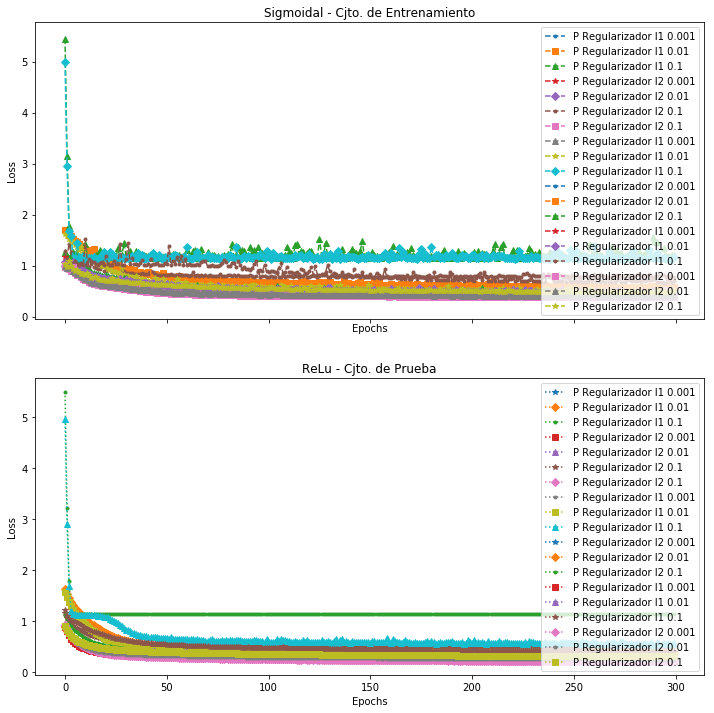

In [280]:
seed = 18
np.random.seed(seed)

plt.close('all')
f, axarr_train = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

plt.close('all')
f, axarr_test = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

#modelob 1 / FF 3 Capas I/H/O 200 neuronas en la oculta a/sigmoide
#sgd lr 0.01 epochs 300
#modeloc 2 / Igual al uno pero a/ReLu
history = []
activation = ['sigmoid','relu']

lines = ["-","--","-.",":"]
linecycler = cycle(lines)

m = ['+','.','o','*','p','s','x','D','h','^']
mcycler = cycle(m)

#regsL1 = [regularizers.l1(0.001), regularizers.l1(0.01),regularizers.l1(0.1)]
val_regs = [ ("l1 0.001", regularizers.l1(0.001)),
             ("l1 0.01" , regularizers.l1(0.01 )),
             ("l1 0.1"  , regularizers.l1(0.1  )),
             ("l2 0.001", regularizers.l2(0.001)),
             ("l2 0.01" , regularizers.l2(0.01 )),
             ("l2 0.1"  , regularizers.l2(0.1  )) ]

print('\n\n*******************************\n')
print('\n Regularizador a ambas capas\n')
for reg in val_regs:
    print("\n\nModelos con regularizador {0}\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'],
                                marker = next(mcycler),linestyle = next(linecycler), label = "E Regularizador "+str(reg[0]))
            axarr_test[0].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler) , label = "P Regularizador "+str(reg[0]))
        else:
            axarr_train[1].plot(hisx.history['loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "E Regularizador "+str(reg[0])) 
            axarr_test[1].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "P Regularizador "+str(reg[0])) 
            
print('\n\n*******************************\n')
print('\nSin Regularizador\n')
for a in activation:
    sgd = SGD(lr = 0.01)
    model = create_model(a,sgd)
    hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
    history.append(hisx)
    if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'],
                                marker = next(mcycler),linestyle = next(linecycler), label = "E Regularizador "+str(reg[0]))
            axarr_test[0].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler) , label = "P Regularizador "+str(reg[0]))
    else:
            axarr_train[1].plot(hisx.history['loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "E Regularizador "+str(reg[0])) 
            axarr_test[1].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "P Regularizador "+str(reg[0])) 

       
print('\n\n*******************************\n')       
for reg in val_regs:
    print("\nModelos con regularizador: {0} a primera Capa\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L1(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'],
                                marker = next(mcycler),linestyle = next(linecycler), label = "E Regularizador "+str(reg[0]))
            axarr_test[0].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler) , label = "P Regularizador "+str(reg[0]))
        else:
            axarr_train[1].plot(hisx.history['loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "E Regularizador "+str(reg[0])) 
            axarr_test[1].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "P Regularizador "+str(reg[0])) 


            
print('\n\n*******************************\n')             
for reg in val_regs:
    print("\nModelos con regularizador: {0} a segunda capa\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L2(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'],
                                marker = next(mcycler),linestyle = next(linecycler), label = "E Regularizador "+str(reg[0]))
            axarr_test[0].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler) , label = "P Regularizador "+str(reg[0]))
        else:
            axarr_train[1].plot(hisx.history['loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "E Regularizador "+str(reg[0])) 
            axarr_test[1].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "P Regularizador "+str(reg[0])) 

  
                 
axarr_train[0].set_xlabel('Epochs')
axarr_train[0].set_ylabel('Loss')
axarr_train[1].set_xlabel('Epochs')
axarr_train[1].set_ylabel('Loss')
axarr_train[0].set_title('Sigmoidal - Cjto. de Entrenamiento')
axarr_train[1].set_title('ReLu - Cjto. de Prueba')
axarr_train[0].set_ylim(0,2)
axarr_train[1].set_ylim(0,2)
axarr_train[0].legend(loc='upper right')
axarr_train[1].legend(loc='upper right')

axarr_test[0].set_xlabel('Epochs')
axarr_test[0].set_ylabel('Loss')
axarr_test[1].set_xlabel('Epochs')
axarr_test[1].set_ylabel('Loss')
axarr_test[0].set_title('Sigmoidal - Cjto. de Entrenamiento')
axarr_test[1].set_title('ReLu - Cjto. de Prueba')
#axarr_test[0].set_ylim(0,2)
#axarr_test[1].set_ylim(0,2)
axarr_test[0].legend(loc='upper right')
axarr_test[1].legend(loc='upper right')

plt.show()

**Comentarios**

**Experimentando con distintos valores del parámetro de regularización y evaluando el efecto de regularizar solo la primera capa vs la segunda*

Dada los complejo de determinar los resultados es que se acota los experimentos de acuerdo a los mejores resultados  obtenidos anteriormente.





*******************************


 Regularizador a ambas capas



Modelos con regularizador l2 0.001


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a90d0dd30>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9291add8>.




Modelos con regularizador l2 0.01


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a92b87278>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a99295470>.




Modelos con regularizador l2 0.1


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a994c46a0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a99572860>.




*******************************


Sin Regularizador


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a99c41d68>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a99cb71d0>.




*******************************


Modelos con regularizador: l2 0.001 a primera Capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a978fdd30>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9969b240>.



Modelos con regularizador: l2 0.01 a primera Capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a9a661390>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9a9bf908>.



Modelos con regularizador: l2 0.1 a primera Capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a9b8e7d30>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9be68e80>.




*******************************


Modelos con regularizador: l2 0.001 a segunda capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a9c0e46a0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9bc46be0>.



Modelos con regularizador: l2 0.01 a segunda capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a9c285160>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9c4db9b0>.



Modelos con regularizador: l2 0.1 a segunda capa


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a9cf3ca58>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9c5f9048>.




E: Conjunto de Entrenamiento, P: Conjunto de Prueba



Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal - Cjto. Entrenamiento')

Text(0.5,1,'ReLu - Cjto. Entrenamiento')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal - Cjto. Prueba')

Text(0.5,1,'ReLu - Cjto. Prueba')

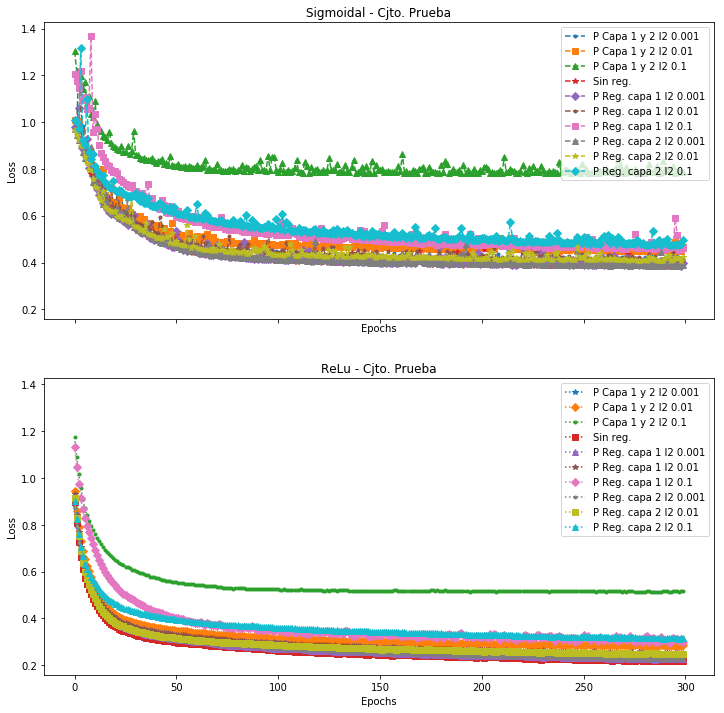

In [281]:
seed = 18
np.random.seed(seed)

plt.close('all')
f, axarr_train = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

plt.close('all')
f, axarr_test = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

#modelob 1 / FF 3 Capas I/H/O 200 neuronas en la oculta a/sigmoide
#sgd lr 0.01 epochs 300
#modeloc 2 / Igual al uno pero a/ReLu
history = []
activation = ['sigmoid','relu']

lines = ["-","--","-.",":"]
linecycler = cycle(lines)

m = ['+','.','o','*','p','s','x','D','h','^']
mcycler = cycle(m)

#regsL1 = [regularizers.l1(0.001), regularizers.l1(0.01),regularizers.l1(0.1)]
val_regs = [ ("l2 0.001", regularizers.l2(0.001)),
             ("l2 0.01" , regularizers.l2(0.01 )),
             ("l2 0.1"  , regularizers.l2(0.1  )) ]

print('\n\n*******************************\n')
print('\n Regularizador a ambas capas\n')
for reg in val_regs:
    print("\n\nModelos con regularizador {0}\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'],
                                marker = next(mcycler),linestyle = next(linecycler), label = "E Reg. Capa 1 y 2 "+str(reg[0]))
            axarr_test[0].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler) , label = "P Capa 1 y 2 "+str(reg[0]))
        else:
            axarr_train[1].plot(hisx.history['loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "E Capa 1 y 2 "+str(reg[0])) 
            axarr_test[1].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "P Capa 1 y 2 "+str(reg[0])) 
            
print('\n\n*******************************\n')
print('\nSin Regularizador\n')
for a in activation:
    sgd = SGD(lr = 0.01)
    model = create_model(a,sgd)
    hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
    history.append(hisx)
    if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'],
                                marker = next(mcycler),linestyle = next(linecycler), label = "Sin reg.")
            axarr_test[0].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler) , label = "Sin reg.")
    else:
            axarr_train[1].plot(hisx.history['loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "Sin reg.") 
            axarr_test[1].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "Sin reg.") 

       
print('\n\n*******************************\n')       
for reg in val_regs:
    print("\nModelos con regularizador: {0} a primera Capa\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L1(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'],
                                marker = next(mcycler),linestyle = next(linecycler), label = "E Reg. capa 1 "+str(reg[0]))
            axarr_test[0].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler) , label = "P Reg. capa 1 "+str(reg[0]))
        else:
            axarr_train[1].plot(hisx.history['loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "E Reg. capa 1 "+str(reg[0])) 
            axarr_test[1].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "P Reg. capa 1 "+str(reg[0])) 


            
print('\n\n*******************************\n')             
for reg in val_regs:
    print("\nModelos con regularizador: {0} a segunda capa\n".format(reg[0]))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_L2(a,optimizer=sgd, regularizer=reg[1])
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr_train[0].plot(hisx.history['loss'],
                                marker = next(mcycler),linestyle = next(linecycler), label = "E Reg. capa 2 "+str(reg[0]))
            axarr_test[0].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler) , label = "P Reg. capa 2 "+str(reg[0]))
        else:
            axarr_train[1].plot(hisx.history['loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "E Reg. capa 2 "+str(reg[0])) 
            axarr_test[1].plot(hisx.history['val_loss'], 
                               marker = next(mcycler),linestyle = next(linecycler), label = "P Reg. capa 2 "+str(reg[0])) 
            
print("\n\nE: Conjunto de Entrenamiento, P: Conjunto de Prueba\n")
axarr_train[0].set_xlabel('Epochs')
axarr_train[0].set_ylabel('Loss')
axarr_train[1].set_xlabel('Epochs')
axarr_train[1].set_ylabel('Loss')
axarr_train[0].set_title('Sigmoidal - Cjto. Entrenamiento')
axarr_train[1].set_title('ReLu - Cjto. Entrenamiento')
#axarr_train[0].set_ylim(0,2)
#axarr_train[1].set_ylim(0,2)
axarr_train[0].legend(loc='upper right')
axarr_train[1].legend(loc='upper right')

axarr_test[0].set_xlabel('Epochs')
axarr_test[0].set_ylabel('Loss')
axarr_test[1].set_xlabel('Epochs')
axarr_test[1].set_ylabel('Loss')
axarr_test[0].set_title('Sigmoidal - Cjto. Prueba')
axarr_test[1].set_title('ReLu - Cjto. Prueba')
#axarr_test[0].set_ylim(0,2)
#axarr_test[1].set_ylim(0,2)
axarr_test[0].legend(loc='upper right')
axarr_test[1].legend(loc='upper right')
plt.show()

**Comentarios**

**Experimentando con distintos valores del parámetro de regularización y evaluando el efecto de regularizar solo la primera capa vs la segunda*

Para el caso del conjunto de prueba y función sigmoid tiene mejores resutados cuando se utiliza el regularizador l2 en la segunda capa (mejores resultados con valores pequeños), y el peor resultado es cuando se colocar el regularizador en ambas capas.Estos resultados son semejantes a cuando no se utiliza regularizador.

Para el caso de la función relu, el mejor resultado es sin reguarizador, seguido se utilizarlo en la capa 2 con valor 0.001.

### i) Entrenando los modelos de b) y c) utilizando *Dropout*.

In [282]:
seed = 18
np.random.seed(seed)
from keras.layers import Dropout

def create_model_dropout(activation, optimizer = 'adam', f_loss = 'mean_squared_error', drop_o = 0.2):
    # create model
    print("\nModelo con params: {0}, {1}, {2}.".format(activation,f_loss,optimizer))
    model = Sequential()  
    model.add(Dense(200, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation=activation))
    model.add(Dropout(drop_o))
    # output layer
    model.add(Dense(1, kernel_initializer='uniform', activation = 'linear'))
    model.compile(optimizer = optimizer, loss = f_loss , metrics=['accuracy']) ## accuracy no debiese estar
    return model

**Con dropout = 0.02**


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a92974358>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a98972828>.



Sin Dropout


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a9ae2f198>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a98863470>.


Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal')

Text(0.5,1,'ReLu')

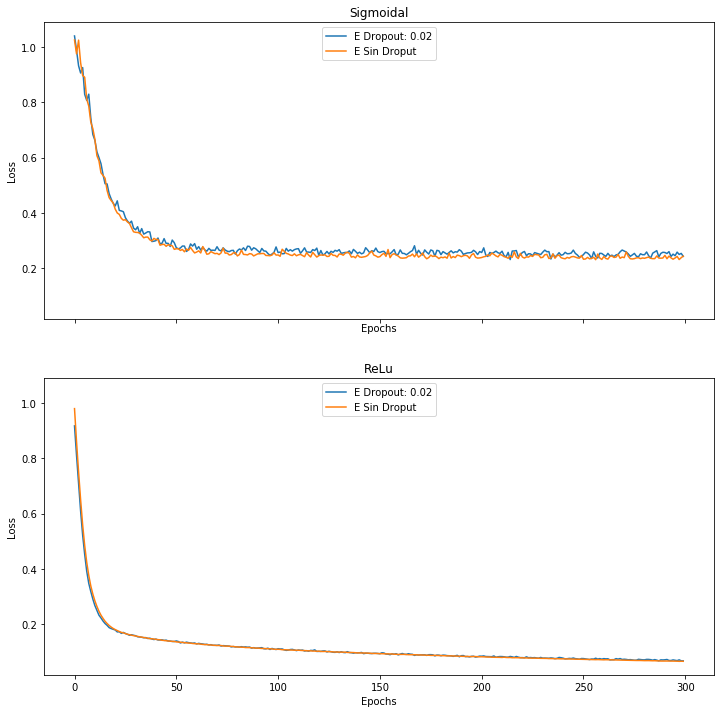

In [286]:
plt.close('all')
f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))
d = 0.02
for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_dropout(a,optimizer=sgd,drop_o=d)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], label = "E Dropout: "+str(d))
        else:
            axarr[1].plot(hisx.history['loss'], label = "E Dropout: "+str(d))
            
print('\nSin Dropout\n')
for a in activation:
    sgd = SGD(lr = 0.01)
    model = create_model(a,sgd)
    hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
    history.append(hisx)
    if (a == 'sigmoid'):
        axarr[0].plot(hisx.history['loss'], label = "E Sin Droput")
    else:
        axarr[1].plot(hisx.history['loss'], label = "E Sin Droput")  
                     
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal')
axarr[1].set_title('ReLu')
#axarr[0].set_ylim(0,2)
#axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper center')
axarr[1].legend(loc='upper center')
plt.show()

**ACAComentarios de desempeño antes y después de regularizar con dropout = 0.02**

Con dropout = 0.2, tanto para la función Relu como Sigmoid se obsevan comportamientos muy similares. Para el caso de relu tiene a cero mucho más rapido que sigmoid. En el caso de sigmoid a los 300 epochs llega a valor de mse 0.2, a diferencia de relu que su valor es muy cercano a 0 en los 300 epochs.


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1aa0901f60>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1aa0cdaef0>.



Sin Dropout


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1aa09d3ba8>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1aa0a521d0>.


Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal')

Text(0.5,1,'ReLu')

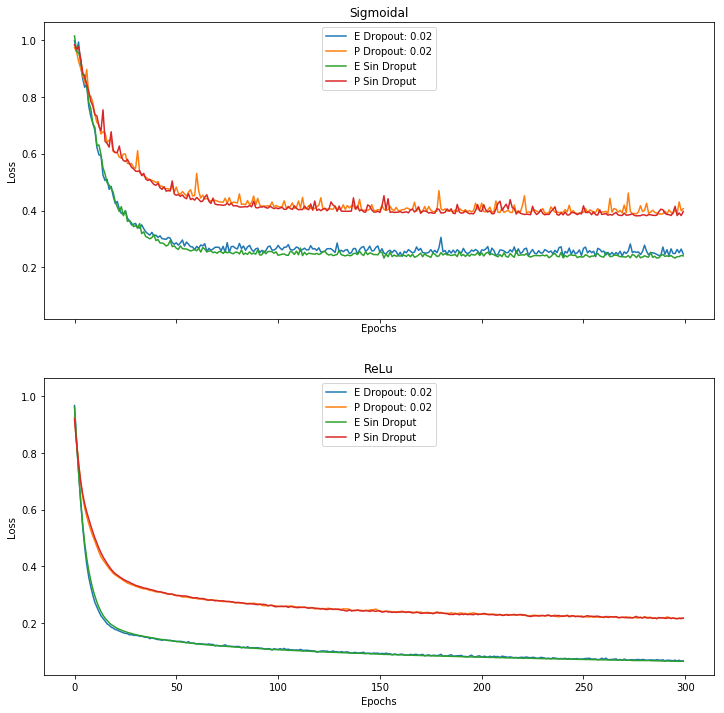

In [283]:
plt.close('all')
f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))
d = 0.02
for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_dropout(a,optimizer=sgd,drop_o=d)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], label = "E Dropout: "+str(d))
            axarr[0].plot(hisx.history['val_loss'], label = "P Dropout: "+str(d))
        else:
            axarr[1].plot(hisx.history['loss'], label = "E Dropout: "+str(d))
            axarr[1].plot(hisx.history['val_loss'], label = "P Dropout: "+str(d))
print('\nSin Dropout\n')
for a in activation:
    sgd = SGD(lr = 0.01)
    model = create_model(a,sgd)
    hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
    history.append(hisx)
    if (a == 'sigmoid'):
        axarr[0].plot(hisx.history['loss'], label = "E Sin Droput")
        axarr[0].plot(hisx.history['val_loss'], label = "P Sin Droput")
    else:
        axarr[1].plot(hisx.history['loss'], label = "E Sin Droput")  
        axarr[1].plot(hisx.history['val_loss'], label = "P Sin Droput")
                     
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal')
axarr[1].set_title('ReLu')
#axarr[0].set_ylim(0,2)
#axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper center')
axarr[1].legend(loc='upper center')
plt.show()


** Comentarios de desempeño antes y después de regularizar con dropout = 0.02, para conjunto de entrenamiento y prueba **

Los valores obtenidos para el conjunto de entrenamiento estan por debajo de los resultados obtenidos en el conjunto de prueba.  Se observa que con y sin dropout los valores son muy similares en mabas funciones. Para el caso de sigmoid se presentan oscilaciones.

Para el casa de sigmoid, los valores sin dropout estan levemente por debajo los valores al utilizar dropout. En el caso de relu no se observan diferencias, el comportamiento es muy similar con y sin dropout. 

Se hace incapié a que estos resultados están considerando el conjunto de entrenamiento, por lo que se tiene una visión general de comportamiento con y sin dropout.

**Experimentando con distintos valores del parámetro de regularización**


Modelos con Dropout 0.01


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a93d70f28>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9abd1a90>.



Modelos con Dropout 0.15


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a9cea2780>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9d639390>.



Modelos con Dropout 0.2


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a9e50af98>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9e10ab38>.



Modelos con Dropout 0.25


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a9e6076d8>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9ec912b0>.



Modelos con Dropout 0.3


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a9e1bc0f0>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1aa0453da0>.



Sin Dropout


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a9ee46550>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9fcd3d68>.


Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal')

Text(0.5,1,'ReLu')

/anaconda3/envs/redes-neuronales/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "upper right ". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


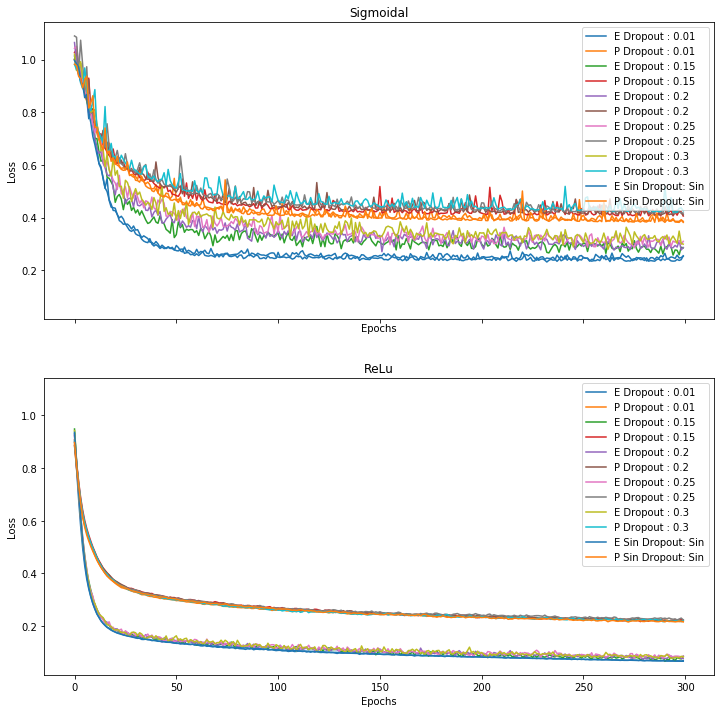

In [287]:
plt.close('all')
f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))


reg_dropout = [0.01,0.15,0.2,0.25,0.3]

for d in reg_dropout:
    print("\nModelos con Dropout {0}\n".format(d))
    for a in activation:
        sgd = SGD(lr = 0.01)
        model = create_model_dropout(a,optimizer=sgd,drop_o=d)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], label = "E Dropout : "+str(d))
            axarr[0].plot(hisx.history['val_loss'], label = "P Dropout : "+str(d))
        else:
            axarr[1].plot(hisx.history['loss'], label = "E Dropout : "+str(d))
            axarr[1].plot(hisx.history['val_loss'], label = "P Dropout : "+str(d))

print('\nSin Dropout\n')
for a in activation:
    sgd = SGD(lr = 0.01)
    model = create_model(a,sgd)
    hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
    history.append(hisx)
    if (a == 'sigmoid'):
        axarr[0].plot(hisx.history['loss'], label = "E Sin Dropout: "+str('Sin'))
        axarr[0].plot(hisx.history['val_loss'], label = "P Sin Dropout: "+str('Sin'))
    else:
        axarr[1].plot(hisx.history['loss'], label = "E Sin Dropout: "+str('Sin')) 
        axarr[1].plot(hisx.history['val_loss'], label = "P Sin Dropout: "+str('Sin')) 
                     
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal')
axarr[1].set_title('ReLu')
#axarr[0].set_ylim(0,2)
#axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper right')
axarr[1].legend(loc='upper right ')
plt.show()


**Comentarios**
- Se experimento con valores para dropout de 0.01, 0.15, 0.2, 0.25, 0.3.
- Para el caso de la función sigmoidal, los mejores resultados se obtienen sin dropout, seguido de valor de dropout 0.01. A medida que aumentan los valores de droput, se van obteniendo peores resultados, tanto para el conjunto de prueba como de entrenamiento.
- Para el caso de la función relu, se forman dos conjunto que convergen de forma distinta, los valores están asociados al conjunto de prueba y de entrenamiento, siendo mejores los del conjunto de entrenamiento.

####  j) Fijando todos los demás hiper-parámetros del modelo definido en b) y en c)
- utilice validación cruzada con un número de folds igual a K = 5 y K=10 para determinar el mejor valor correspondiente a un parámetro que usted elija (tasa de aprendizaje, número de neuronas, parámetro de regularización, etc). 

In [289]:
##Hiperparámetros
#LR
#decay
#SGD
#minibatch 50
#dropout 0.01
#regularizdores L2 0.02 en primera capa

def create_model_final(activation, optimizer = 'adam', f_loss = 'mean_squared_error', drop_o=0.01, 
                 regularizer = regularizers.l2(0.01)):
    # create model
    print("\nModelo con params: {0}, {1}, {2}.".format(activation,f_loss,optimizer))
    model = Sequential()  
    model.add(Dense(200, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', 
                     activation=activation, kernel_regularizer = regularizer))
    model.add(Dropout(drop_o))
    # output layer
    model.add(Dense(1, kernel_initializer='uniform', activation = 'linear'))
    model.compile(optimizer = optimizer, loss = f_loss , metrics=['accuracy']) ## accuracy no debiese estar
    return model

** Sin validación cruzada y con todos los hiperparámetros **

Antes de utilizar validación cruzada, se evalúa el resultado de aplicar distintos hiperparámetros.


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1a9efd0e10>.



Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1aa04a0d68>.


Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

Text(0.5,1,'Sigmoidal')

Text(0.5,1,'ReLu')

/anaconda3/envs/redes-neuronales/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "upper center ". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


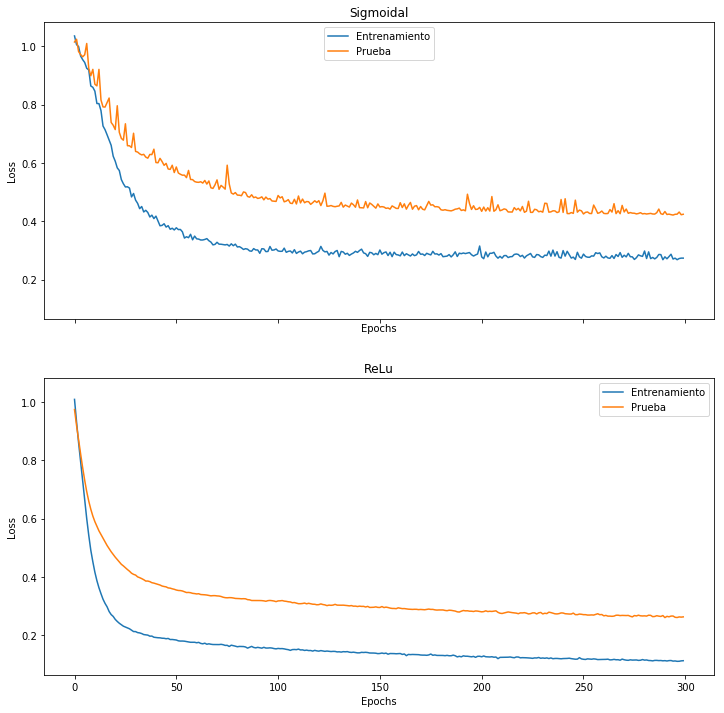

In [290]:
import matplotlib.pyplot as plt
plt.close('all')
f, axarr = plt.subplots(2, sharex=True,sharey =True,figsize=(12,12))

for a in activation:
        sgd1 = SGD(lr = 0.01, decay=1e-6)
        model = create_model_final(a,optimizer=sgd1)
        hisx = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(),batch_size=50, epochs = 300,
                verbose=0, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
        history.append(hisx)
        if (a == 'sigmoid'):
            axarr[0].plot(hisx.history['loss'], label = "Entrenamiento")
            axarr[0].plot(hisx.history['val_loss'], label = "Prueba")
        else:
            axarr[1].plot(hisx.history['loss'], label = "Entrenamiento")
            axarr[1].plot(hisx.history['val_loss'], label = "Prueba")
            
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
axarr[0].set_title('Sigmoidal')
axarr[1].set_title('ReLu')
#axarr[0].set_ylim(0,2)
#axarr[1].set_ylim(0,2)
axarr[0].legend(loc='upper center')
axarr[1].legend(loc='upper center ')
plt.show()            

** Comentarios **
Se observan mejores resultados para el caso de relu, tanto para el conjutno de entrenamiento, tanto en los valores obtenidos como en la convergencia.

In [293]:
activation = ['sigmoid','relu']
## k = 5 y K = 10
K_C_Val = [5,10]
from sklearn import cross_validation
Xm = pd.DataFrame(X_train_scaled).as_matrix()
Ym = pd.DataFrame(y_train_scaled).as_matrix()

for k in K_C_Val:    
    kfold = cross_validation.KFold(len(Xm), k)
    kfold
    cvscores = []
    cvscores1 = []
    print("----- k = %s ------" %k )
    for i, (train, val) in enumerate(kfold):
        # create model
        # Compile model
        # Fit the model
        sgd1 = SGD(lr = 0.01, decay=1e-6)
        model = create_model_final('sigmoid',optimizer=sgd1)
        hisx = model.fit(Xm[train], Ym[train],batch_size=50, epochs = 300,verbose=0)        
            # evaluate the model
        scores = model.evaluate(Xm[val], Ym[val], verbose=1)
        #print("%s: %.2f%%\n" % (model.metrics_names[1], scores[1]*100))
        print("%s: %.2f%%\n" % (model.metrics_names[0], scores[0]*100))
        #print("%s: %.2f%%\n " % (model.metrics_names[0], scores[0])*100)
        #cvscores.append(scores[1]*100)
        cvscores1.append(scores[0]*100)
        
    mse_cv = np.mean(cvscores)
   #print("Acc %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    print("Loss %.2f%% (+/- %.2f%%)" % (np.mean(cvscores1), np.std(cvscores1)))

sklearn.cross_validation.KFold(n=379, n_folds=5, shuffle=False, random_state=None)

----- k = 5 ------

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1aa1b0ac18>.
76/76 [==============================] - 16s 212ms/step
loss: 42.69%


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1aa1d42f98>.
76/76 [==============================] - 17s 221ms/step
loss: 34.41%


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1aa2675a20>.
76/76 [==============================] - 15s 197ms/step
loss: 40.12%


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1aa0d39f28>.
76/76 [==============================] - 17s 226ms/step
loss: 47.45%


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1aa0fc6fd0>.
75/75 [==============================] - 19s 250ms/step
loss: 23.63%

Loss 37.66% (+/- 8.18%)


/anaconda3/envs/redes-neuronales/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/redes-neuronales/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


sklearn.cross_validation.KFold(n=379, n_folds=10, shuffle=False, random_state=None)

----- k = 10 ------

Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1aa3434b70>.
38/38 [==============================] - 15s 390ms/step
loss: 22.77%


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1aa31bef98>.
38/38 [==============================] - 19s 511ms/step
loss: 25.31%


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1aa301ba58>.
38/38 [==============================] - 17s 453ms/step
loss: 21.11%


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1aa2d17f60>.
38/38 [==============================] - 18s 469ms/step
loss: 32.53%


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1aa3a37e80>.
38/38 [==============================] - 16s 419ms/step
loss: 38.71%


Modelo con params: sigmoid, mean_squared_error, <keras.optimizers.SGD object at 0x1aa32079b0>.
38/38 [==============================] - 51s 1s/step
l

In [294]:
activation = ['sigmoid','relu']
## k = 5 y K = 10
K_C_Val = [5,10]
from sklearn import cross_validation
Xm = pd.DataFrame(X_train_scaled).as_matrix()
Ym = pd.DataFrame(y_train_scaled).as_matrix()

for k in K_C_Val:    
    kfold = cross_validation.KFold(len(Xm), k)
    kfold
    cvscores = []
    cvscores1 = []
    print("----- k = %s ------" %k )
    for i, (train, val) in enumerate(kfold):
        # create model
        # Compile model
        # Fit the model
        sgd1 = SGD(lr = 0.01, decay=1e-6)
        model = create_model_final('relu',optimizer=sgd1)
        hisx = model.fit(Xm[train], Ym[train],batch_size=200, epochs = 300,verbose=0)        
            # evaluate the model
        scores = model.evaluate(Xm[val], Ym[val], verbose=1)
        #print("%s: %.2f%%\n" % (model.metrics_names[1], scores[1]*100))
        print("%s: %.2f%%\n" % (model.metrics_names[0], scores[0]*100))
        #print("%s: %.2f%%\n " % (model.metrics_names[0], scores[0])*100)
        #cvscores.append(scores[1]*100)
        cvscores1.append(scores[0]*100)
        
    mse_cv = np.mean(cvscores)
    #print("Acc %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    print("Loss %.2f%% (+/- %.2f%%)" % (np.mean(cvscores1), np.std(cvscores1)))

sklearn.cross_validation.KFold(n=379, n_folds=5, shuffle=False, random_state=None)

----- k = 5 ------

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1aa48832e8>.
76/76 [==============================] - 21s 278ms/step
loss: 13.88%


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1aa4961940>.
76/76 [==============================] - 20s 263ms/step
loss: 27.02%


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9c713da0>.
76/76 [==============================] - 17s 227ms/step
loss: 14.52%


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9f5a3dd8>.
76/76 [==============================] - 29s 376ms/step
loss: 32.02%


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9f2f9fd0>.
75/75 [==============================] - 22s 288ms/step
loss: 16.84%

Loss 20.86% (+/- 7.32%)


/anaconda3/envs/redes-neuronales/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/redes-neuronales/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


sklearn.cross_validation.KFold(n=379, n_folds=10, shuffle=False, random_state=None)

----- k = 10 ------

Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1a9fe31080>.
38/38 [==============================] - 21s 550ms/step
loss: 12.99%


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1aa4a03d30>.
38/38 [==============================] - 21s 557ms/step
loss: 14.35%


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1aa4f649e8>.
38/38 [==============================] - 40s 1s/step
loss: 29.94%


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1aa5193550>.
38/38 [==============================] - 18s 468ms/step
loss: 17.61%


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1aa5488c88>.
38/38 [==============================] - 26s 685ms/step
loss: 21.86%


Modelo con params: relu, mean_squared_error, <keras.optimizers.SGD object at 0x1aa5624940>.
38/38 [==============================] - 23s 617ms/step
loss: 10.56%


Mode

** ¿El mejor parámetro para la red con sigmoidal es distinto que para ReLU? ¿Porqué sucede? **

No. en ambos casos se obtiene con k=10. Esto es se asocia a como va calculando el error y el tamaño de cada muestra.

** Además mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.**

Error:

- Sigmoid k:5 (37,66%), k:10 (30.79%)

- Relu         K:5 (20.86%), k:10 (20.39%)

